In [2]:
import os
os.system("""source ../../../scripts/bashrc""")

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12}) 
from matplotlib import rcParams
import dataAgglomeration as da
import numpy as np
from numpy import linalg
import math
from matplotlib.ticker import ScalarFormatter

In [127]:
plt.rcParams["axes.formatter.useoffset"] = False  # Disable offset (e.g., +1e6) if not needed
plt.rcParams["axes.formatter.use_mathtext"] = True  # Enable scientific notation with 10^n format

# Optional: Customize the power limits for scientific notation (adjust as needed)
plt.rcParams["axes.formatter.limits"] = (-2, 2)  # Show 10^n notation outside this range

# Time step size

In [90]:
### Results from interFlow
agglomerator = da.data_agglomerator("deltaTtest.parameter","bubblepproc.dat", 
                                     "isoAdv-deltaTtest_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoAdv-deltaTtest.csv")
dframe_deltaTtest = agglomerator.study_dataframe()
dframe_deltaTtest = dframe_deltaTtest.sort_index()

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[[0.00242859], [0], [0], [0], [0], [4], [15], [1e-07], [1e-12], [10], [10], [10], [10], [10], [10], [0], [1e-06], ['no'], [0.5], [1e-09, 1e-08, 1e-07, 1e-06], [5e-06], [1], [3], [200], [800], [-9.80665], [0.0], [3.009e-05], [997], [1.5111e-05], [1.225], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['radius', 'z_centre', 'y_centre', 'x_centre', 'n_non_orth_correctors', 'n_correctors', 'n_outer_correctors', 'u_tol', 'p_tol', 'negzWIDTH', 'poszWIDTH', 'negyWIDTH', 'posyWIDTH', 'negxWIDTH', 'posxWIDTH', 'purge_write', 'write_interval', 'ad

In [91]:
def plot_deltaTtest(dframe, fig_name):
    """Plots mesh convergence test."""
    rcParams["figure.dpi"] = 400
    g = 9.80665
    rhol= 997
    rhog = 1.225

    acc = 2*g*(rhol - rhog)/(rhol+2*rhog)
    
    Ts = dframe.index.get_level_values("delta_t").unique()
    markers=['d','o','^','*','p','P']
    
    
    for i, T in enumerate(Ts[::-1]):                
        df_subset = dframe.loc[T]
        timeStep = list(range(len(df_subset)))
        plt.scatter(timeStep, df_subset["z-Velocity"].diff()/(df_subset["time"].diff()*g), marker=markers[i], 
             label=r"$\Delta t = 10^{%s}s$" % ((int(np.log10(T)))))
    plt.axhline(y=acc/g, linestyle='--', color='blue', label=r"$2\frac{\rho^l-\rho^g}{\rho^l+2\rho^g}$")
    plt.xlim(left=0, right=25)
    plt.ylabel(r"Normalized acceleration")#"$L_{\infty}(\|\mathbf{v}_c^e - \mathbf{v}_c^n\|)$")
    plt.xlabel("Time step")
    plt.grid()
    plt.legend()
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)
    plt.savefig(fig_name, facecolor='w', dpi=400,bbox_inches='tight')

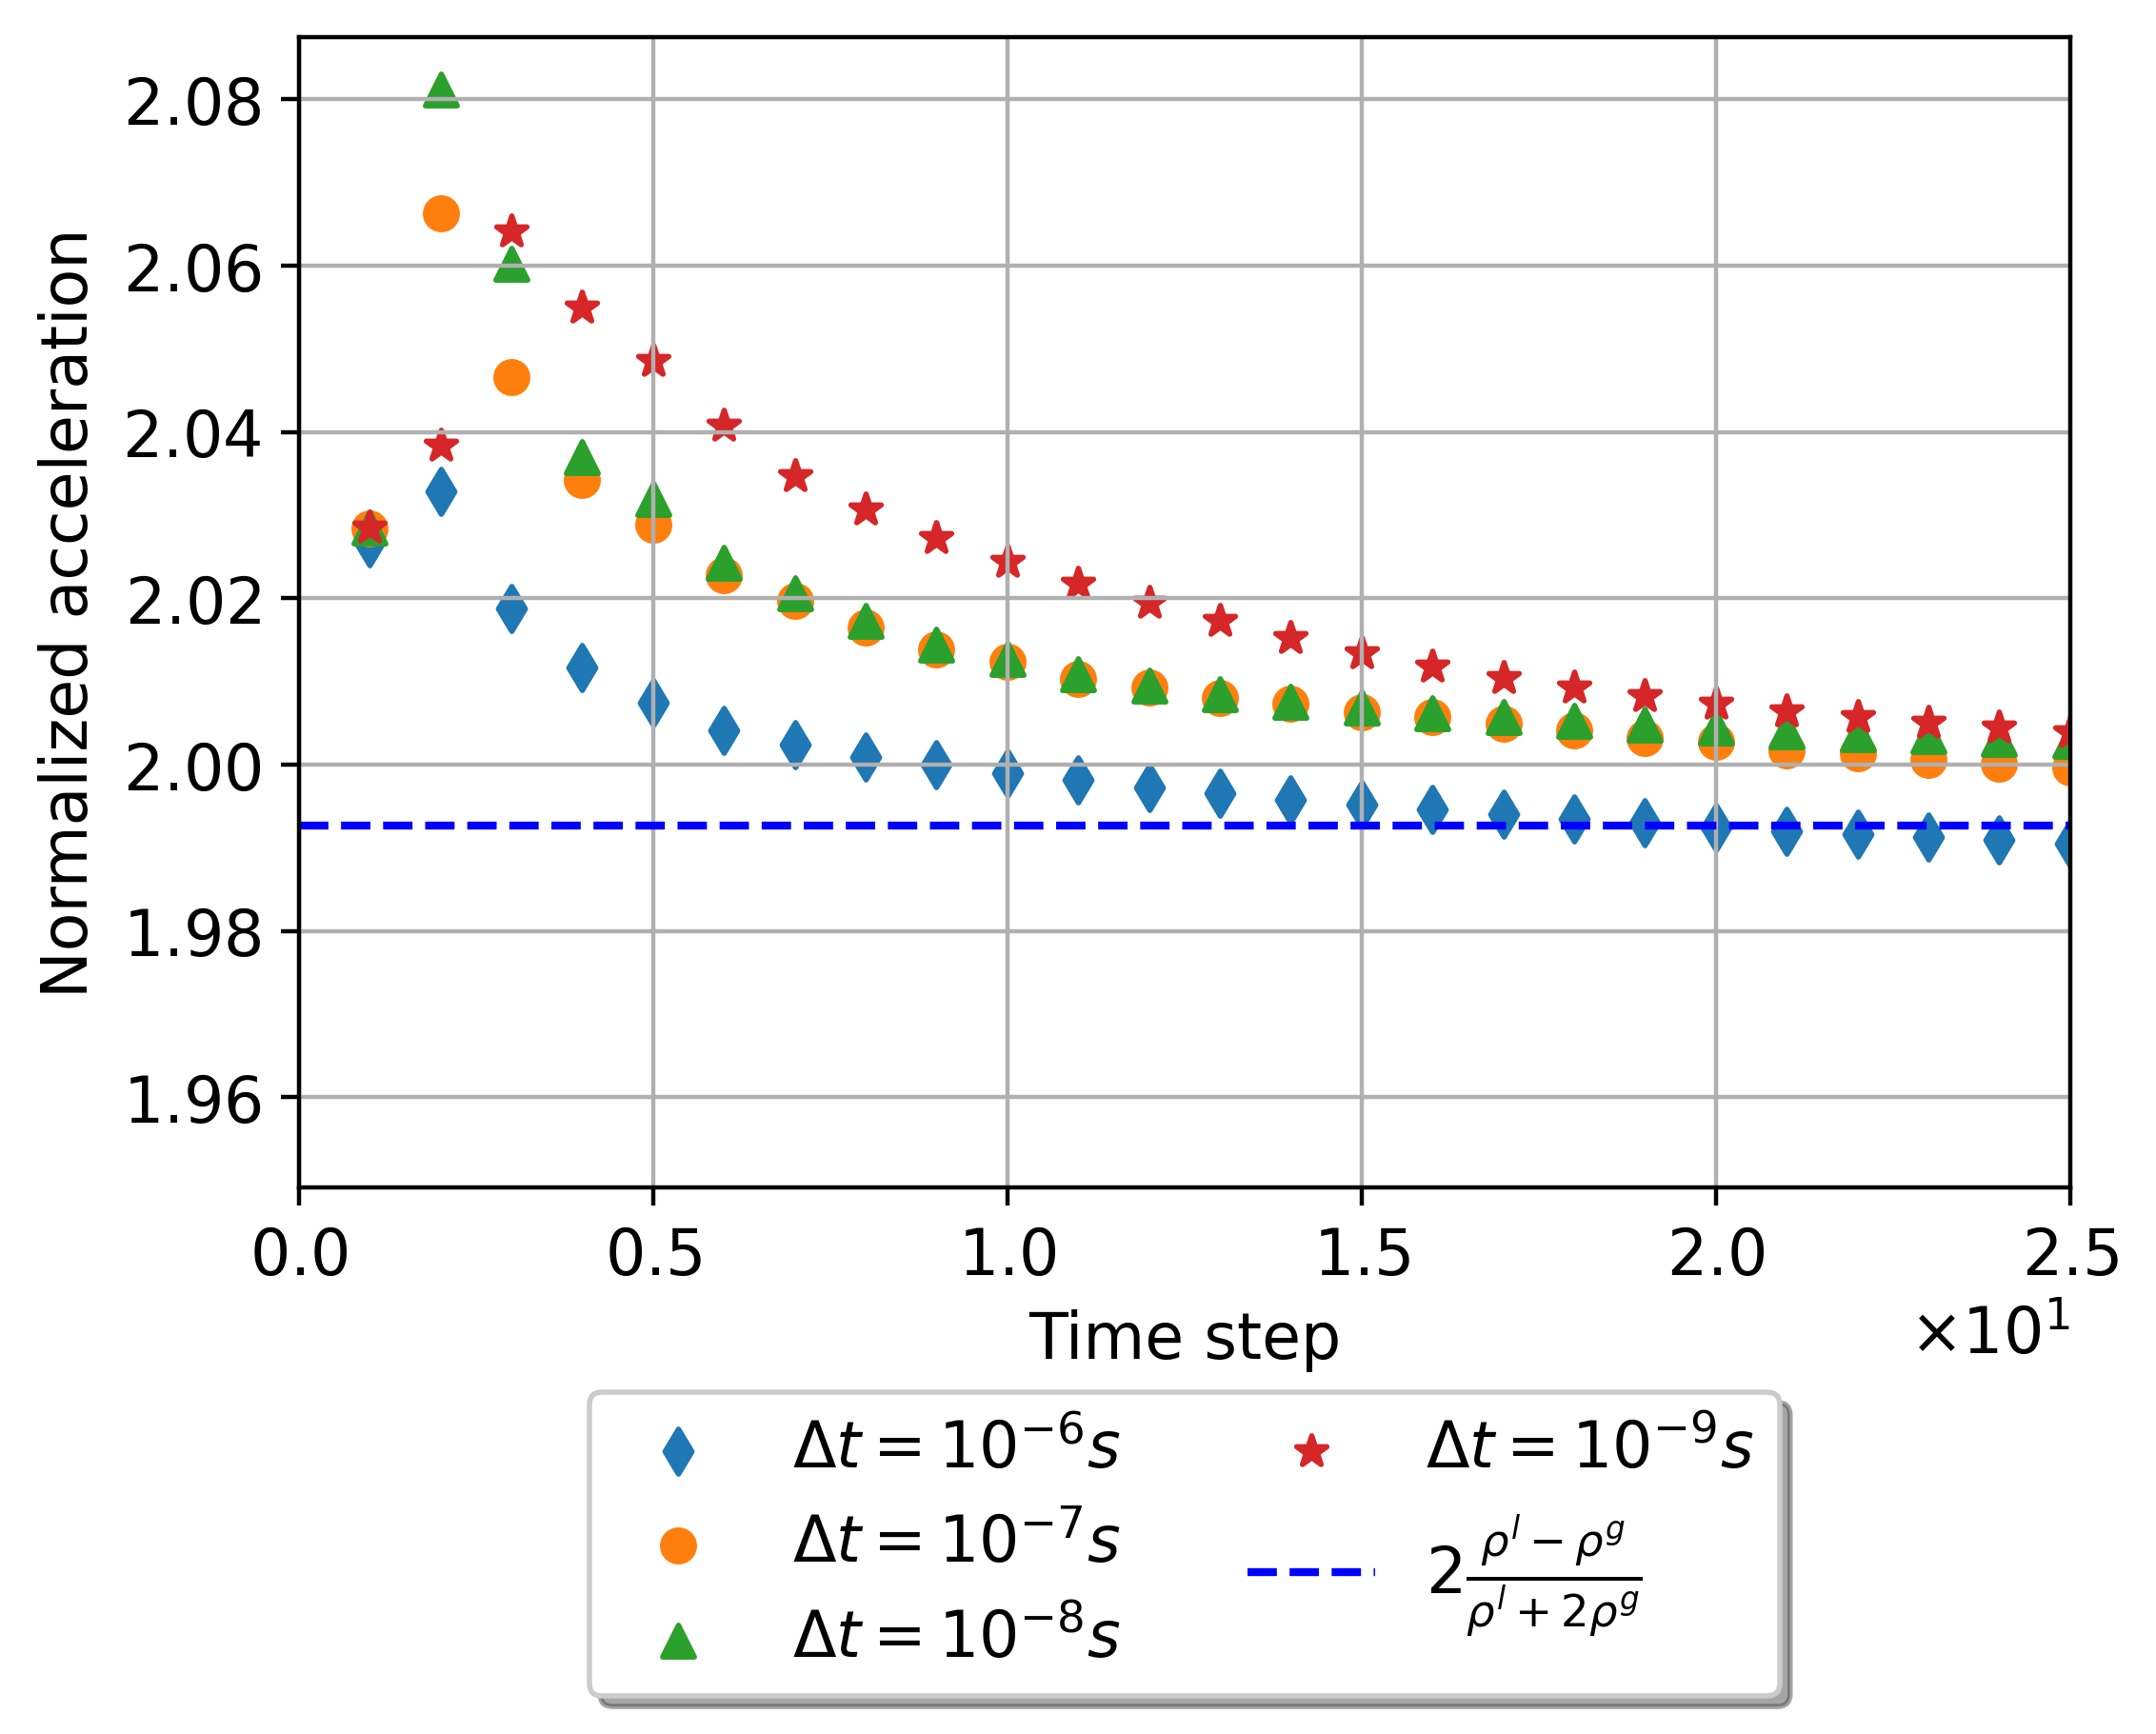

In [92]:
#plot_deltaTtest(dframe_deltaTtest, 'deltaTEffects.png')
plot_deltaTtest(dframe_deltaTtest, '')

# Mesh convergence

## Initial acceleration

In [79]:
### Results from interFlow
agglomerator = da.data_agglomerator("MeshConvergenceTest.parameter","bubblepproc.dat", 
                                     "isoAdv-MeshConvergenceTest_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoAdv-MeshConvergenceTest.csv")
dframe_MeshConvergenceTest = agglomerator.study_dataframe()
dframe_MeshConvergenceTest = dframe_MeshConvergenceTest.sort_index()

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
3 	 No data file
[[0.00242859], [0], [0], [0], [0], [4], [15], [1e-07], [1e-12], [10], [10], [10], [10], [10], [10], [0], [1e-06], ['no'], [0.5], [1e-08], [5e-06], [1], [3], [200], [200, 400, 800], [-9.80665], [0.0], [3.009e-05], [997], [1.5111e-05], [1.225], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['radius', 'z_centre', 'y_centre', 'x_centre', 'n_non_orth_correctors', 'n_correctors', 'n_outer_correctors', 'u_tol', 'p_tol', 'negzWIDTH', 'poszWIDTH', 'negyWIDTH', 'posyWIDTH', 'negxWIDTH', 'posxWIDTH', 'purge_write', 'write_interval

In [94]:
def plot_MeshConvergenceTest(dframe, fig_name):
    """Plots mesh convergence test."""
    rcParams["figure.dpi"] = 400
    g = 9.80665
    rhol= 997
    rhog = 1.225

    acc = 2*g*(rhol - rhog)/(rhol+2*rhog)
    
    resolutions = dframe.index.get_level_values("resolution").unique()
    markers=['d','o','^','*','p','P']
    
    
    for i, resolution in enumerate(resolutions):                
        df_subset = dframe.loc[resolution]
        plt.plot(df_subset["time"], df_subset["z-Velocity"].diff()/(df_subset["time"].diff()*g),#, marker=markers[i], 
             label=r"$\frac{D}{%s}$" % (int(resolution/10)))
    plt.axhline(y=acc/g, linestyle='--', color='blue', label=r"$2\frac{\rho^l-\rho^g}{\rho^l+2\rho^g}$")
    #plt.xlim(left=0, right=0.25e-6)
    plt.ylabel(r"Normalized acceleration")#"$L_{\infty}(\|\mathbf{v}_c^e - \mathbf{v}_c^n\|)$")
    plt.xlabel("Time (s)")
    plt.grid()
    plt.legend()
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)
    plt.savefig(fig_name, facecolor='w', dpi=400,bbox_inches='tight')

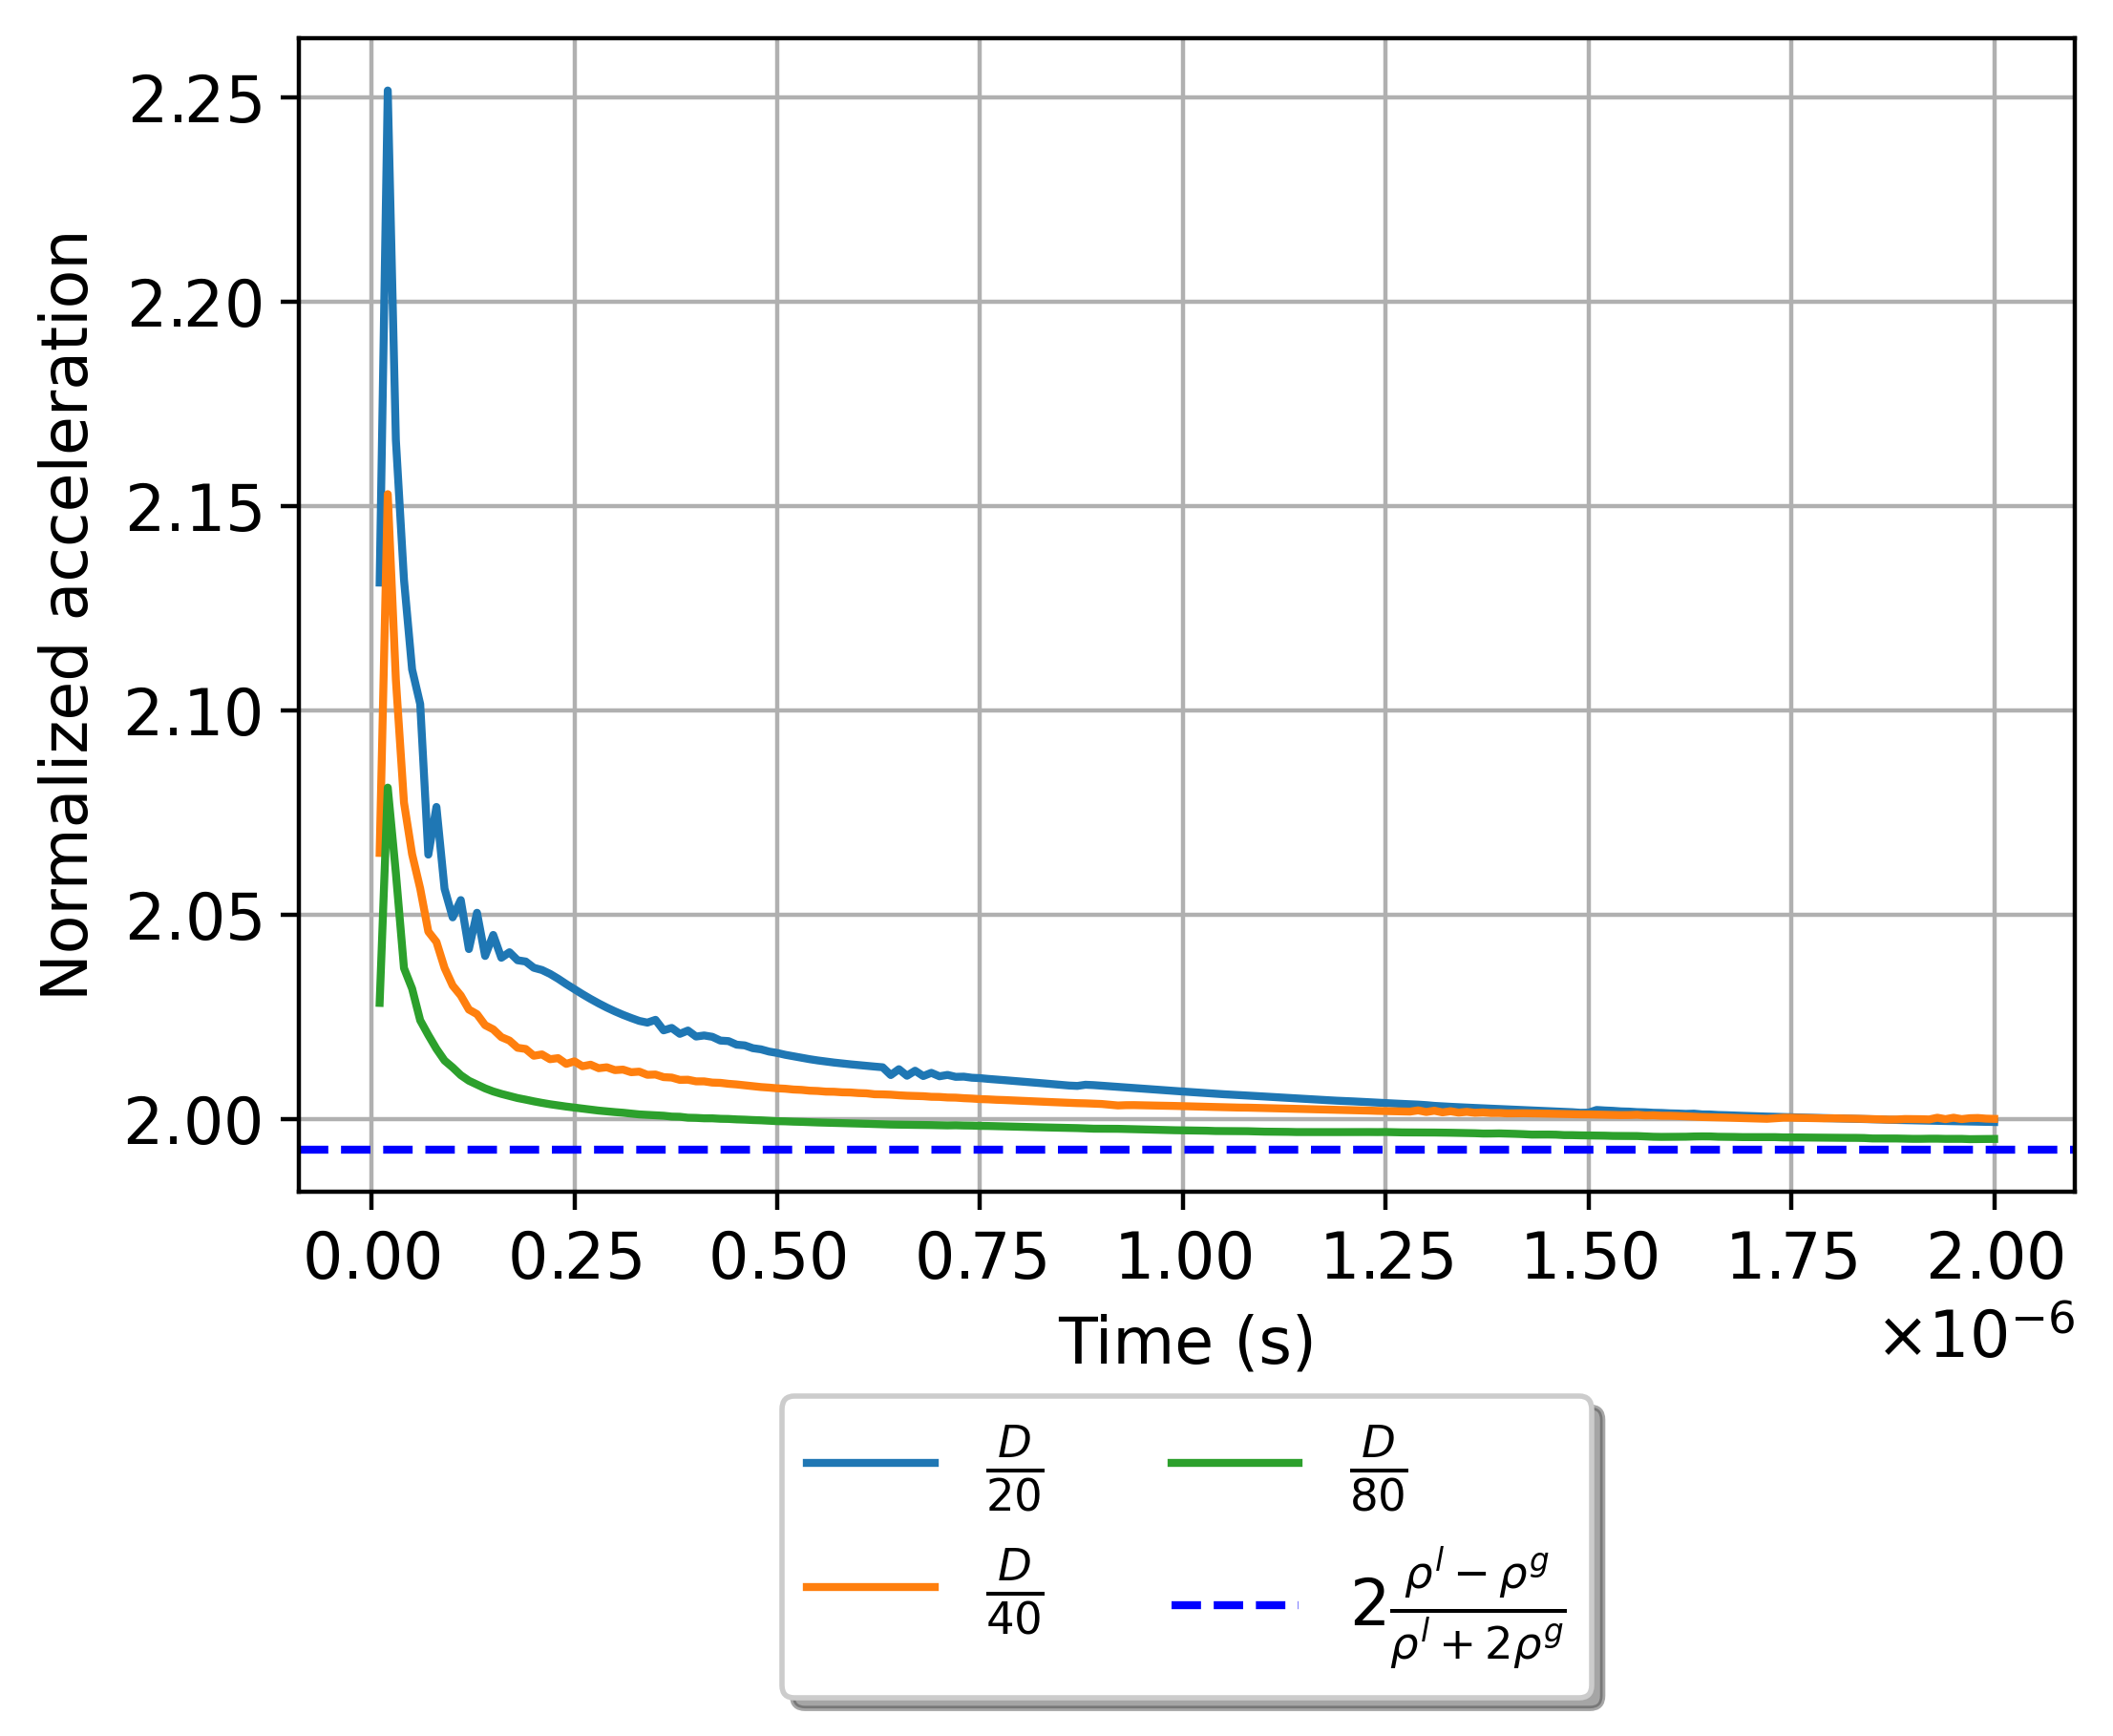

In [95]:
plot_MeshConvergenceTest(dframe_MeshConvergenceTest,'MeshConvergence_acc.png')

In [ ]:
MeshConvergence_acc.png fist25Scattered.png

In [24]:
def plot_DCComp_Vel(dframe, fig_name):
    """Plots mesh convergence test."""
    rcParams["figure.dpi"] = 400
    g = 9.80665
    rhol= 997
    rhog = 1.225

    acc = 2*g*(rhol - rhog)/(rhol+2*rhog)
    
    resolutions = dframe.index.get_level_values("resolution").unique()
    colors=["black","red","blue",""]
    
    
    for i, resolution in enumerate(resolutions):                
        df_subset = dframe.loc[resolution]
        plt.scatter(df_subset["time"], df_subset["z-Velocity"], s=2, color = colors[i]
             label=r"$\frac{D}{%s}$" % (int(resolution/10)))
    #plt.axhline(y=acc/g, linestyle='--', color='blue', label=r"$2$g$\frac{\rho_l-\rho_g}{\rho_l+2\rho_g}$")
    axes = plt.gca()
    xVal= np.linspace(0, 0.021, num=1000)
    yVal1= acc*xVal
    yVal2= 3.3*g*xVal

    plt.plot(xVal, yVal1,color='g', label=r"$2$g$\frac{\rho^l-\rho^g}{\rho^l+2\rho^g}$", linewidth=1)
    plt.plot(xVal, yVal2, color='m', label="3.3g", linewidth=1)
    plt.xlim(right=2e-6)
    plt.ylabel(r"Normalized acceleration")#"$L_{\infty}(\|\mathbf{v}_c^e - \mathbf{v}_c^n\|)$")
    plt.xlabel("Time in s")
    plt.grid()
    plt.legend()
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)
    plt.savefig(fig_name, facecolor='w', dpi=400,bbox_inches='tight')
    
def plot_DCComp_Acc(dframe, fig_name):
    """Plots mesh convergence test."""
    rcParams["figure.dpi"] = 400
    g = 9.80665
    rhol= 997
    rhog = 1.225

    acc = 2*g*(rhol - rhog)/(rhol+2*rhog)
    
    resolutions = dframe.index.get_level_values("resolution").unique()
    
    
    for resolution in resolutions:                
        df_subset = dframe.loc[resolution]
        plt.plot(df_subset["time"], df_subset["z-Velocity"].diff()/(df_subset["time"].diff()*g), 
             label=r"$\frac{D}{%s}$" % (int(resolution/10)))
    plt.axhline(y=acc/g, linestyle='--', color='blue', label=r"$2$g$\frac{\rho^l-\rho^g}{\rho^l+2\rho^g}$")
    plt.xlim(right=2e-6)
    plt.ylabel(r"Normalized acceleration")#"$L_{\infty}(\|\mathbf{v}_c^e - \mathbf{v}_c^n\|)$")
    plt.xlabel("Time in s")
    plt.grid()
    plt.legend()
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)
    plt.savefig(fig_name, facecolor='w', dpi=400,bbox_inches='tight')

SyntaxError: invalid syntax (<ipython-input-24-1daa08e62fe0>, line 17)

## Pressure distribution

In [129]:
### Results from interFlow
agglomerator = da.data_agglomerator("MeshConvergenceTest.parameter","Pressure_zAxis.csv", 
                                     "isoAdv-MeshConvergenceTest_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoAdv-PressureZAxis.csv")
dframe_PressureZAxis = agglomerator.study_dataframe()
dframe_PressureZAxis = dframe_PressureZAxis.sort_index()

agglomerator = da.data_agglomerator("MeshConvergenceTest.parameter","Pressure_halfR.csv", 
                                     "isoAdv-MeshConvergenceTest_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoAdv-halfR.csv")
dframe_halfR = agglomerator.study_dataframe()
dframe_halfR = dframe_halfR.sort_index()

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
3 	 No data file
[[0.00242859], [0], [0], [0], [0], [4], [15], [1e-07], [1e-12], [10], [10], [10], [10], [10], [10], [0], [1e-06], ['no'], [0.5], [1e-08], [5e-06], [1], [3], [200], [200, 400, 800], [-9.80665], [0.0], [3.009e-05], [997], [1.5111e-05], [1.225], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['radius', 'z_centre', 'y_centre', 'x_centre', 'n_non_orth_correctors', 'n_correctors', 'n_outer_correctors', 'u_tol', 'p_tol', 'negzWIDTH', 'poszWIDTH', 'negyWIDTH', 'posyWIDTH', 'negxWIDTH', 'posxWIDTH', 'purge_write', 'write_interval

In [140]:
def piecewise_function(xVal,yVal,z):
    """
    Define a piecewise function:
    
    f(x) = {
      x^2       if x < 0
      x + 2     if 0 <= x <= 2
      sqrt(x)   if x > 2
    }
    
    Parameters:
    x (array-like): Input array of x values.
    
    Returns:
    np.ndarray: Array of function values corresponding to input x values.
    """
    g = 9.80665
    rhol= 997
    rhog = 1.225
    r= 2.42859e-03
    h=((2.42859e-03)**2 - (xVal)**2 - (yVal)**2)**0.5 
    x=xVal
    y=yVal
    # Define the conditions
    conditions = [
        (z < -h),
        (z >= -h) & (z <= h),
        (z > h)
    ]
    
    # Define the corresponding functions or values for each condition
    functions = [
        lambda  z: -(rhog-rhol)*rhol/(2*rhog+rhol)*g*z*(r**3)/(x**2+y**2 +z**2)**(3/2) - rhol*g*z,
        lambda  z: -3*rhog*rhol/(2*rhog + rhol)*g*z,
        lambda  z: -(rhog-rhol)*rhol/(2*rhog+rhol)*g*z*(r**3)/(x**2+y**2 +z**2)**(3/2) - rhol*g*z
    ]
    
    # Use np.piecewise to apply the conditions and functions
    return np.piecewise(z, conditions, functions)

def PressureZAxisPlots(dframe, xPos, yPos, fig_name):
    rcParams["figure.dpi"] = 400
    r=2.42859e-03
    # Example usage
    z_values = np.linspace(-2*r,2*r,1000) #pressureNum["Points:2"].values
    #y_values = piecewise_function(0.0001215, 0.0001215, z_values)
    y_values = piecewise_function(xPos, yPos, z_values)
    fig, ax = plt.subplots()
    
    resolutions = dframe.index.get_level_values("resolution").unique()
    markers=['*','v','.','']
    colors=['blue','orange','black','']
    sizes=[15,15,5,0]
    orders=[4,3,6,0]
    
    
    for i, resolution in enumerate(resolutions):                
        df_subset = dframe.loc[resolution]
        ax.scatter(df_subset['CellCenters:2'], df_subset['p']+0.3775845,marker=markers[i], s=sizes[i], label=r"$\frac{D}{%s}$" % (int(resolution/10)), color=colors[i], zorder=orders[i])
    # ax.scatter(pSampN80['CellCenters:2'], pSampN80['p'], s=1, label="Numerical results (N80)", color='blue', zorder=3)
    ax.plot(z_values, y_values,color='r', label="Analytical results", zorder=5)

    ax.set_ylabel("Pressure (Pa)")
    ax.set_xlabel(r"$x_3$-position (m)")
    #plt.xscale("log")
    #plt.yscale("log")
    # plt.xlim(-0.0025, 0.0025)
    # plt.yscale('symlog')
    ax.grid()
    ax.set_axisbelow(True)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)

    plt.savefig(fig_name, facecolor='w', dpi=400,bbox_inches='tight')
    #plt.show()

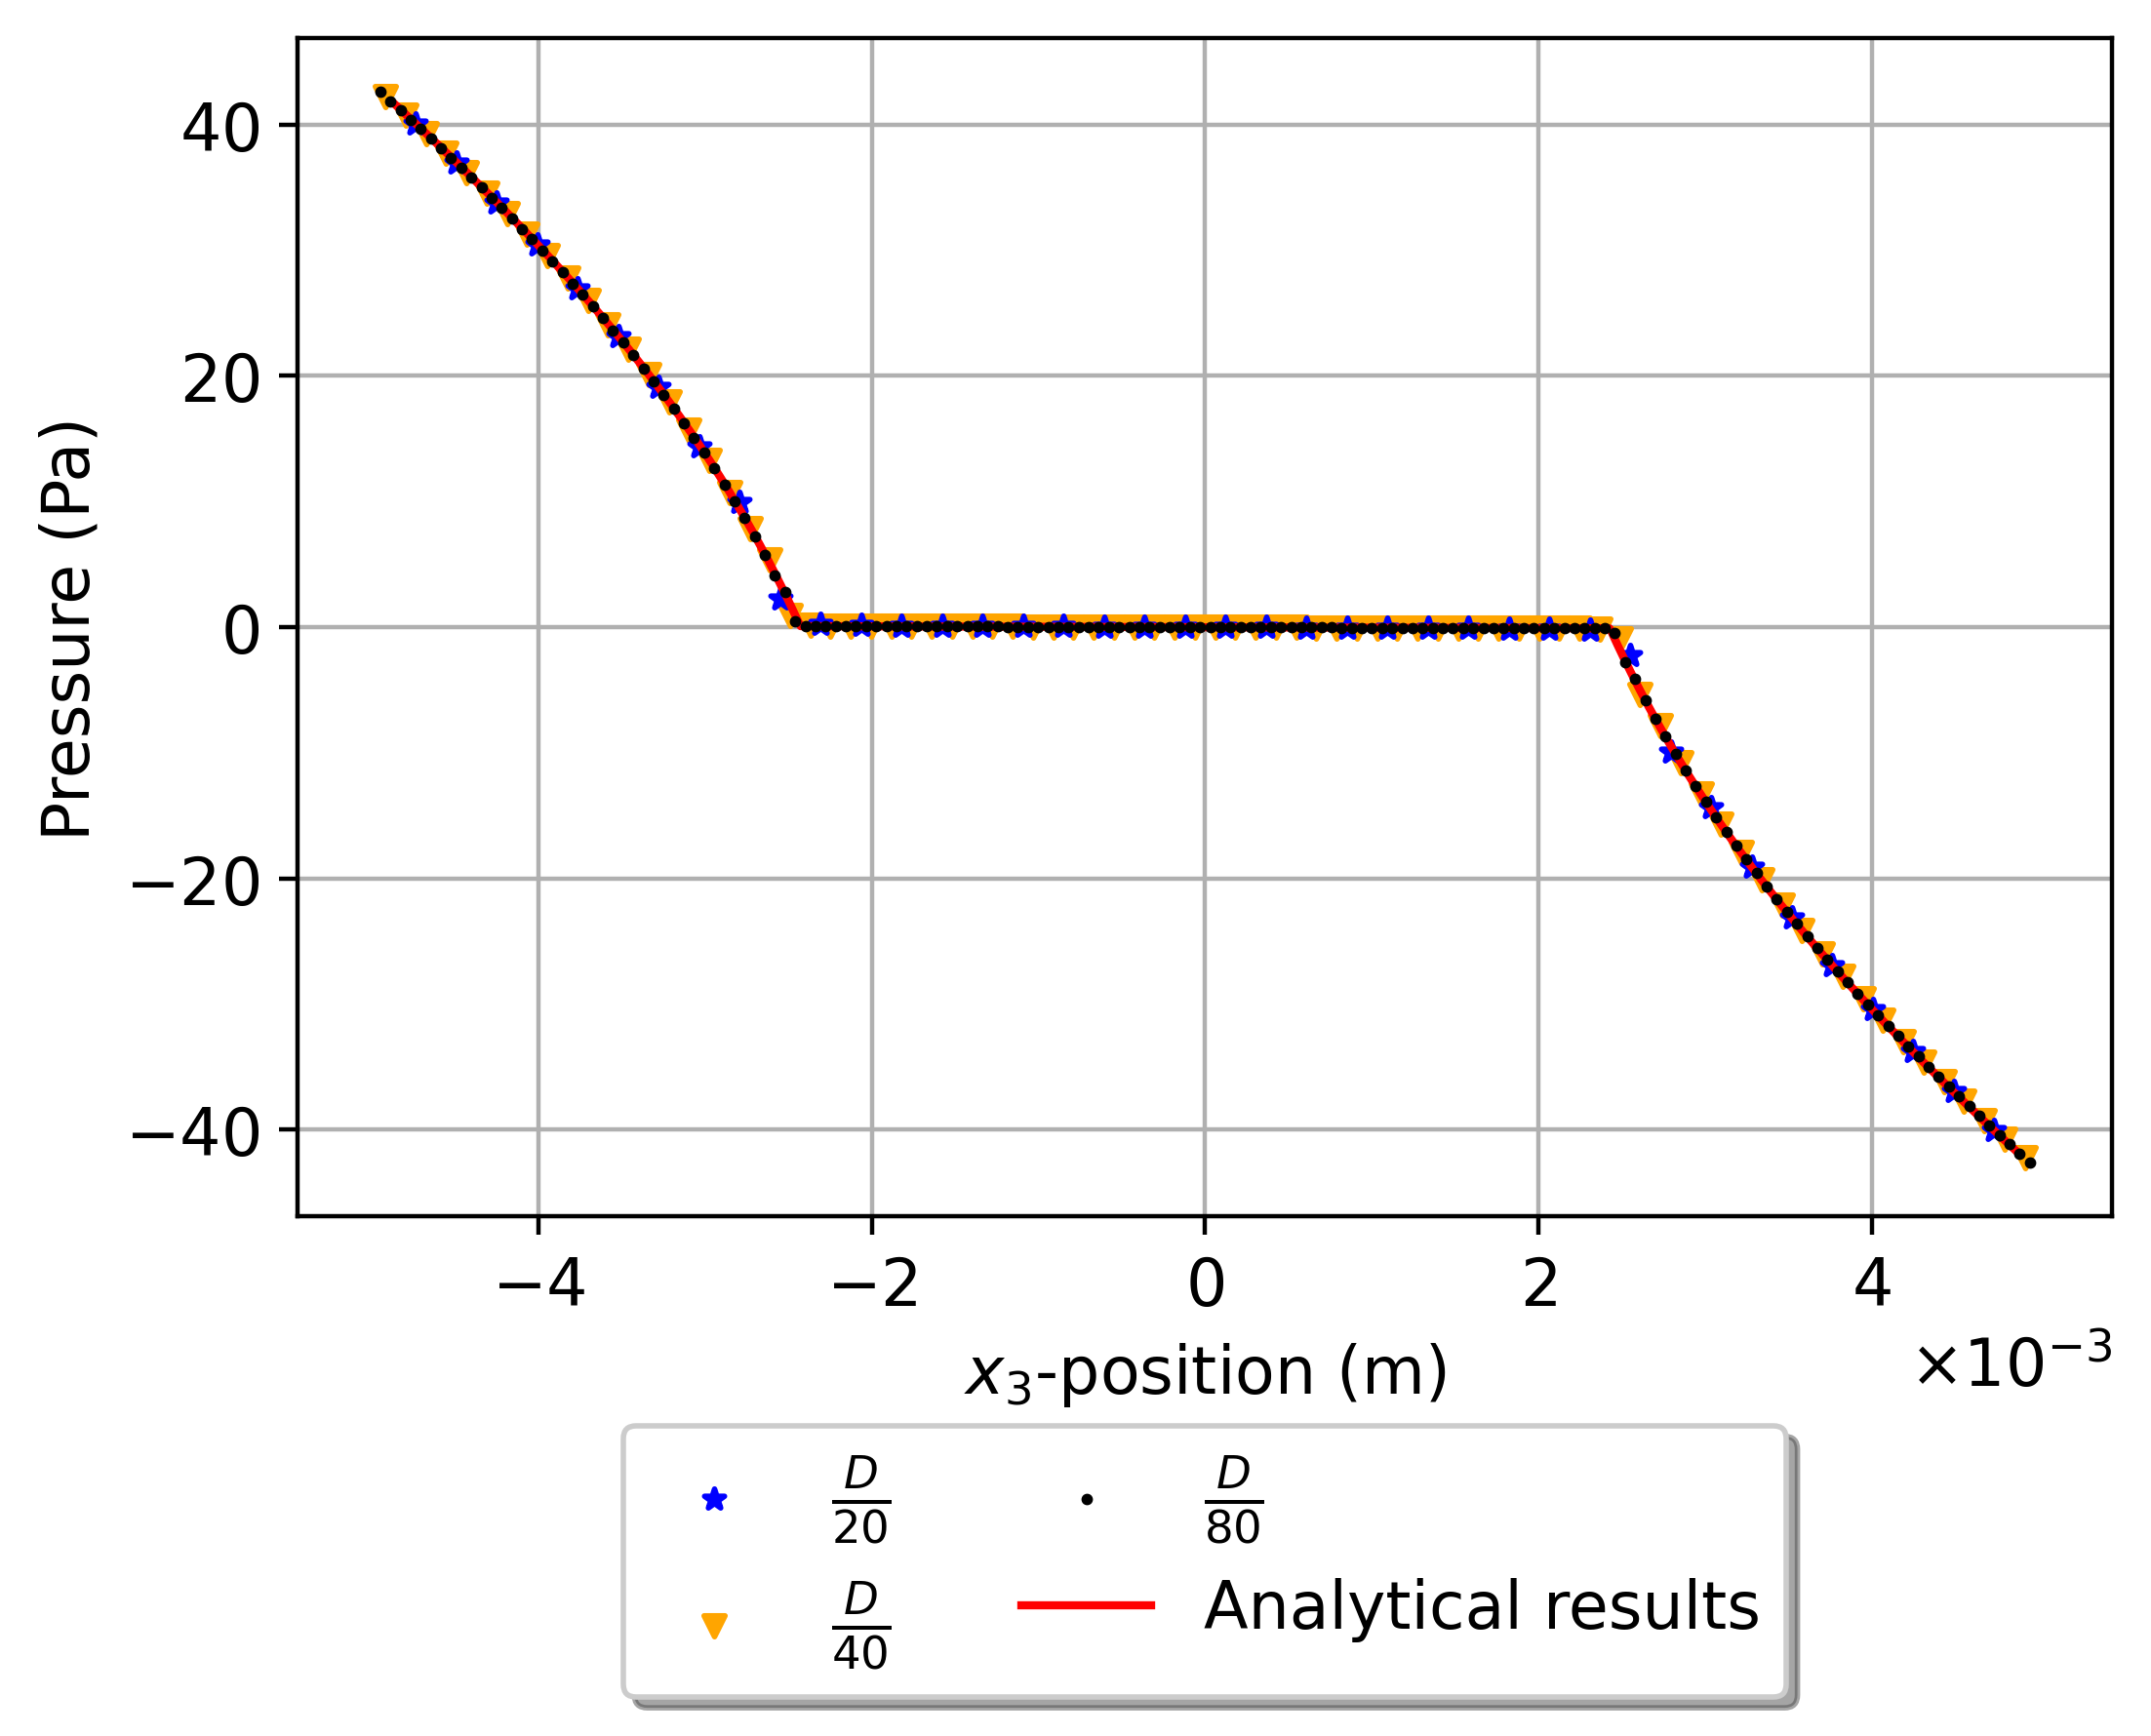

In [141]:
PressureZAxisPlots(dframe_PressureZAxis, 0.0,0.0, 'MeshConvergence_pressure_zAxis.png')

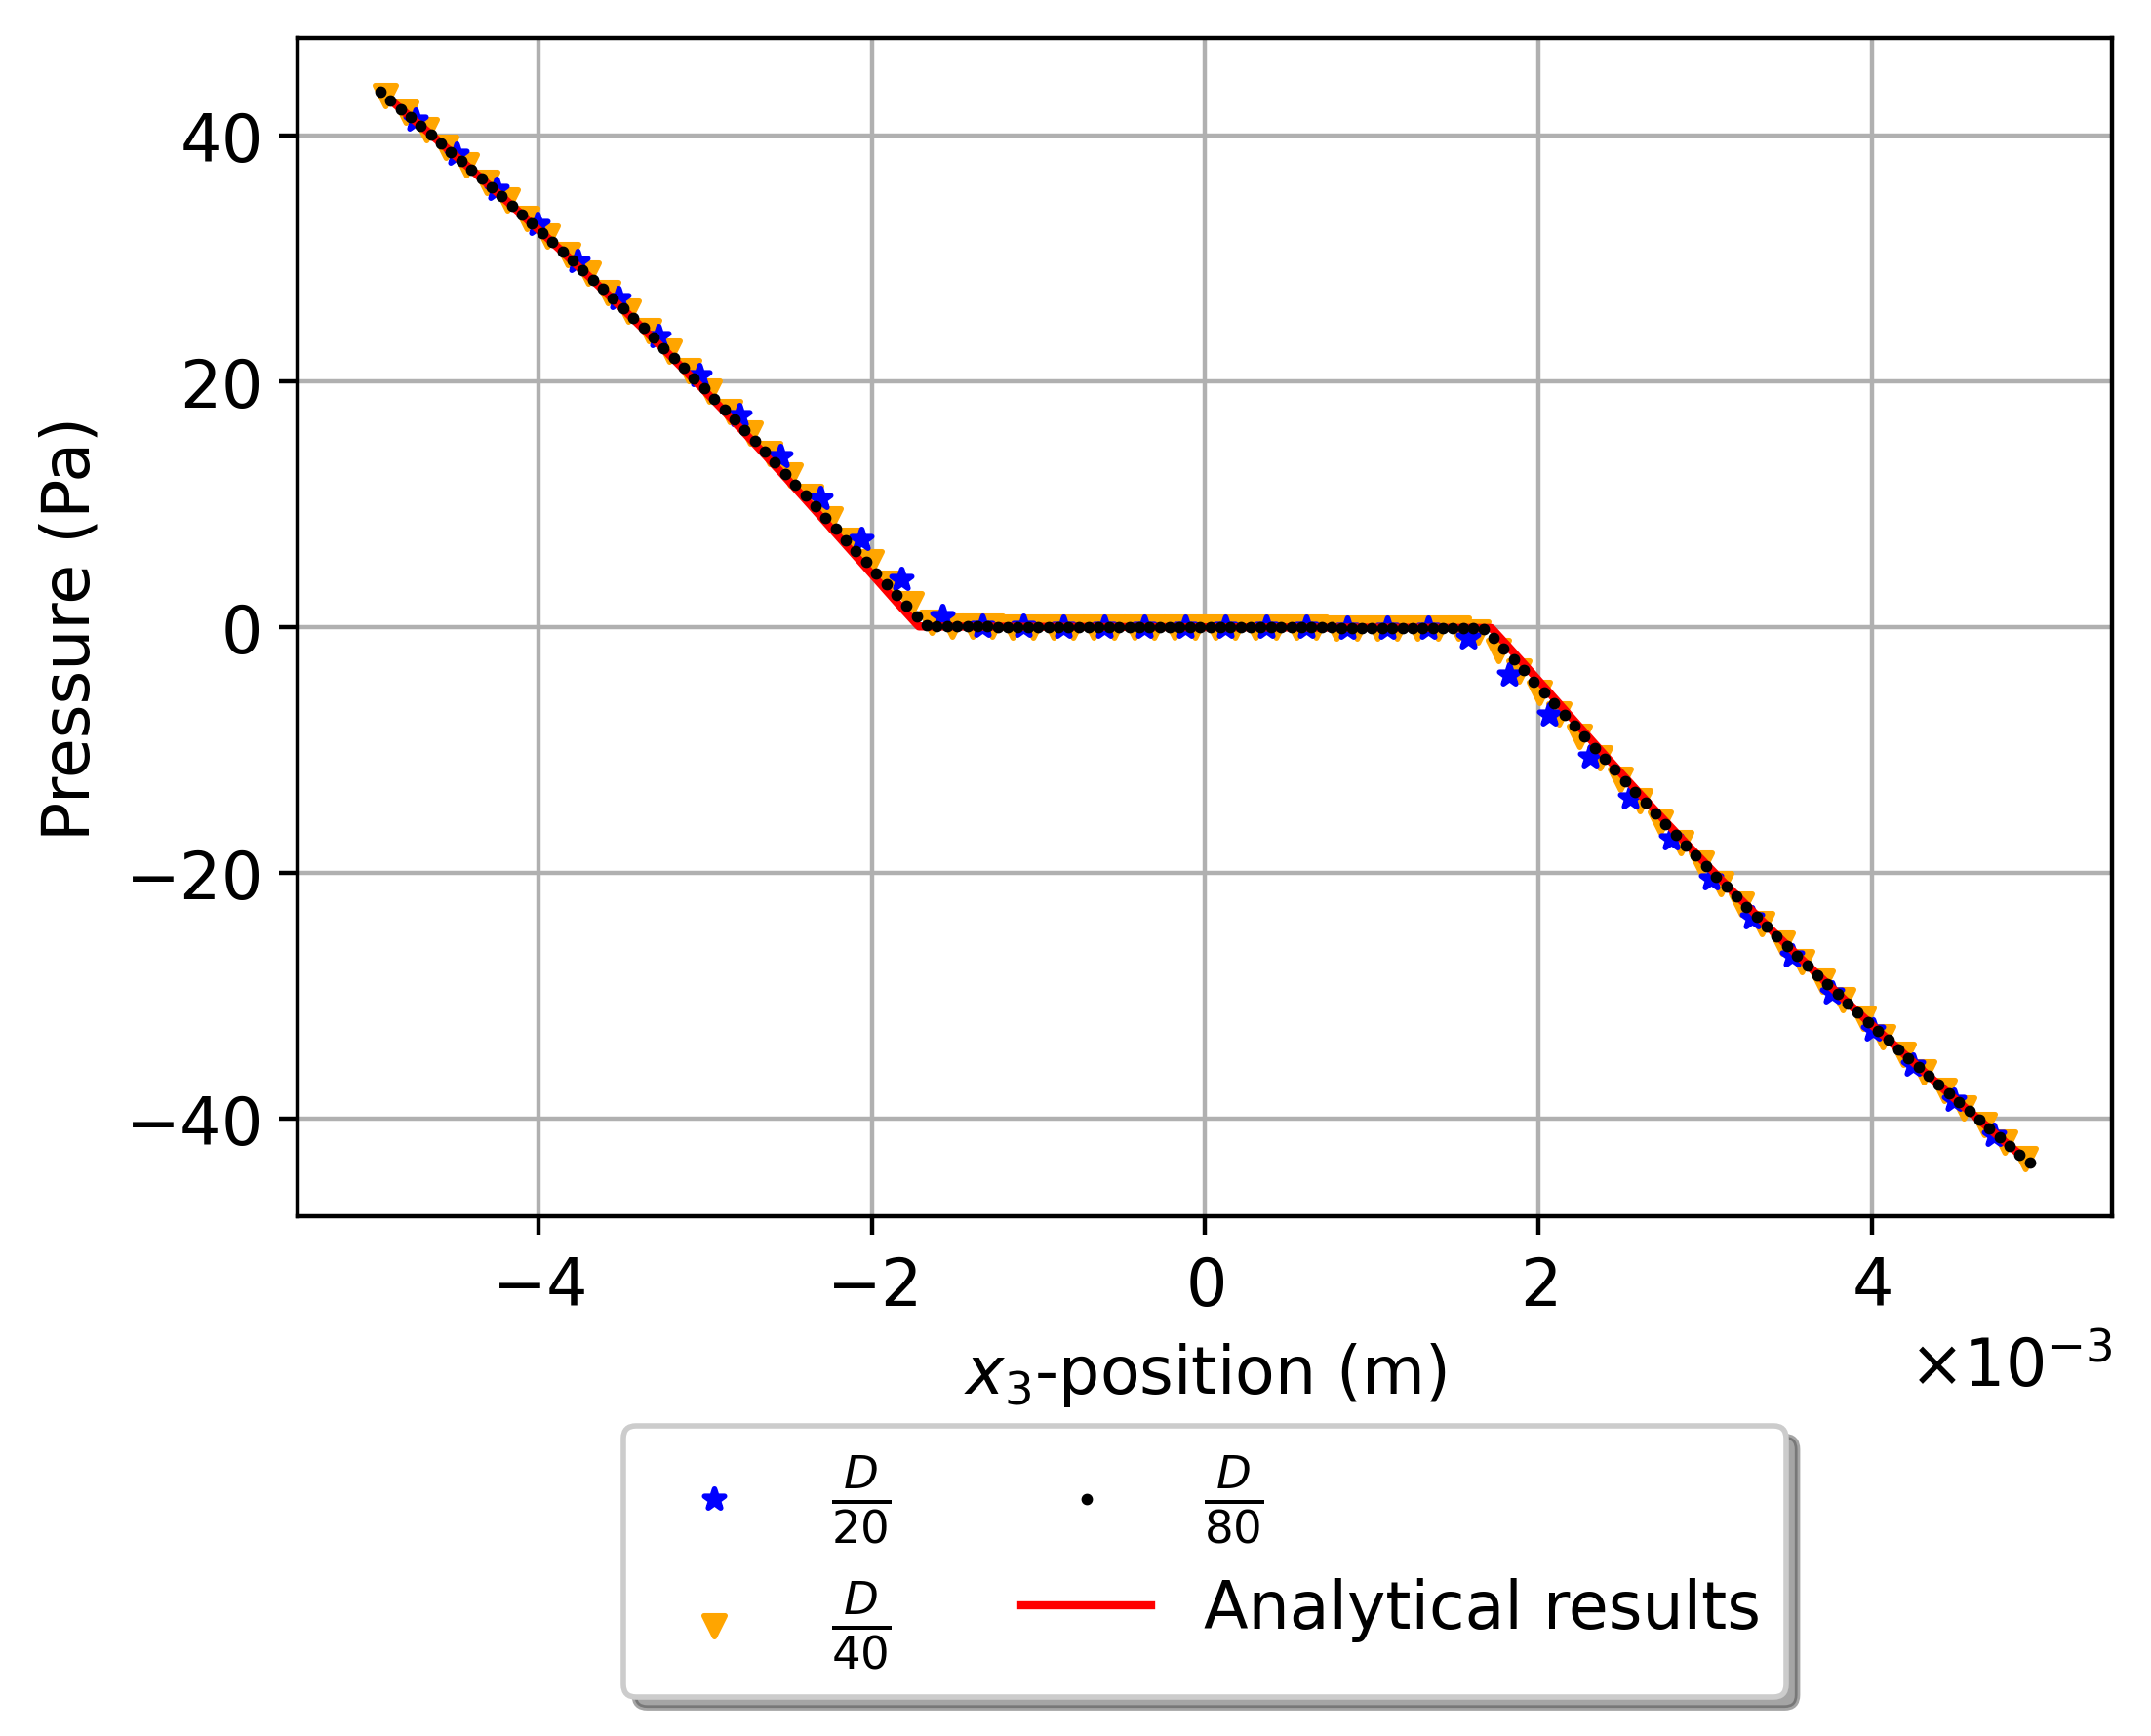

In [142]:
PressureZAxisPlots(dframe_halfR, 2.42859e-03/2,2.42859e-03/2, 'MeshConvergence_pressure_halfR.png')

### residual plots for pressure

In [137]:
def piecewise_function(xVal, yVal, x,y,z):
    
    g = 9.80665
    rhol= 997
    rhog = 1.225
    r= 2.42859e-03
    h=((2.42859e-03)**2 - (xVal)**2 - (yVal)**2)**0.5 
    #x=xVal
    #y=yVal
    # Define the conditions
    conditions = [
        (z < -h),
        (z >= -h) & (z <= h),
        (z > h)
    ]
    
    # Define the corresponding functions or values for each condition
    functions = [
        lambda  z: -(rhog-rhol)*rhol/(2*rhog+rhol)*g*z*(r**3)/(x**2+y**2 +z**2)**(3/2) - rhol*g*z,
        lambda  z: -3*rhog*rhol/(2*rhog + rhol)*g*z,
        lambda  z: -(rhog-rhol)*rhol/(2*rhog+rhol)*g*z*(r**3)/(x**2+y**2 +z**2)**(3/2) - rhol*g*z
    ]
    
    # Use np.piecewise to apply the conditions and functions
    return np.piecewise(z, conditions, functions)

def PressureResidualPlots(dframe,xVal, yVal, fig_name):
    rcParams["figure.dpi"] = 400
    r=2.42859e-03
    # Example usage
    z_values = np.linspace(-2*r,2*r,1000) #pressureNum["Points:2"].values
    #y_values = piecewise_function(0.0001215, 0.0001215, z_values)
    # y_values = piecewise_function(xPos, yPos, z_values)
    fig, ax = plt.subplots()
    
    resolutions = dframe.index.get_level_values("resolution").unique()
    markers=['*','v','.','']
    colors=['blue','orange','black','']
    sizes=[15,15,5,0]
    orders=[4,3,6,0]
    pDev=np.array([])
    
    for i, resolution in enumerate(resolutions):                
        df_subset = dframe.loc[resolution]
        df_analy = piecewise_function(xVal, yVal, df_subset['CellCenters:0'].iloc[1], df_subset['CellCenters:1'].iloc[1], df_subset['CellCenters:2'].to_numpy())
        ax.scatter(df_subset['CellCenters:2'], 
                   (df_subset['p'] - df_analy + 0.3775845),
                   marker=markers[i], s=sizes[i], label=r"$\frac{D}{%s}$" % (int(resolution/10)), color=colors[i], zorder=orders[i])
        pDev=np.append(pDev, (df_subset['p'] - df_analy))
    # ax.scatter(pSampN80['CellCenters:2'], pSampN80['p'], s=1, label="Numerical results (N80)", color='blue', zorder=3)
    # ax.plot(z_values,0,color='r', label="Analytical results", zorder=5)
    # ax.axhline(y=0,xmin=0.047,xmax=0.955,color='r', label="Analytical results", zorder=5)

    ax.set_ylabel("Pressure deviation (Pa)")
    ax.set_xlabel(r"$x_3$-position (m)")
    #plt.xscale("log")
    #plt.yscale("log")
    # plt.xlim(-0.0025, 0.0025)
    # plt.yscale('symlog')
    ax.grid()
    ax.set_axisbelow(True)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)

    plt.savefig(fig_name, facecolor='w', dpi=400,bbox_inches='tight')
    return pDev
    #plt.show()

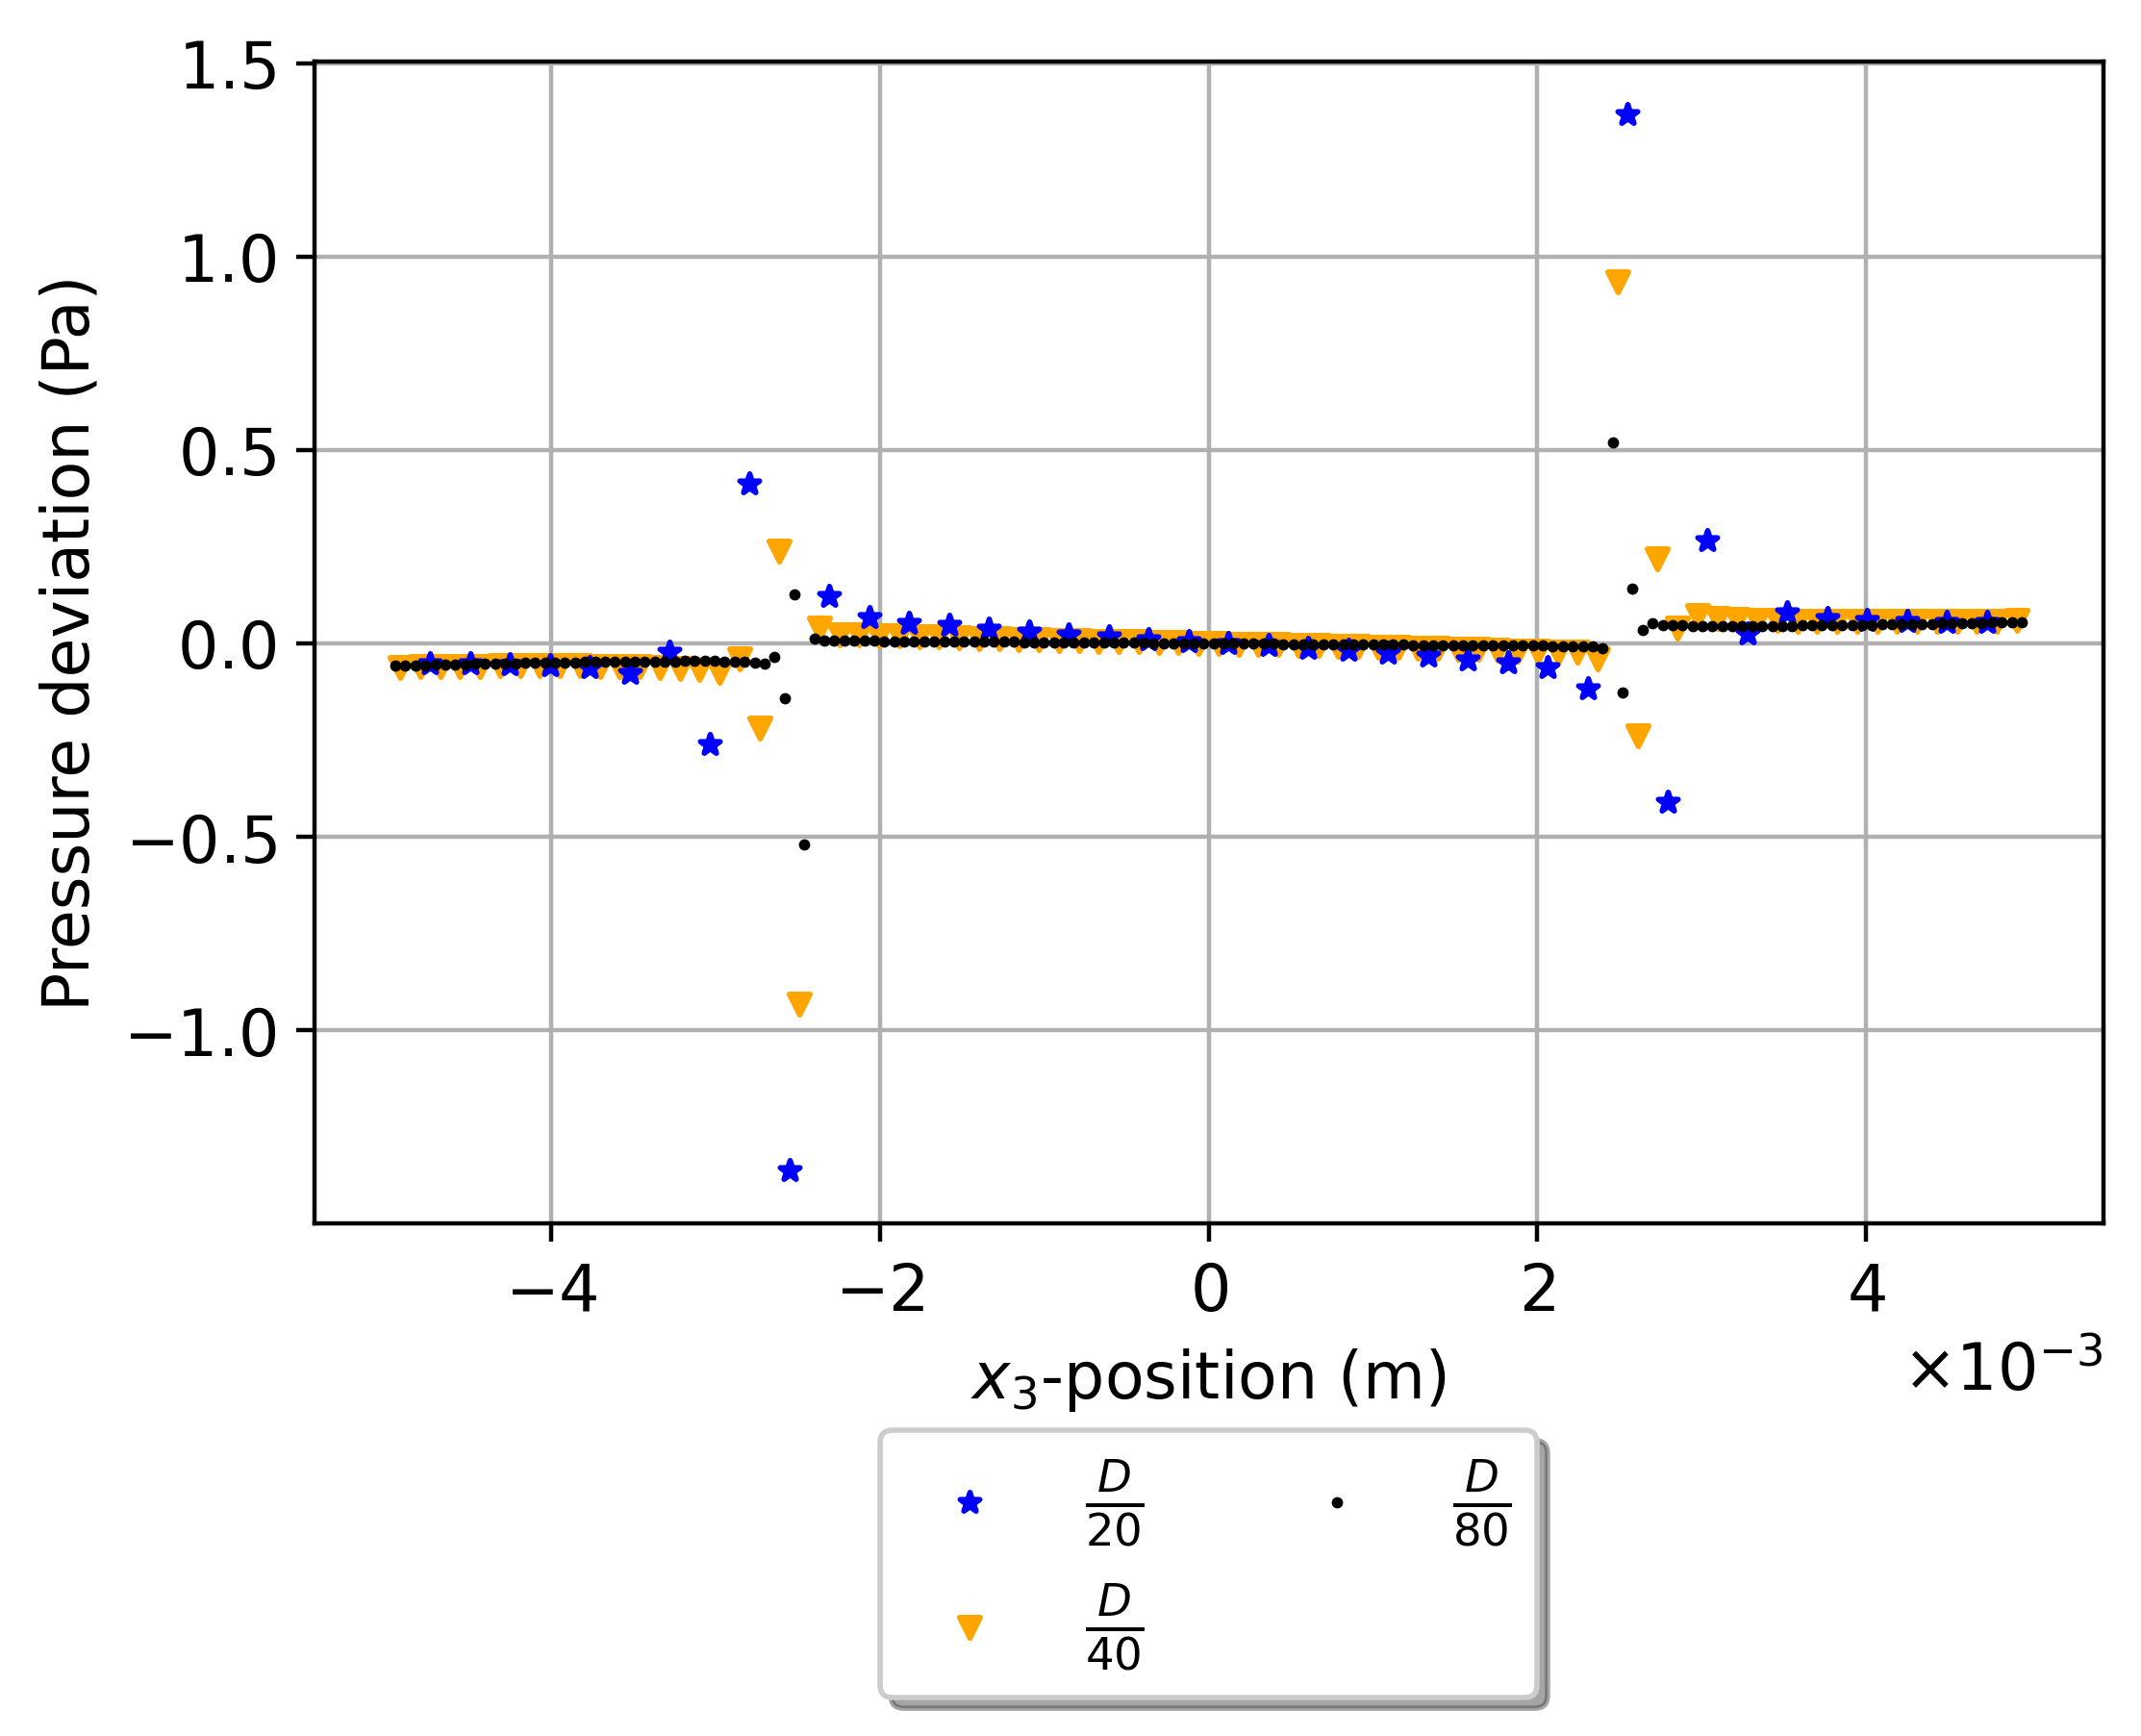

In [138]:
pDevZaxis=PressureResidualPlots(dframe_PressureZAxis, 0 ,0 ,'PressureScatteredRes_zAxis.png')

In [136]:
pDevZaxis[183]

-0.3775845069559104

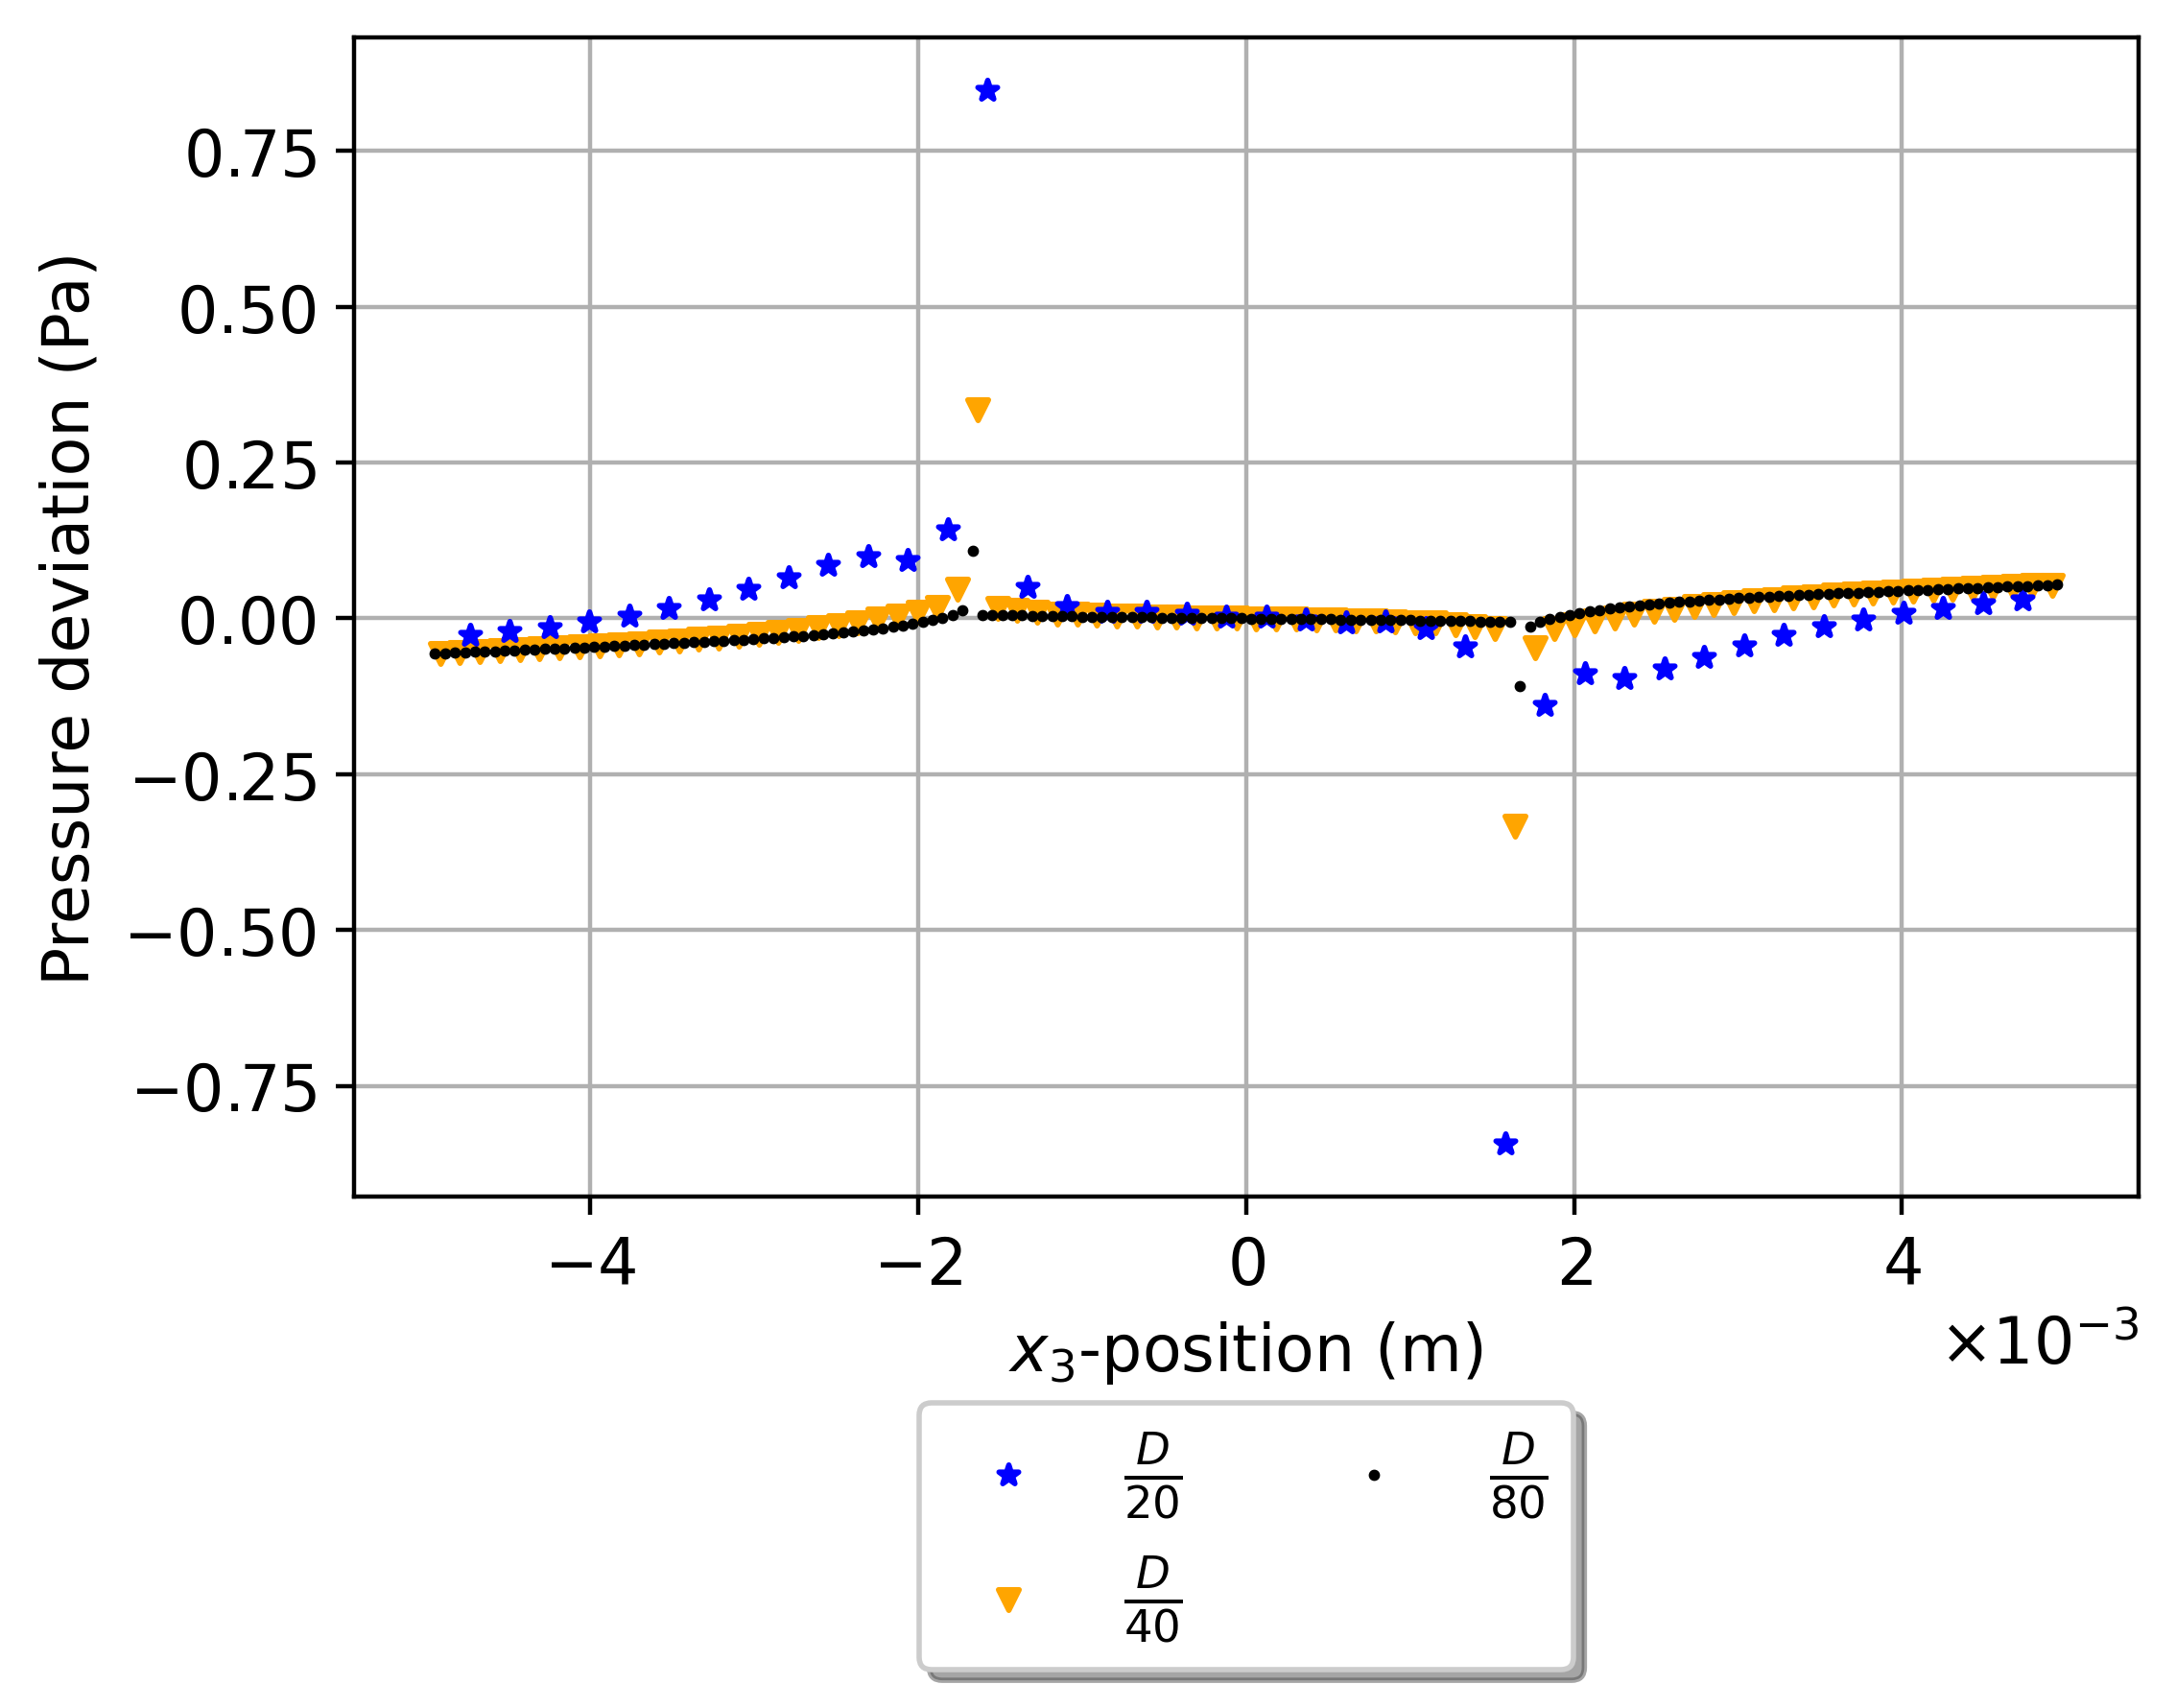

In [139]:
r=2.42859e-03
pDevZHalf=PressureResidualPlots(dframe_halfR,r/2, r/2, 'PressureScatteredRes_halfR.png')

In [113]:
g = 9.80665
rhol= 997
rhog = 1.225
r= 2.42859e-03
z = 20*r
x=0
y=0

(rhog-rhol)*rhol/(2*rhog+rhol)*g*z*(r**3)/(x**2+y**2 +z**2)**(3/2)

-0.059143931652202136

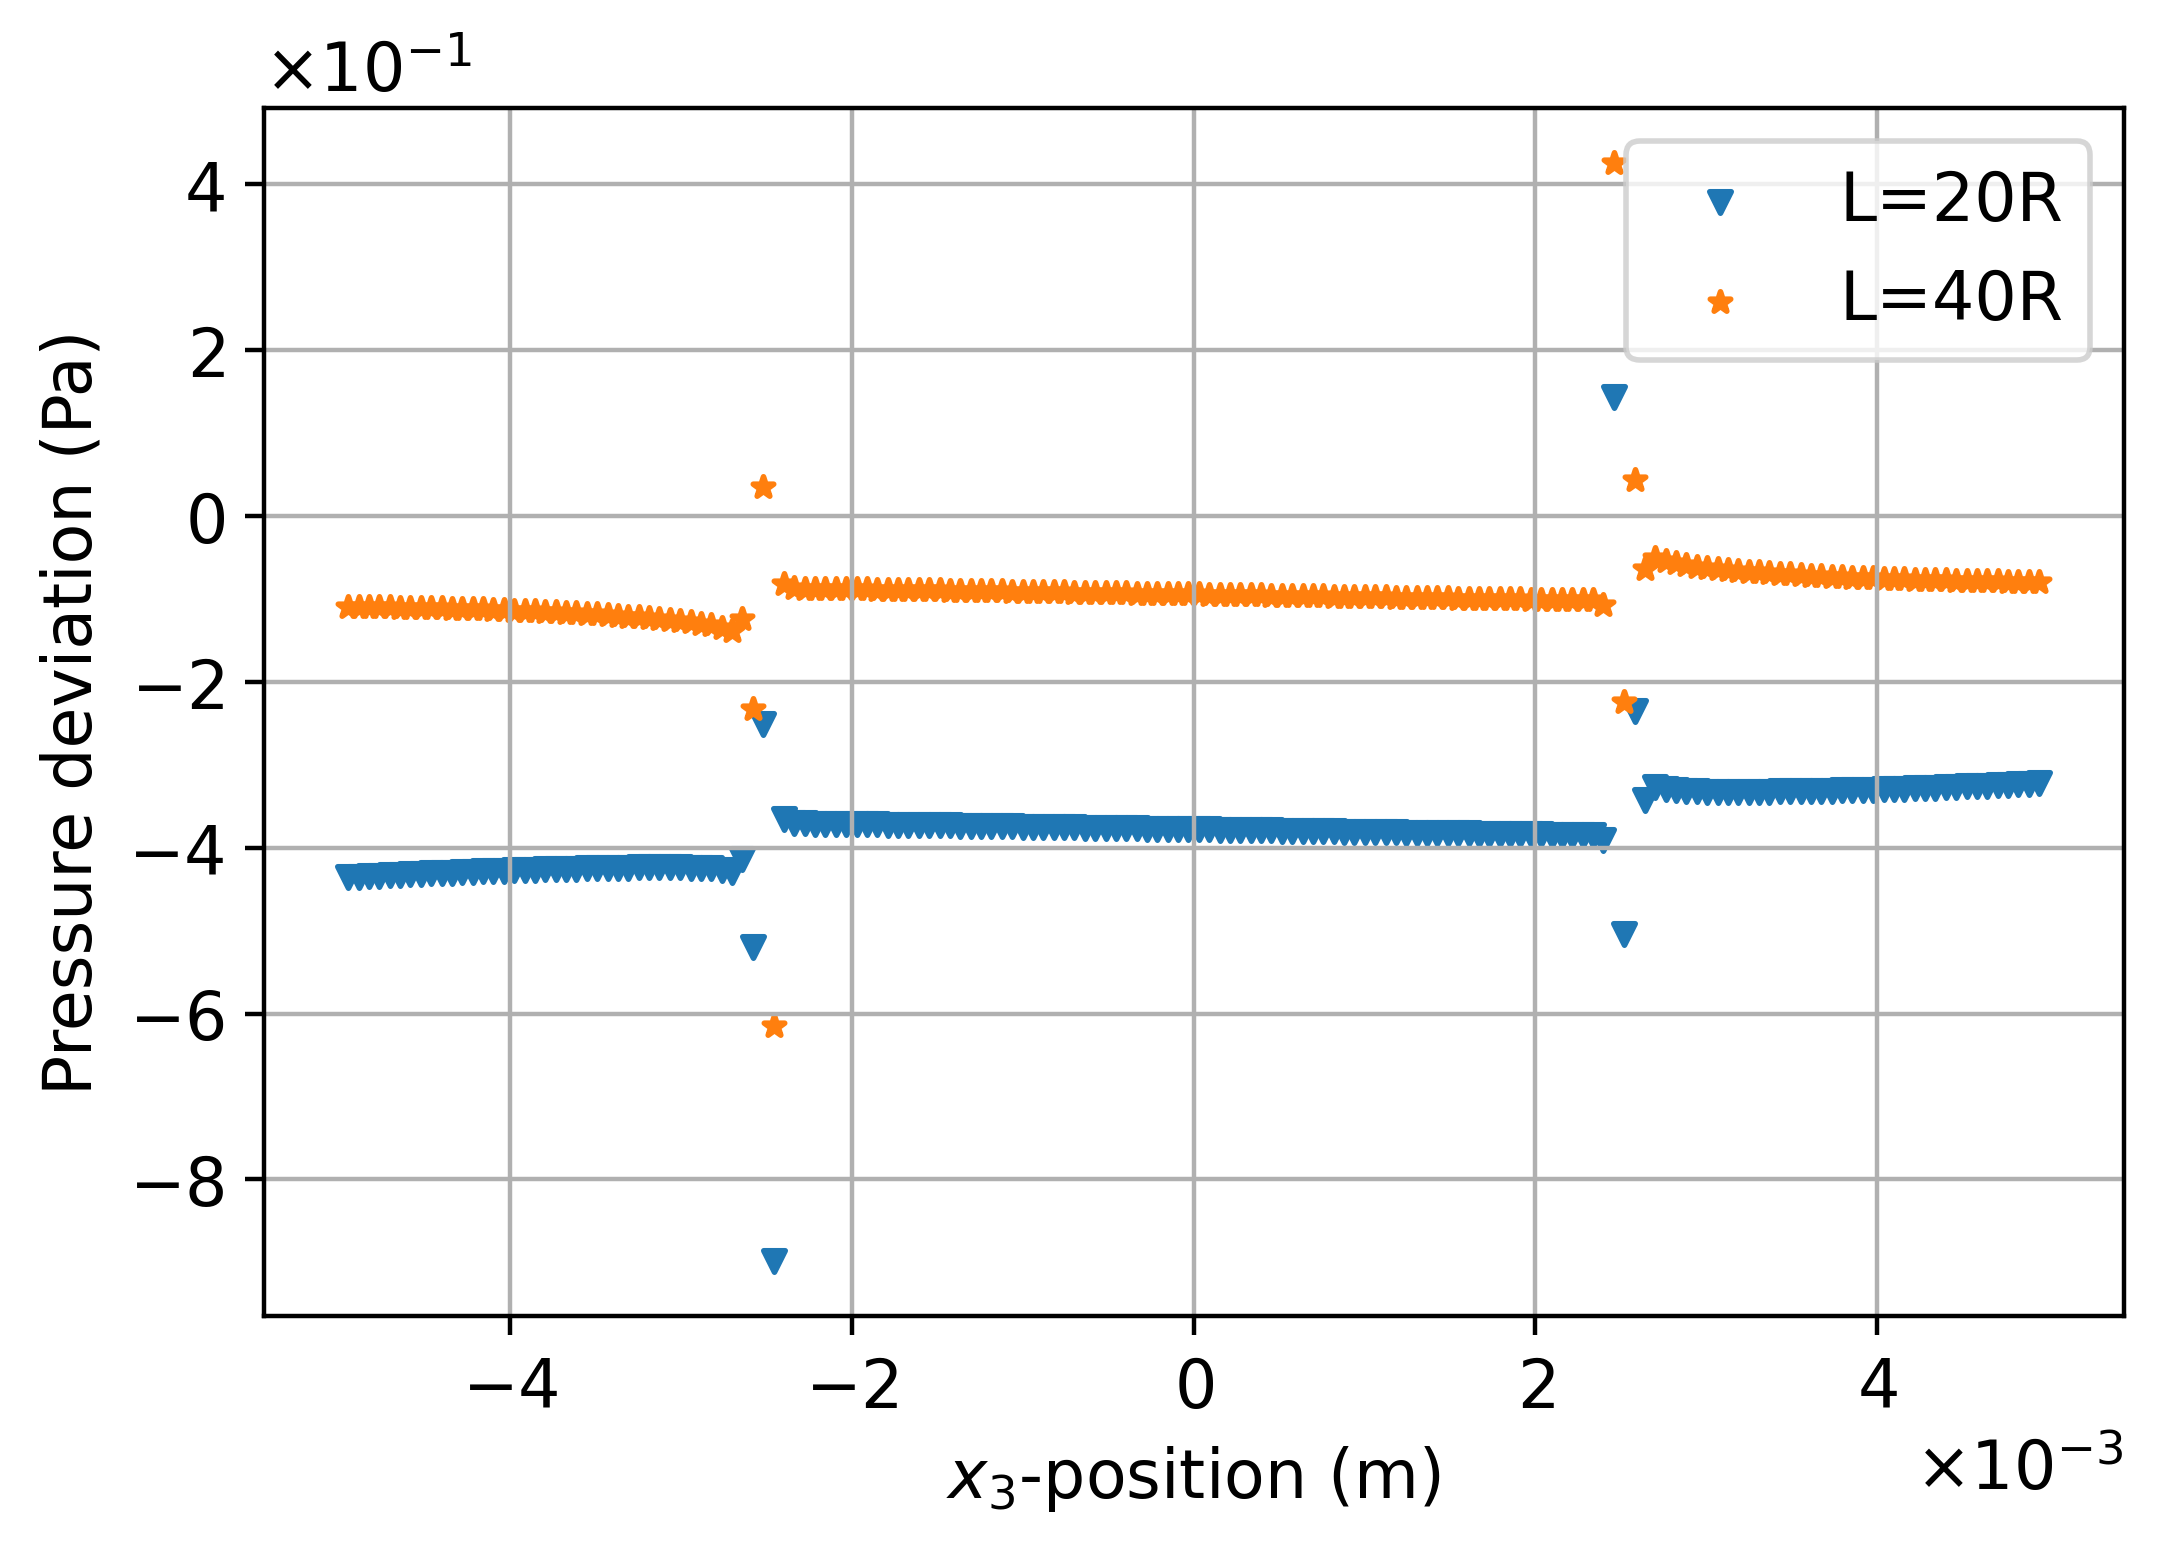

<Figure size 2400x1600 with 0 Axes>

In [121]:
L20R = pd.read_csv('isoAdv-MeshConvergenceTest_00002_templateCase/Pressure_zAxis.csv', sep=",", header=0)
L40R = pd.read_csv('largerRegion/Pressure_zAxis.csv', sep=",", header=0)

xVal = 0
yVal=0

df_analy = piecewise_function(xVal, yVal, L20R['CellCenters:0'].iloc[1], L20R['CellCenters:1'].iloc[1], L20R['CellCenters:2'].to_numpy())
plt.scatter(L20R['CellCenters:2'], 
                   (L20R['p'] - df_analy),  marker="v",
                    label=r"L=20R", s=15)#, color=colors[i], zorder=orders[i])
plt.scatter(L40R['CellCenters:2'], 
                   (L40R['p'] - df_analy), marker="*",
                    label=r"L=40R", s=15)#, color=colors[i], zorder=orders[i])
plt.ylabel("Pressure deviation (Pa)")
plt.xlabel(r"$x_3$-position (m)")

plt.grid()
plt.legend()
plt.show()
plt.savefig('PressureComp_region.png', facecolor='w', dpi=400,bbox_inches='tight')

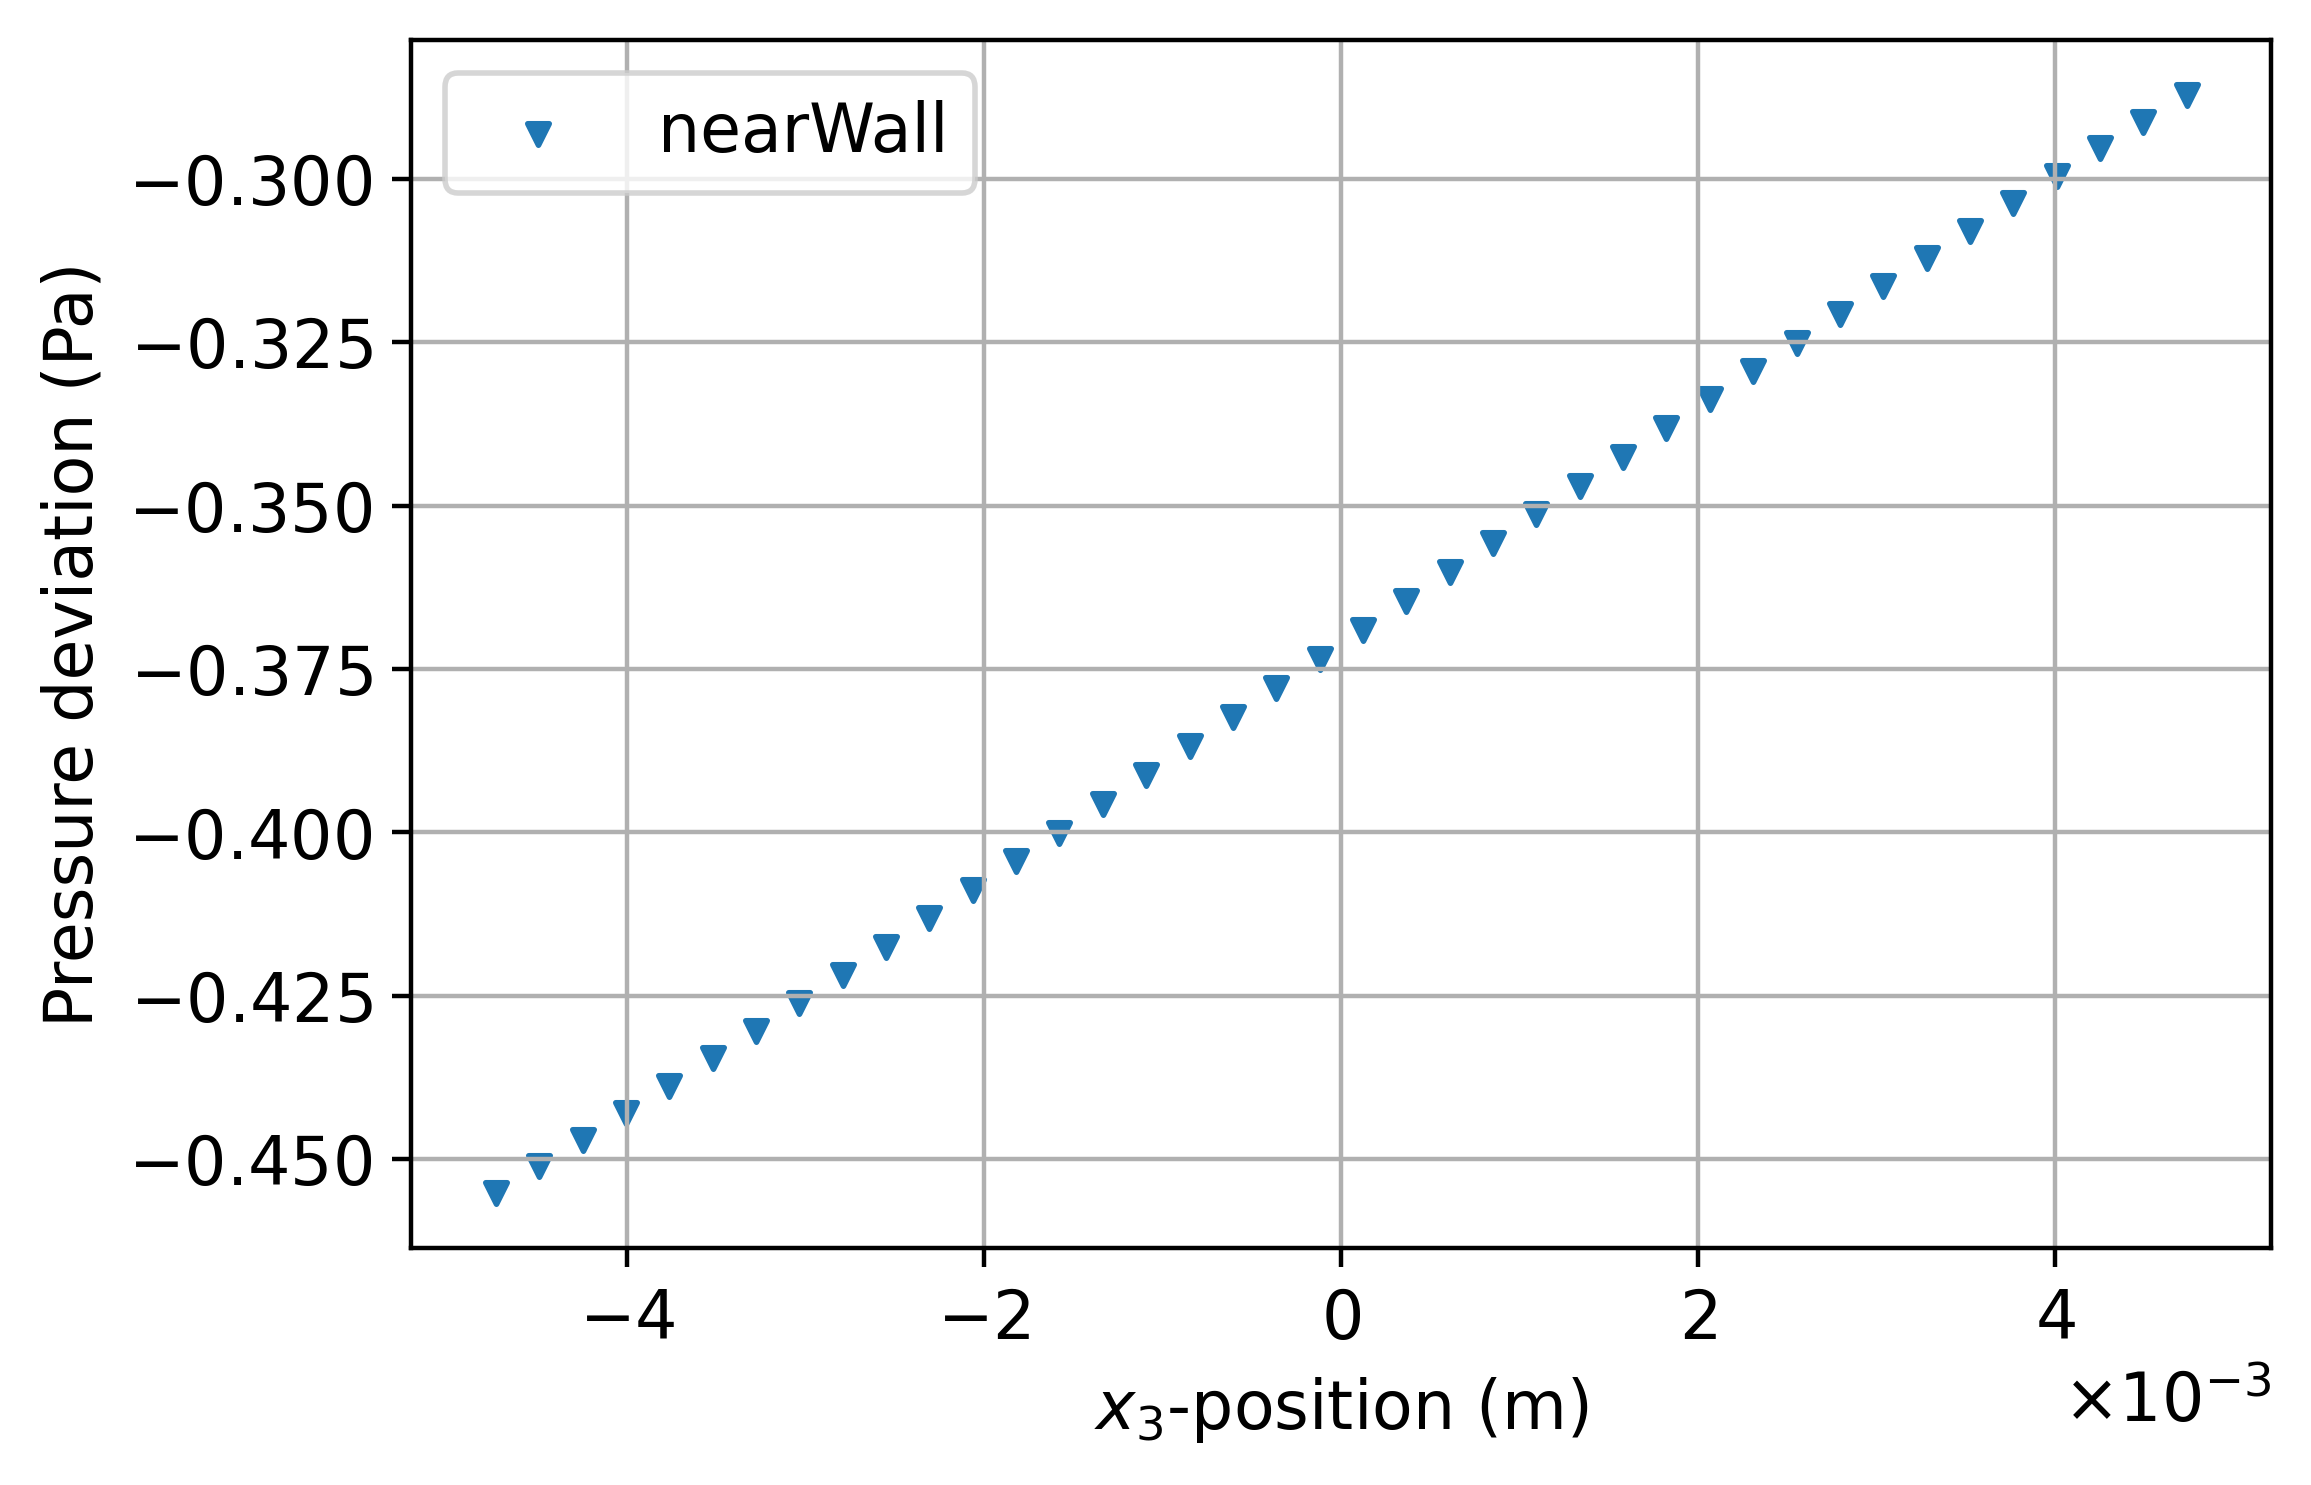

In [128]:

L20RnearW = pd.read_csv('isoAdv-MeshConvergenceTest_00002_templateCase/Pressure_nearWall.csv', sep=",", header=0)

x=L20RnearW['CellCenters:0'].iloc[1]
y=L20RnearW['CellCenters:1'].iloc[1]
z=L20RnearW['CellCenters:2'].to_numpy()

df_analy1 = -(rhog-rhol)*rhol/(2*rhog+rhol)*g*z*(r**3)/(x**2+y**2 +z**2)**(3/2) - rhol*g*z
#piecewise_function(xVal1, yVal1, L20R['CellCenters:0'].iloc[1], L20R['CellCenters:1'].iloc[1], L20R['CellCenters:2'].to_numpy())
plt.scatter(L20RnearW['CellCenters:2'], 
                   (L20RnearW['p'] - df_analy1),  marker="v",
                    label=r"nearWall", s=15)#, color=colors[i], zorder=orders[i])

plt.ylabel("Pressure deviation (Pa)")
plt.xlabel(r"$x_3$-position (m)")

plt.grid()
plt.legend()
plt.show()
#plt.savefig('PressureComp_region.png', facecolor='w', dpi=400,bbox_inches='tight')

### Root Mean Squrared Error (RMSE)

In [33]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/shared/apps/.gcc/10.2/.openmpi/4.0/python/3.9.5/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [34]:
#import sklearn
from sklearn.metrics import mean_squared_error

def PressureRMSEPlots(dframe,xVal, yVal, fig_name):
    rcParams["figure.dpi"] = 400
    r=2.42859e-03
    # Example usage
    z_values = np.linspace(-2*r,2*r,1000) #pressureNum["Points:2"].values
    #y_values = piecewise_function(0.0001215, 0.0001215, z_values)
    # y_values = piecewise_function(xPos, yPos, z_values)
    fig, ax = plt.subplots()
    
    resolutions = dframe.index.get_level_values("resolution").unique()
    markers=['*','v','.','']
    colors=['blue','orange','black','']
    sizes=[15,15,5,0]
    orders=[4,3,6,0]
    rmses=[]
    
    for i, resolution in enumerate(resolutions):                
        df_subset = dframe.loc[resolution]
        df_analy = piecewise_function(xVal, yVal, df_subset['CellCenters:0'].iloc[1], 
                                      df_subset['CellCenters:1'].iloc[1], df_subset['CellCenters:2'].to_numpy())
        rmses.append(np.sqrt(mean_squared_error(df_subset['p'].to_numpy(), df_analy)))
        #ax.scatter(df_subset['CellCenters:2'], 
                   #(df_subset['p'] - df_analy),
                   #marker=markers[i], s=sizes[i], label=r"$\frac{D}{%s}$" % (resolution/10), color=colors[i], zorder=orders[i])
    # ax.scatter(pSampN80['CellCenters:2'], pSampN80['p'], s=1, label="Numerical results (N80)", color='blue', zorder=3)
    # ax.plot(z_values,0,color='r', label="Analytical results", zorder=5)
    #ax.axhline(y=0,xmin=0.047,xmax=0.955,color='r', label="Analytical results", zorder=5)

    ax.set_ylabel("RMSE")
    Ns=[r"$\frac{D}{20}$",r"$\frac{D}{40}$",r"$\frac{D}{80}$"]
    #ax.set_xlabel("z-position (m)")
    #plt.xscale("log")
    #plt.yscale("log")
    # plt.xlim(-0.0025, 0.0025)
    # plt.yscale('symlog')
    #ax.grid()
    ax.bar(Ns, rmses)
    ax.set_axisbelow(True)
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
     #     fancybox=True, shadow=True, ncol=2)

    plt.savefig(fig_name, facecolor='w', dpi=400,bbox_inches='tight')
    #plt.show()

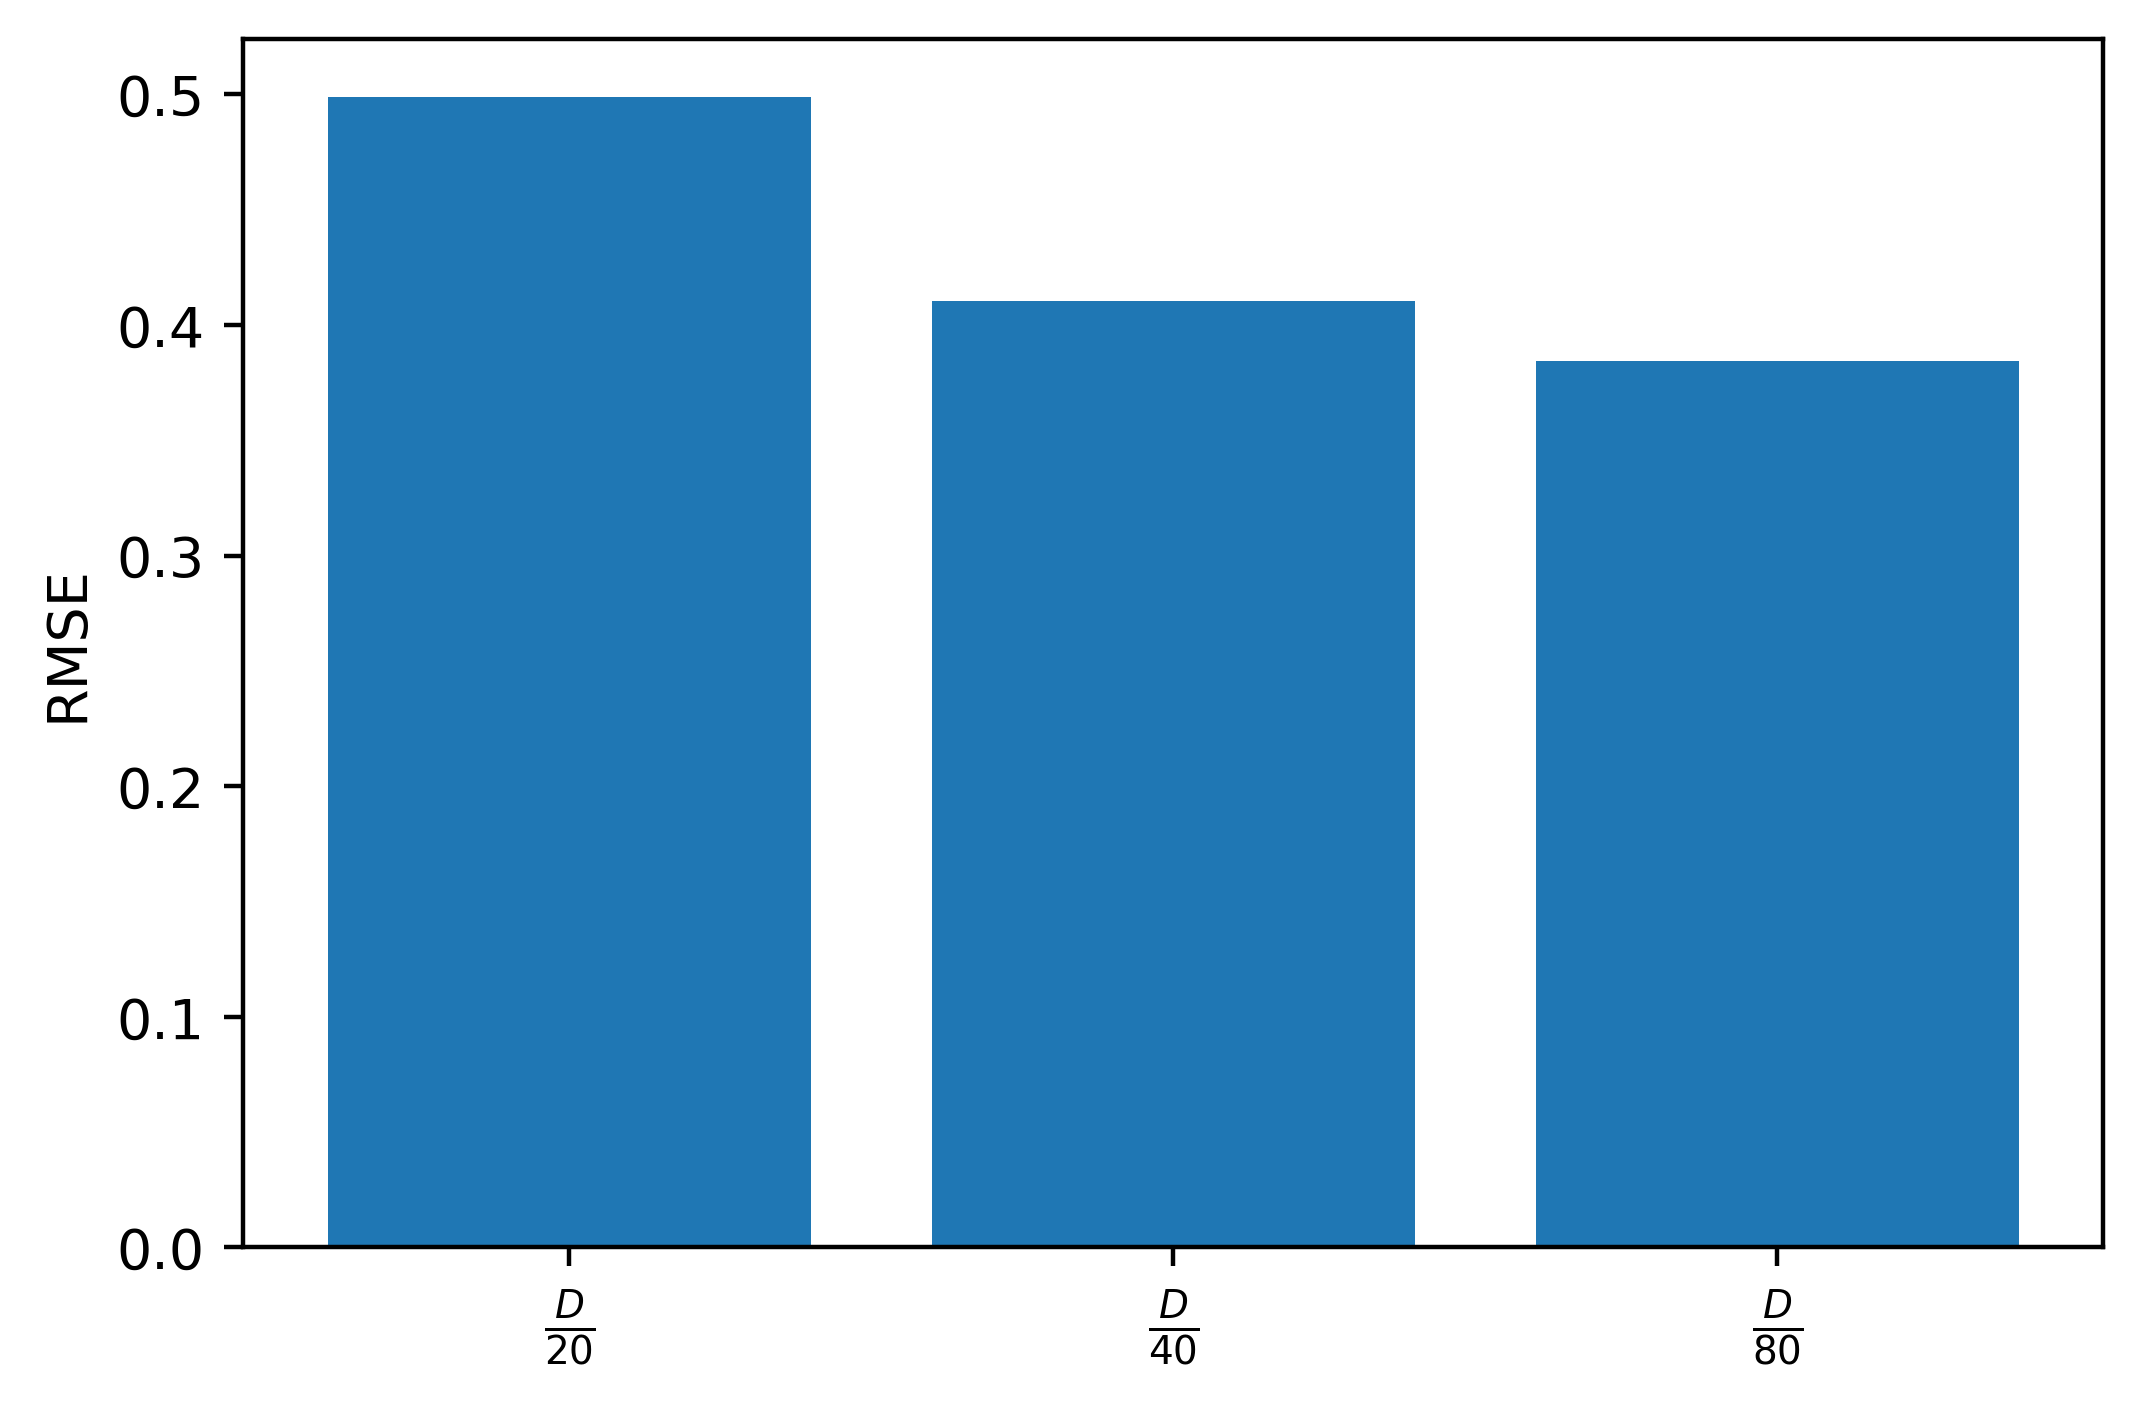

In [35]:
PressureRMSEPlots(dframe_PressureZAxis, 0.0,0.0, 'PressureRMSE_zAxis.png')

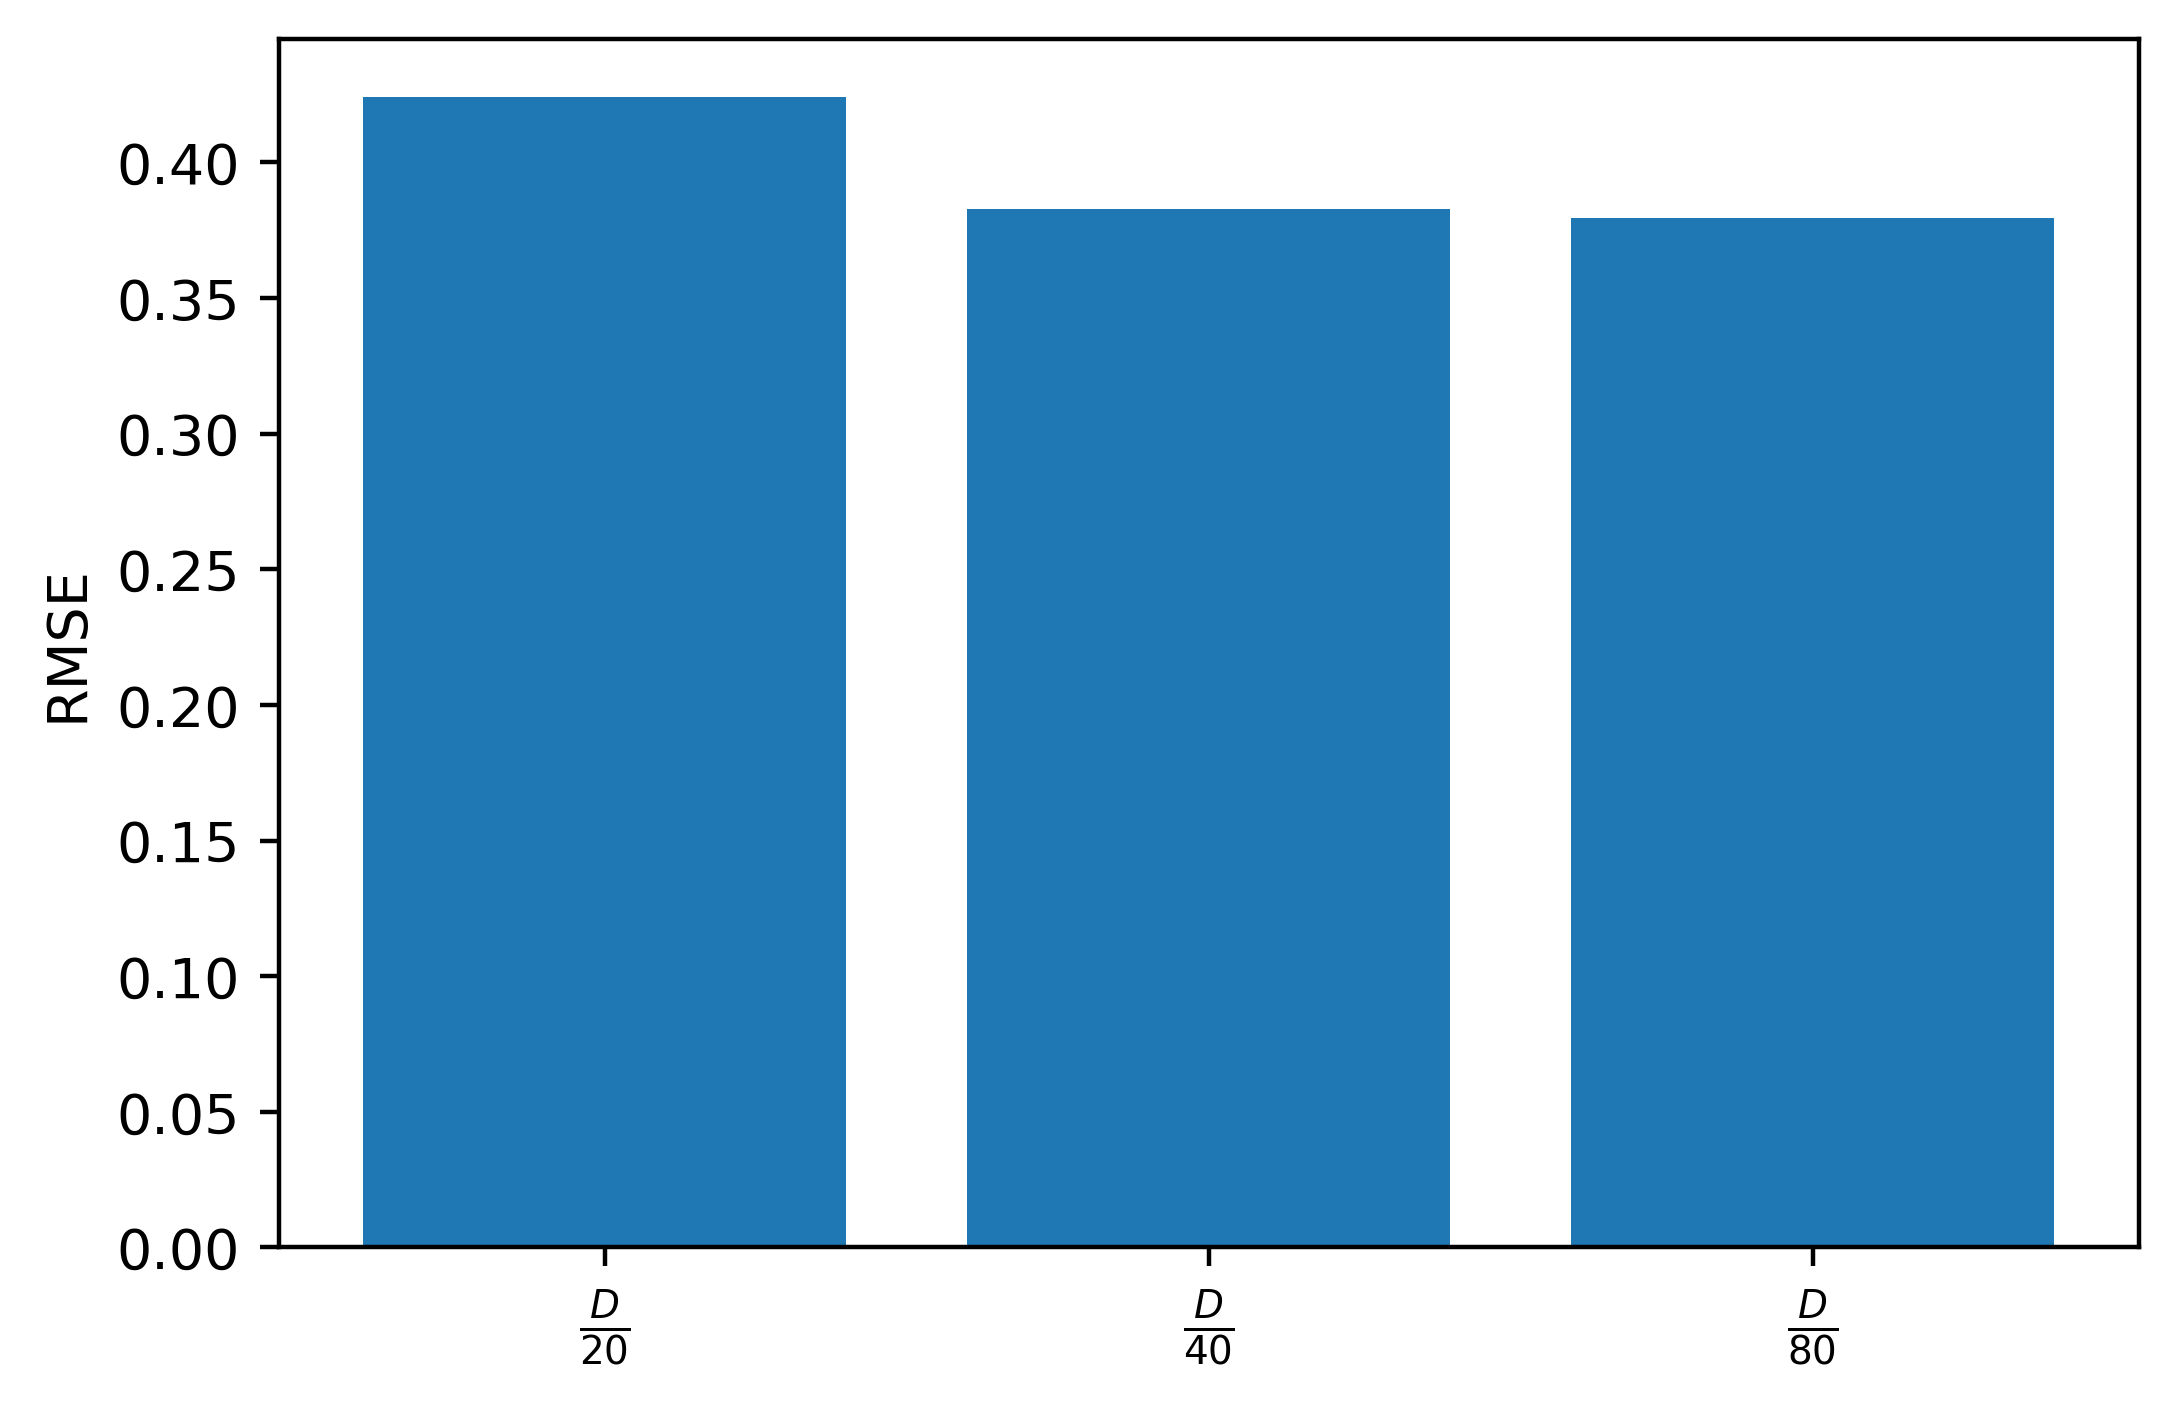

In [36]:
r=2.42859e-03
PressureRMSEPlots(dframe_halfR,r/2, r/2, 'PressureRMSE_halfR.png')

### Box Plot

In [37]:
def PressureBoxPlots(dframe,xVal, yVal, fig_name):
    rcParams["figure.dpi"] = 400
    r=2.42859e-03
    # Example usage
    # z_values = np.linspace(-2*r,2*r,1000) #pressureNum["Points:2"].values
    #y_values = piecewise_function(0.0001215, 0.0001215, z_values)
    # y_values = piecewise_function(xPos, yPos, z_values)
    fig, ax = plt.subplots()
    
    resolutions = dframe.index.get_level_values("resolution").unique()

    resData=[]
    
    for i, resolution in enumerate(resolutions):                
        df_subset = dframe.loc[resolution]
        df_analy = piecewise_function(xVal, yVal, df_subset['CellCenters:0'].iloc[1], 
                                      df_subset['CellCenters:1'].iloc[1], df_subset['CellCenters:2'].to_numpy())
        resData.append(df_subset['p'].to_numpy() - df_analy)
        

    #ax.set_ylabel("RMSE")
    Ns=[r"$\frac{D}{20}$",r"$\frac{D}{40}$",r"$\frac{D}{80}$"]
    #ax.set_xlabel("z-position (m)")
    #plt.xscale("log")
    #plt.yscale("log")
    # plt.xlim(-0.0025, 0.0025)
    # plt.yscale('symlog')
    #ax.grid()
    ax.boxplot(resData, labels=Ns)
    ax.set_ylabel("Pressure residual (Pa)")
    ax.set_axisbelow(True)
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
     #     fancybox=True, shadow=True, ncol=2)

    plt.savefig(fig_name, facecolor='w', dpi=400,bbox_inches='tight')
    #plt.show()

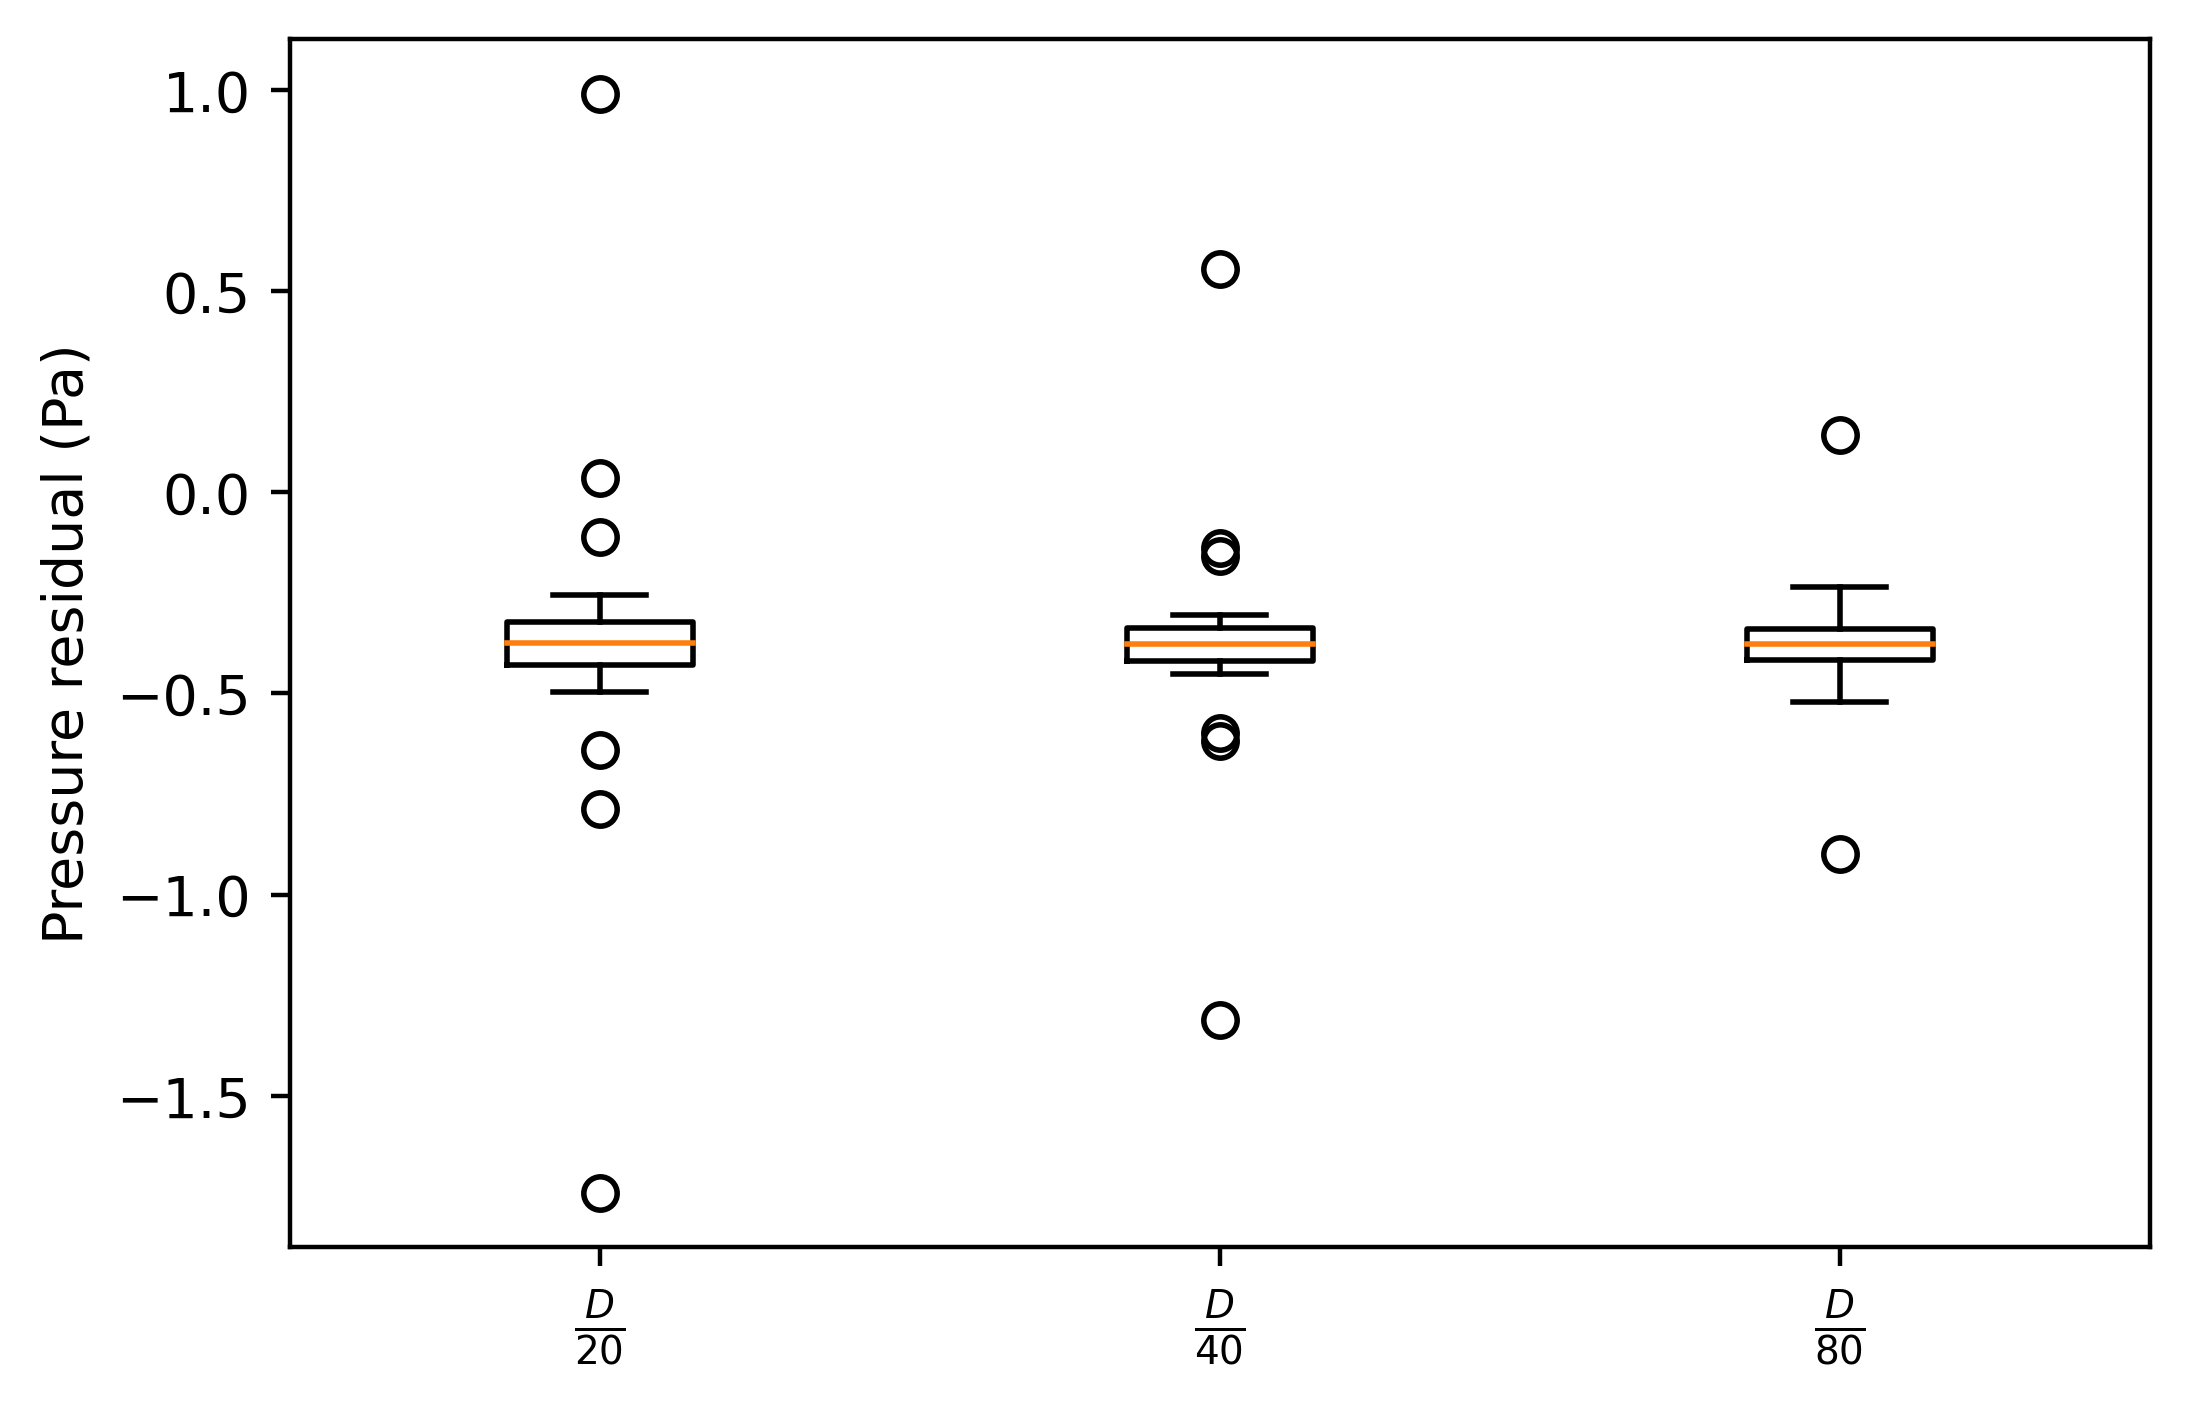

In [38]:
PressureBoxPlots(dframe_PressureZAxis, 0.0,0.0, 'PressureBoxRes_zAxis.png')

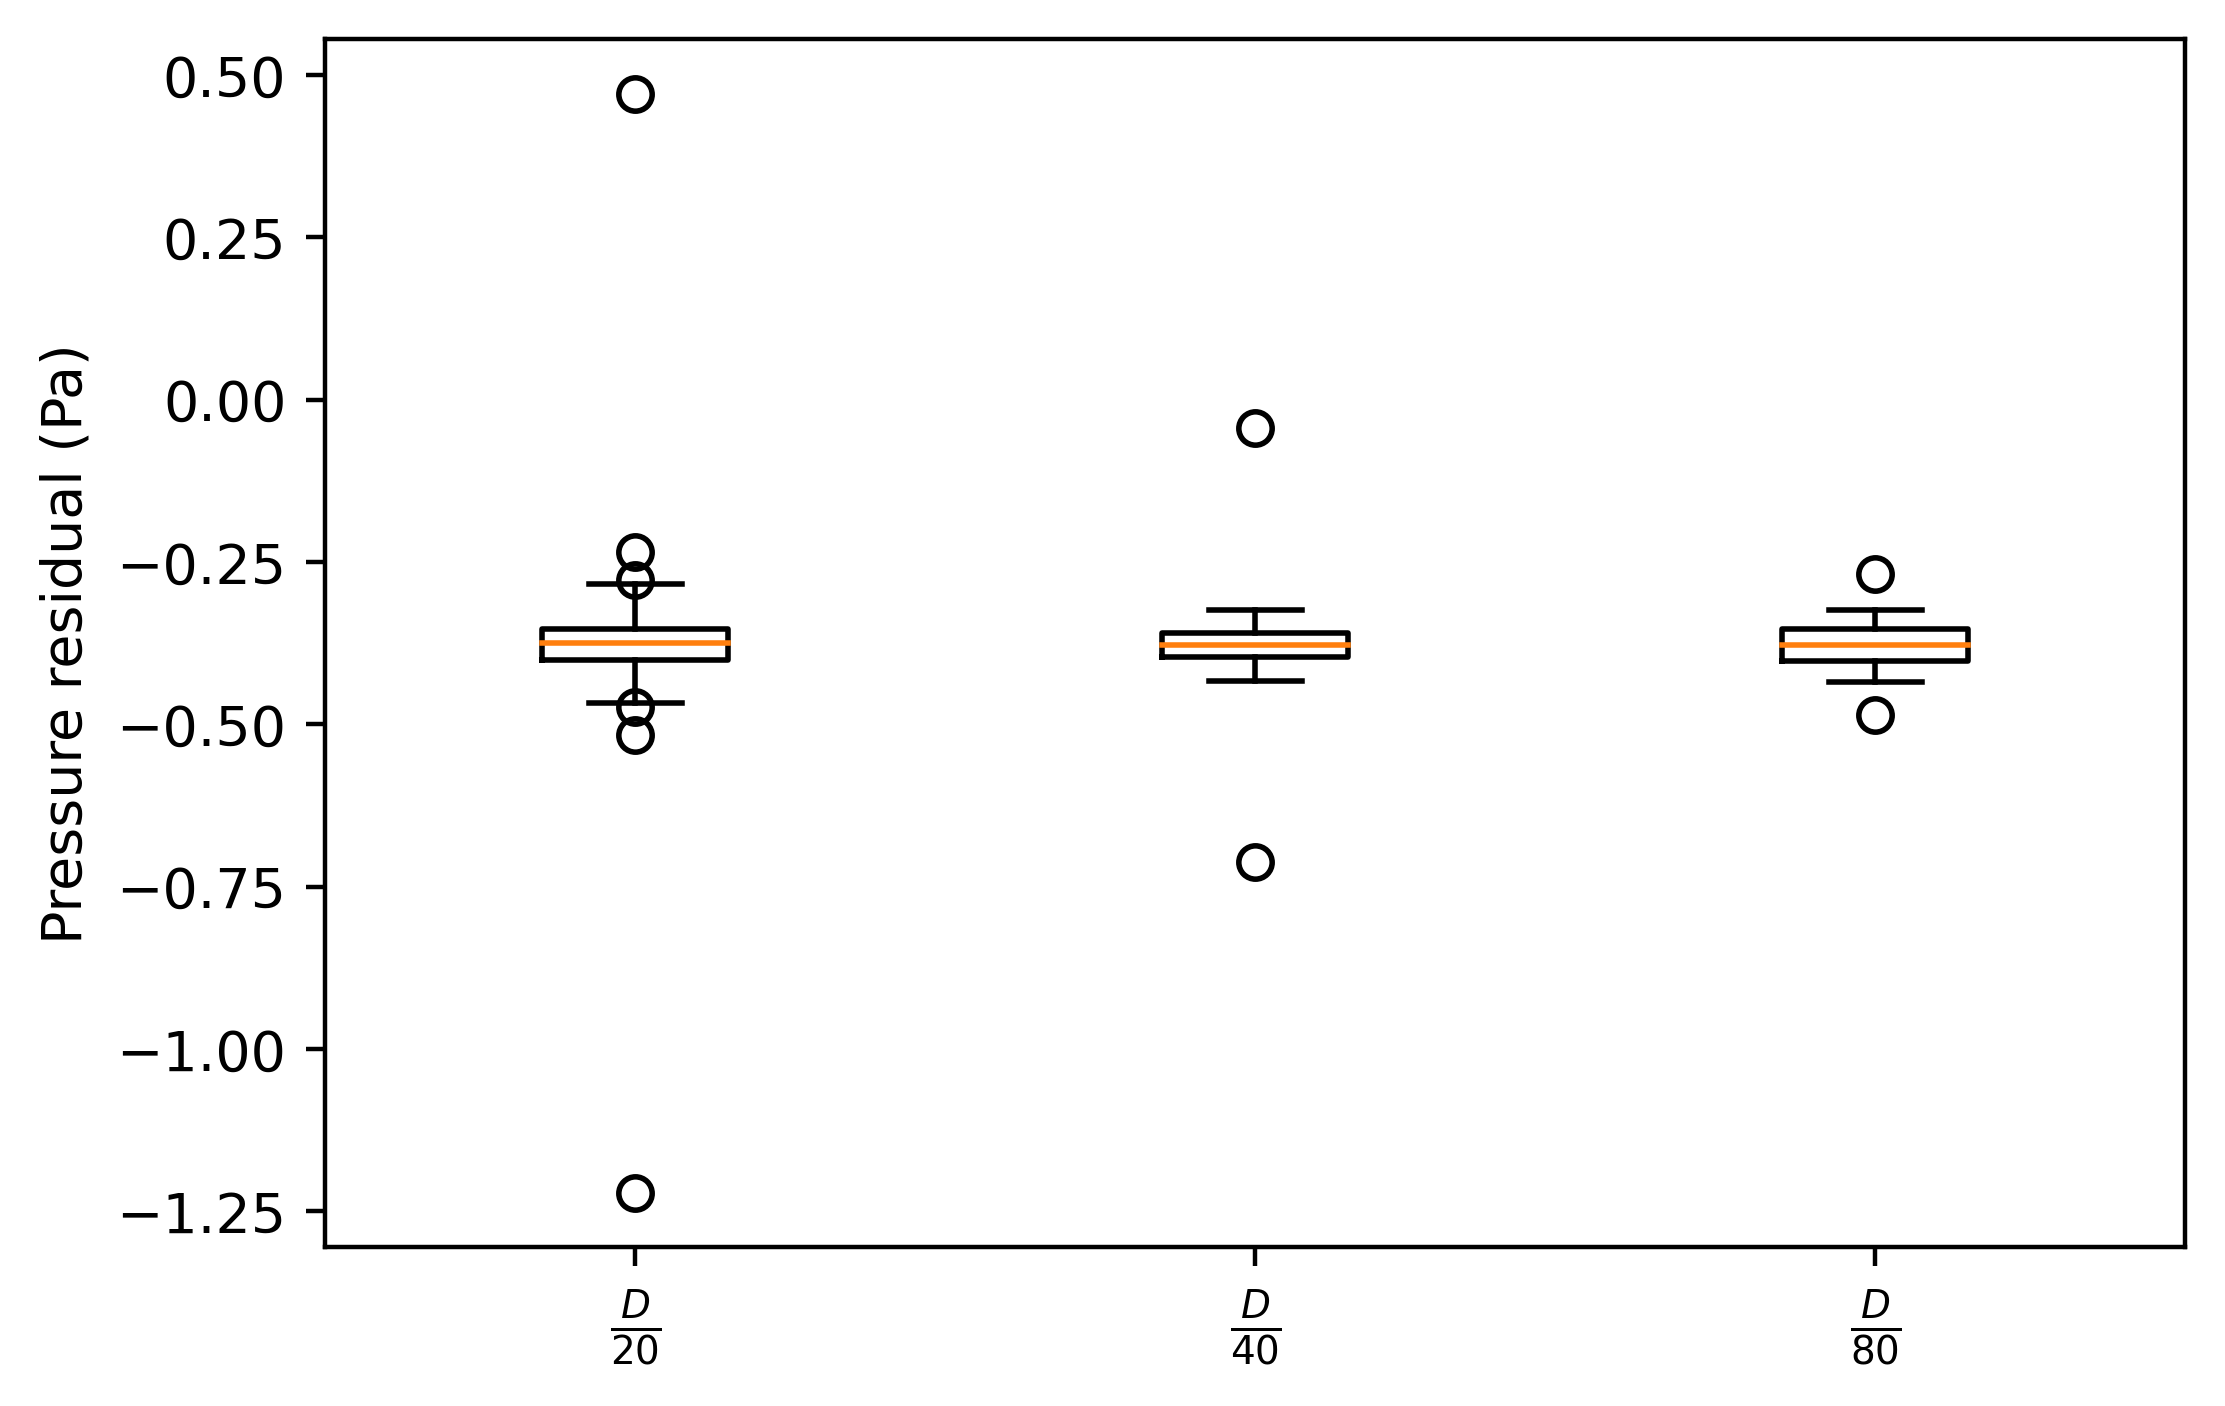

In [39]:
r=2.42859e-03
PressureBoxPlots(dframe_halfR,r/2, r/2, 'PressureBoxRes_halfR.png')

### Heatmap

In [40]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/shared/apps/.gcc/10.2/.openmpi/4.0/python/3.9.5/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [41]:
import seaborn as sns
def PressureHeatmapPlots(dframe,xVal, yVal, fig_name):
    rcParams["figure.dpi"] = 400
    r=2.42859e-03
    # Example usage
    # z_values = np.linspace(-2*r,2*r,1000) #pressureNum["Points:2"].values
    #y_values = piecewise_function(0.0001215, 0.0001215, z_values)
    # y_values = piecewise_function(xPos, yPos, z_values)
    fig, ax = plt.subplots()
    
    resolutions = dframe.index.get_level_values("resolution").unique()

    resData=[]
    
    for i, resolution in enumerate(resolutions):                
        df_subset = dframe.loc[resolution]
        df_analy = piecewise_function(xVal, yVal, df_subset['CellCenters:0'].iloc[1], 
                                      df_subset['CellCenters:1'].iloc[1], df_subset['CellCenters:2'].to_numpy())
        residuals = df_subset['p'].to_numpy() - df_analy
        print(residuals.shape)
        resData.append(residuals)
        

    #ax.set_ylabel("RMSE")
    resData=np.array(resData)
    Ns=[r"$\frac{D}{20}$",r"$\frac{D}{40}$",r"$\frac{D}{80}$"]
    #ax.set_xlabel("z-position (m)")
    #plt.xscale("log")
    #plt.yscale("log")
    # plt.xlim(-0.0025, 0.0025)
    # plt.yscale('symlog')
    #ax.grid()
    print(resData.shape)
    sns.heatmap(resData,annot=False, cmap='coolwarm')
    ax.set_ylabel("Pressure residual (Pa)")
    ax.set_axisbelow(True)
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
     #     fancybox=True, shadow=True, ncol=2)

    plt.savefig(fig_name, facecolor='w', dpi=400,bbox_inches='tight')
    #plt.show()

In [42]:
df_subset=dframe_PressureZAxis.loc[200]
df_analy=piecewise_function(0, 0, df_subset['CellCenters:0'].iloc[1], 
                                      df_subset['CellCenters:1'].iloc[1], df_subset['CellCenters:2'].to_numpy())
df_analy.shape
resData=[df_subset['p'].to_numpy() - df_analy,df_subset['p'].to_numpy() - df_analy,df_subset['p'].to_numpy() - df_analy]
np.array(resData).shape

(3, 40)

In [ ]:
r=2.42859e-03
PressureHeatmapPlots(dframe_halfR,r/2, r/2, '')

In [ ]:
pip install statsmodels

In [44]:
from statsmodels.graphics.gofplots import qqplot

def bland_altman_plot(group, analytical, ax, title):
    mean_values = np.mean([group, analytical], axis=0)  # Averages
    diff_values = group - analytical  # Differences
    mean_diff = np.mean(diff_values)  # Mean of the differences
    std_diff = np.std(diff_values)    # Standard deviation of the differences
    
    ax.scatter(mean_values, diff_values, color='blue', s=10)
    ax.axhline(mean_diff, color='red', linestyle='--')
    ax.axhline(mean_diff + 1.96 * std_diff, color='green', linestyle='--')
    ax.axhline(mean_diff - 1.96 * std_diff, color='green', linestyle='--')
    
    ax.set_title(title)
    ax.set_xlabel("Mean of Measurements")
    ax.set_ylabel("Difference")
    ax.grid(True)

def PressureBlandAltmanPlots(dframe,xVal, yVal, fig_name):
    rcParams["figure.dpi"] = 400
    r=2.42859e-03
    # Example usage
    # z_values = np.linspace(-2*r,2*r,1000) #pressureNum["Points:2"].values
    #y_values = piecewise_function(0.0001215, 0.0001215, z_values)
    # y_values = piecewise_function(xPos, yPos, z_values)
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
    resolutions = dframe.index.get_level_values("resolution").unique()
    
    for i, resolution in enumerate(resolutions):                
        df_subset = dframe.loc[resolution]
        df_analy = piecewise_function(xVal, yVal, df_subset['CellCenters:0'].iloc[1], 
                                      df_subset['CellCenters:1'].iloc[1], df_subset['CellCenters:2'].to_numpy())
        bland_altman_plot(df_subset['p'].to_numpy(), df_analy, ax[i],r"$\frac{D}{%s}$" % (int(resolution/10)) )
        

    #ax.set_ylabel("RMSE")
    #resData=np.array(resData)
    #Ns=[r"$\frac{D}{20}$",r"$\frac{D}{40}$",r"$\frac{D}{80}$"]
    #ax.set_xlabel("z-position (m)")
    #plt.xscale("log")
    #plt.yscale("log")
    # plt.xlim(-0.0025, 0.0025)
    # plt.yscale('symlog')
    #ax.grid()
    #print(resData.shape)
    #sns.heatmap(resData,annot=False, cmap='coolwarm')
    #ax.set_ylabel("Pressure residual (Pa)")
    #ax.set_axisbelow(True)
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
     #     fancybox=True, shadow=True, ncol=2)

    plt.savefig(fig_name, facecolor='w', dpi=400,bbox_inches='tight')
    #plt.show()

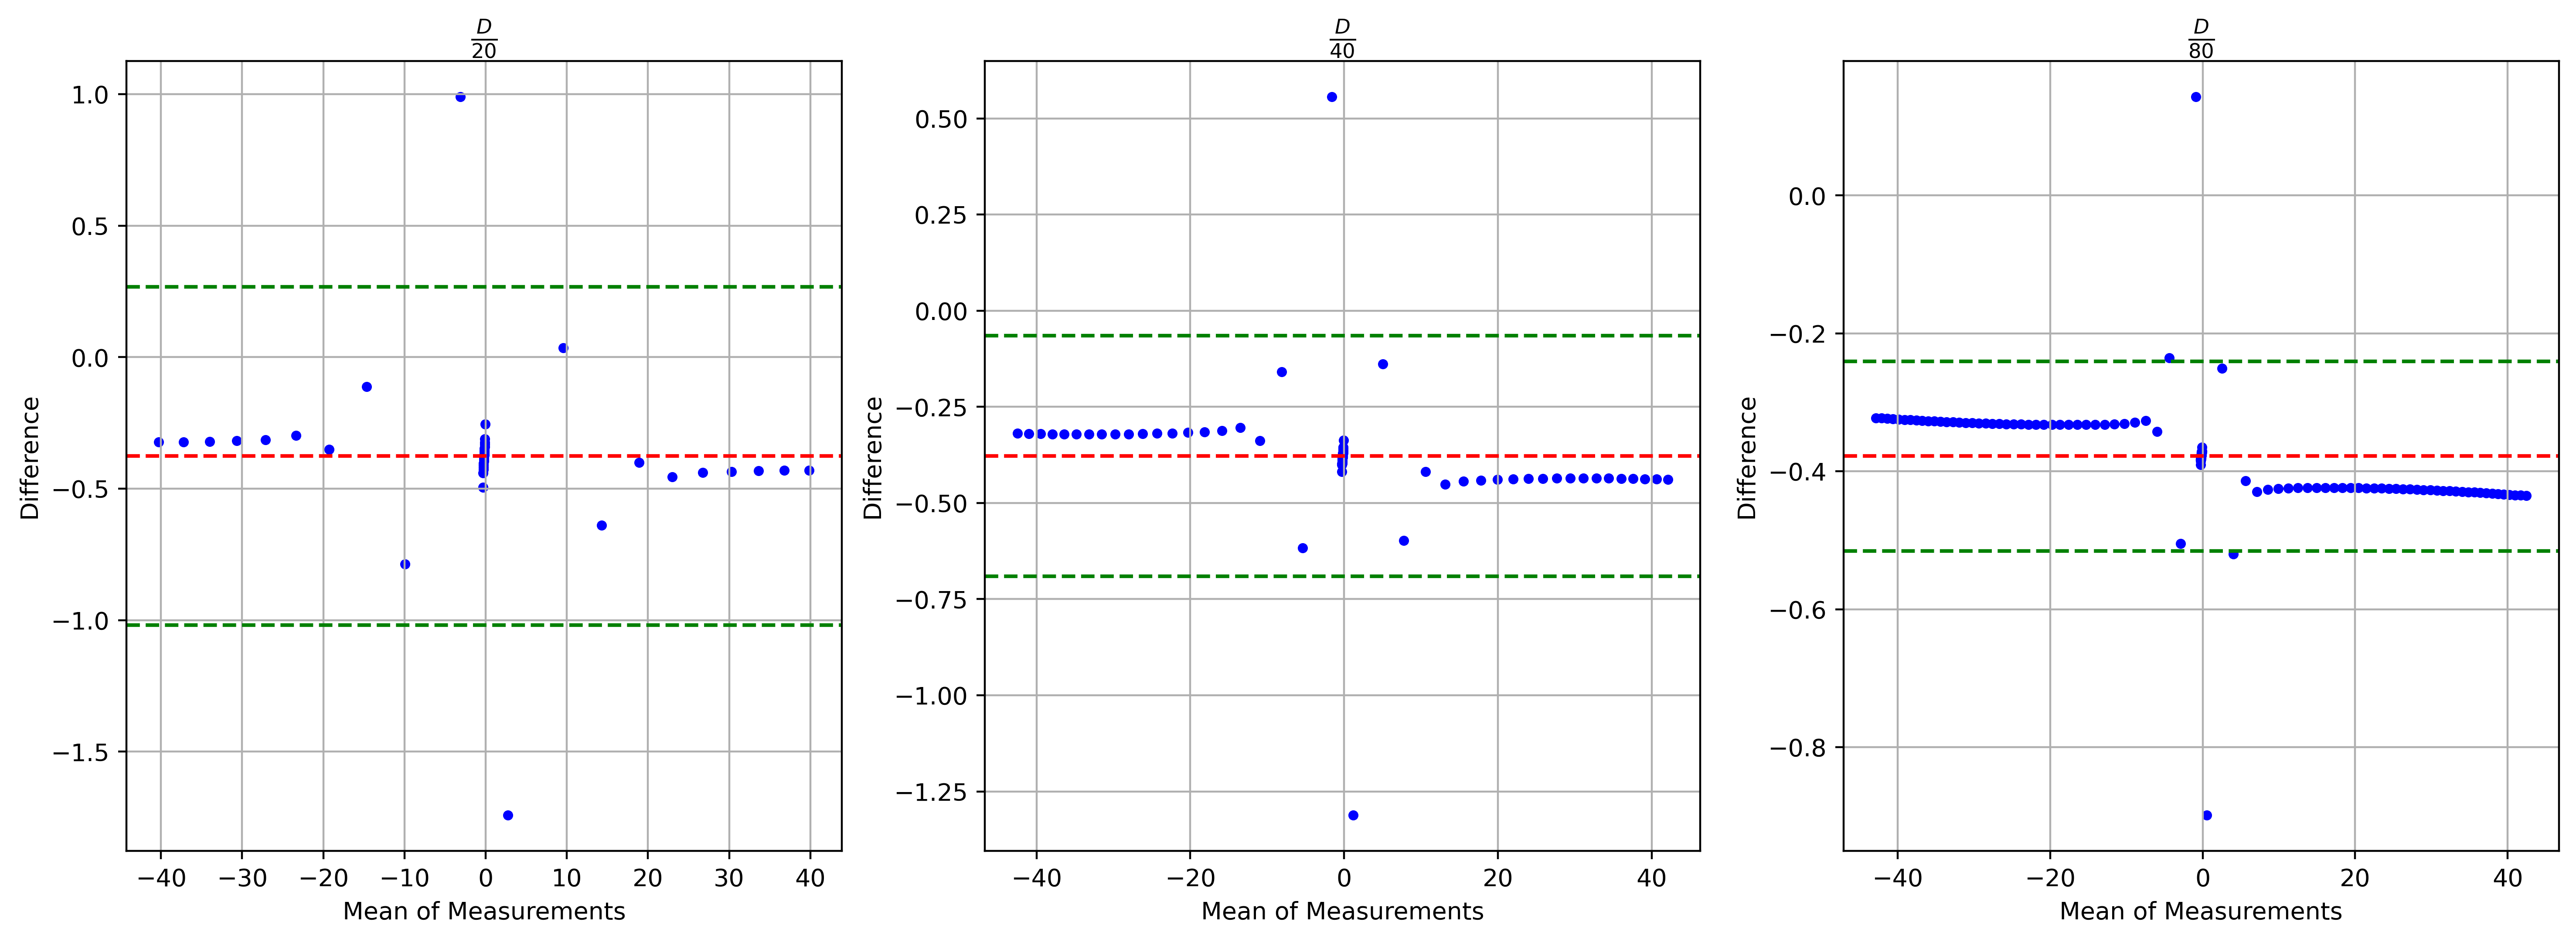

In [45]:
PressureBlandAltmanPlots(dframe_PressureZAxis, 0.0,0.0, 'PressureBAPlots_zAxis.png')

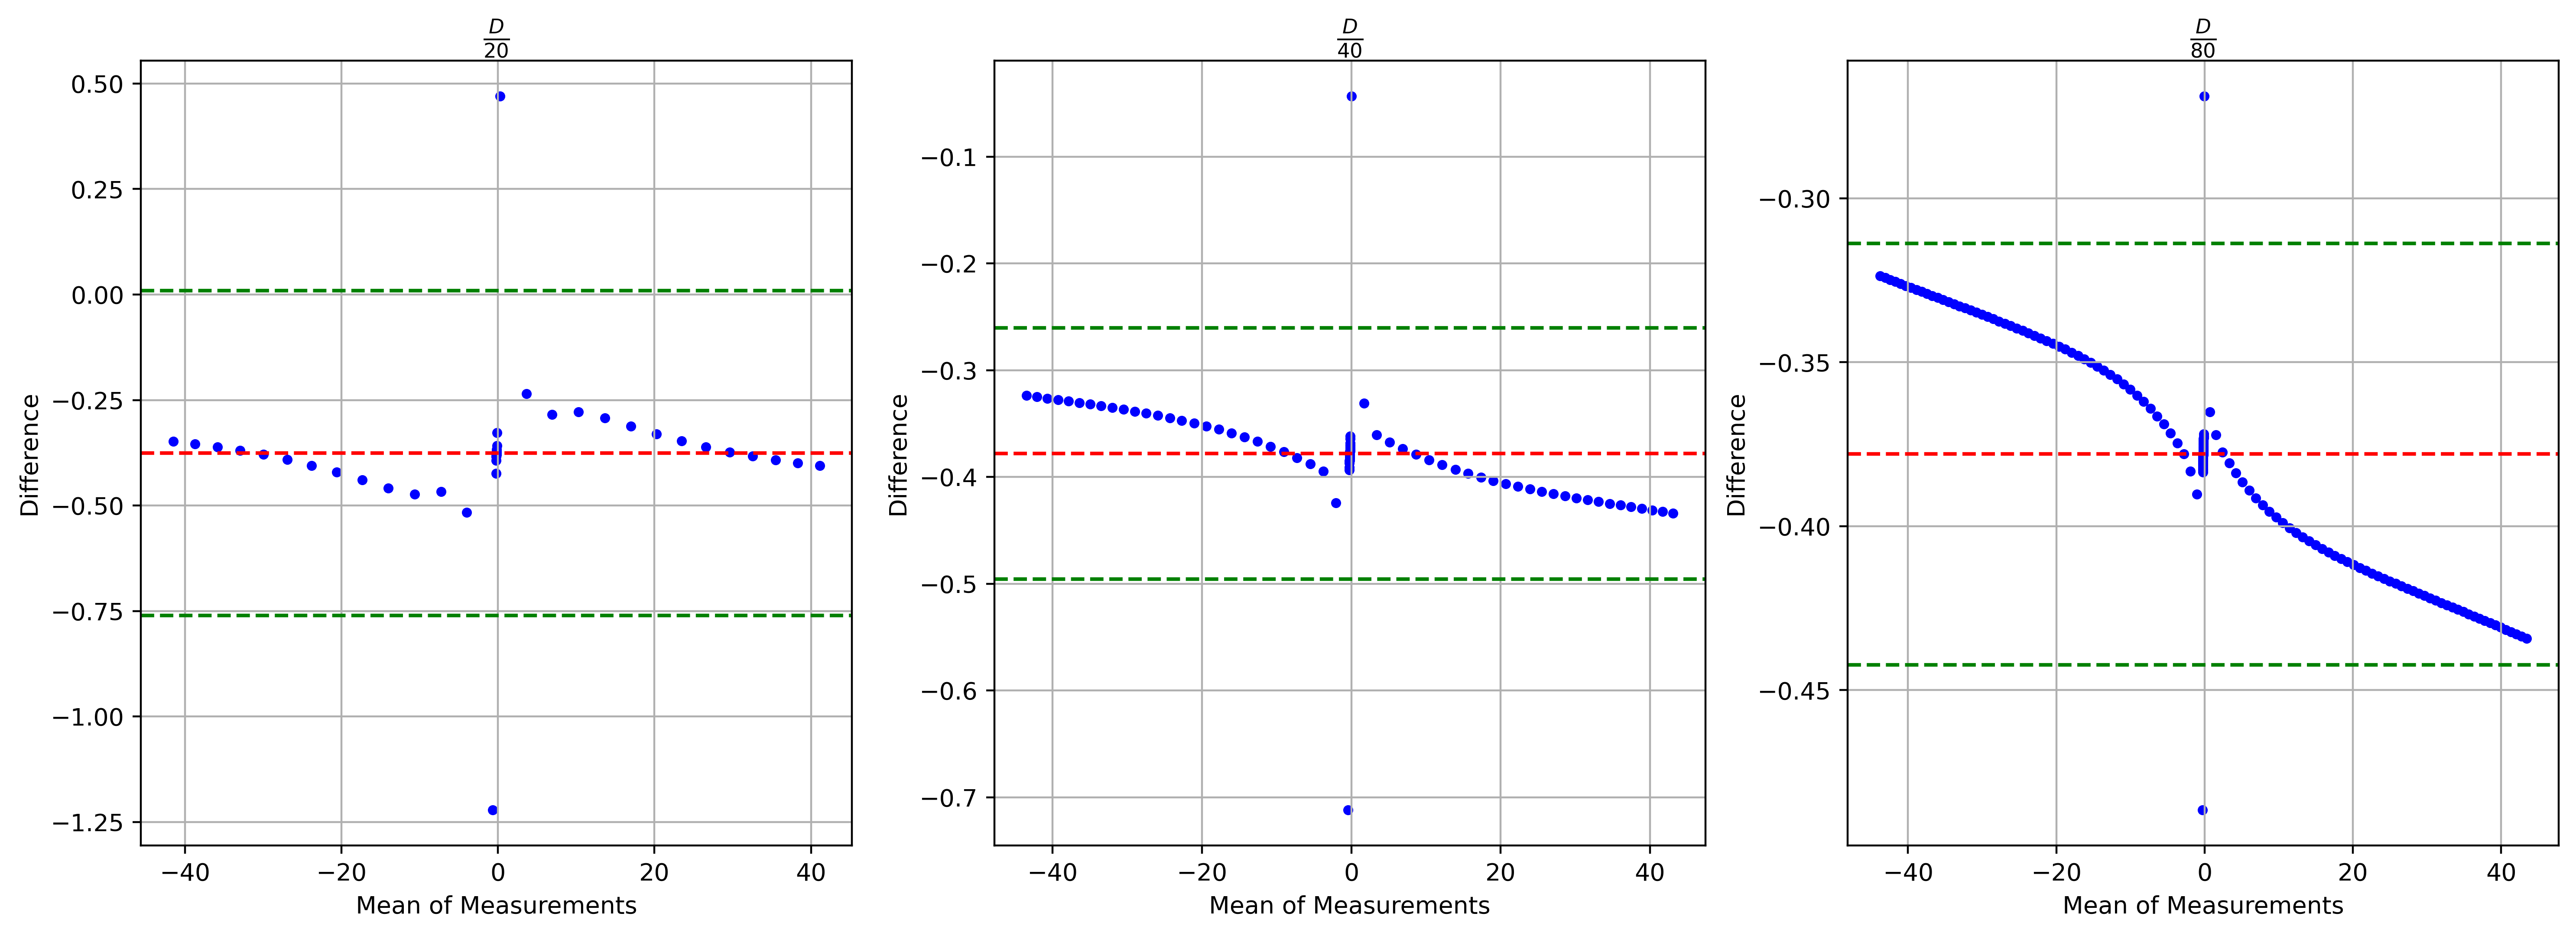

In [46]:
r=2.42859e-03
PressureBlandAltmanPlots(dframe_halfR,r/2, r/2, 'PressureBAPlots_halfR.png')

## Sureface Tension

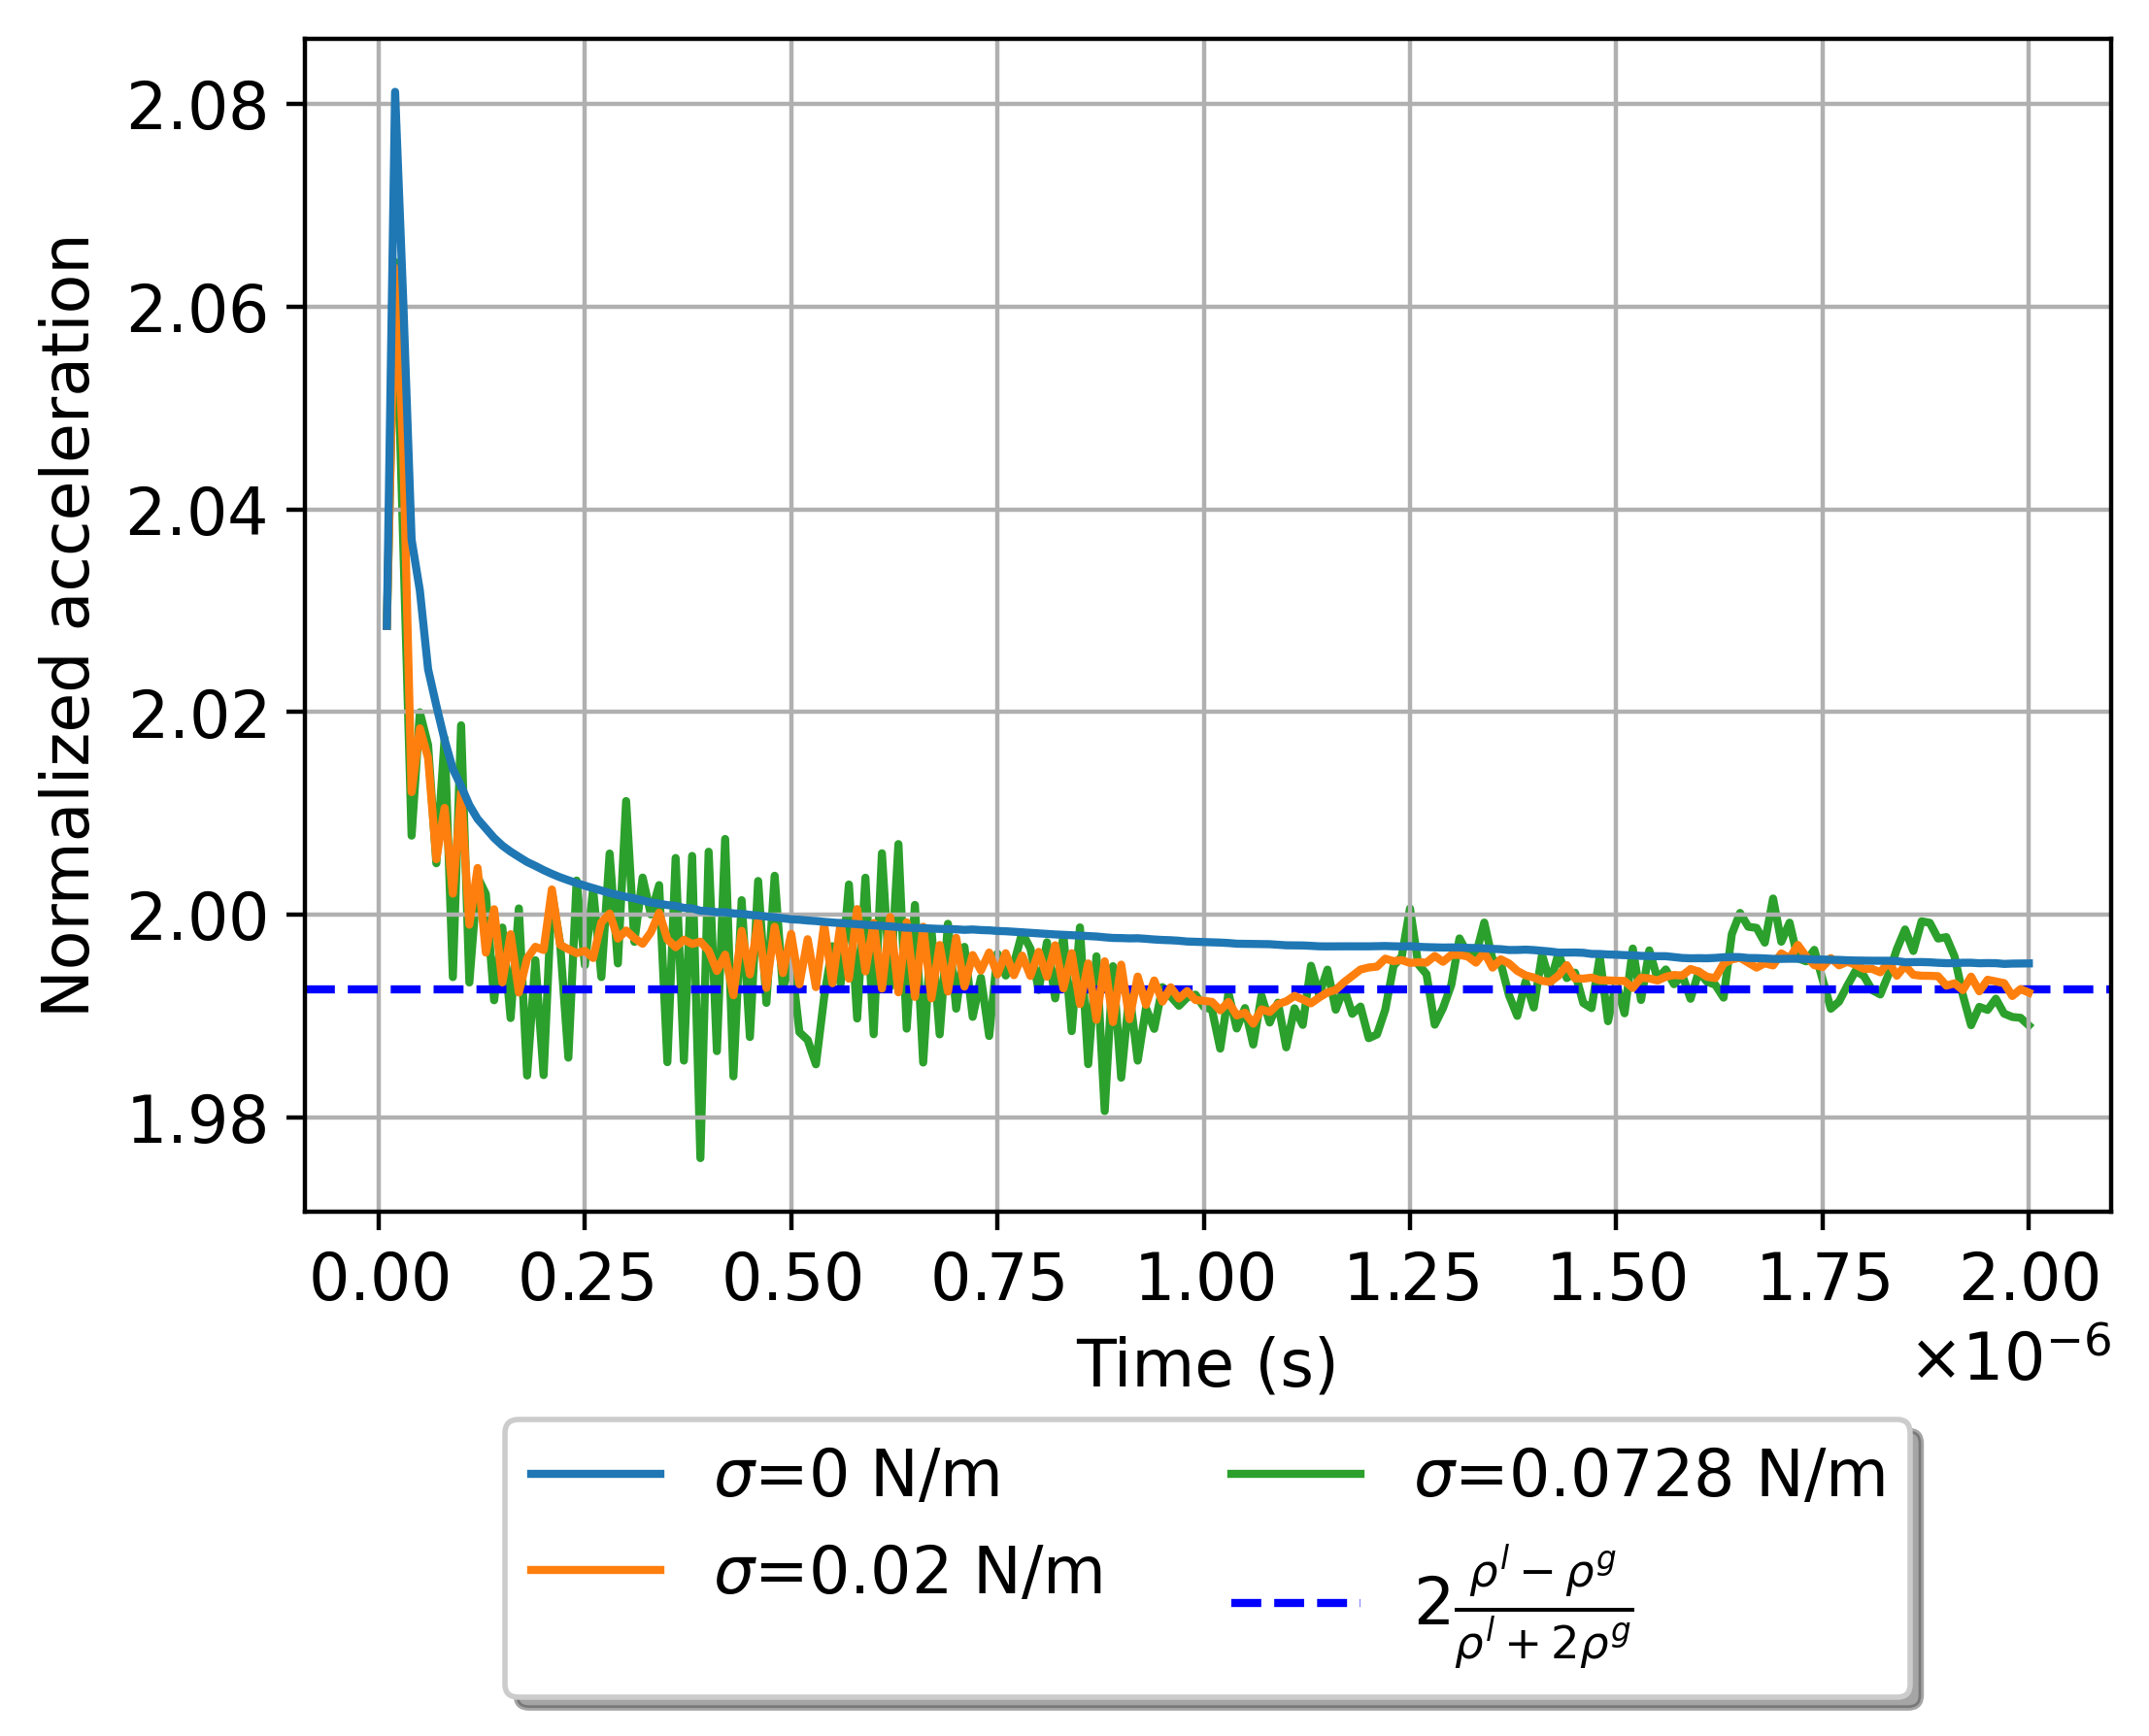

In [98]:
ST0 = pd.read_csv('isoAdv-MeshConvergenceTest_00002_templateCase/bubblepproc.dat', sep="\t", header=0)
ST1 = pd.read_csv('isoAdv-STEffect_00000_templateCase/bubblepproc.dat', sep="\t", header=0)
ST2 = pd.read_csv('isoAdv-STEffect_00001_templateCase/bubblepproc.dat', sep="\t", header=0)

accST0 = ST0["z-Velocity"].diff()/ST0["time"].diff()
accST1 = ST1["z-Velocity"].diff()/ST1["time"].diff()
accST2 = ST2["z-Velocity"].diff()/ST2["time"].diff()

rcParams["figure.dpi"] = 400
g = 9.80665
rhol= 997
rhog = 1.225

acc = 2*g*(rhol - rhog)/(rhol+2*rhog)


plt.plot(ST0["time"], accST0/g, label=r"$\sigma$=0 N/m", zorder=5)
plt.plot(ST1["time"], accST1/g, label=r"$\sigma$=0.02 N/m", zorder=3)
plt.plot(ST2["time"], accST2/g, label=r"$\sigma$=0.0728 N/m", zorder=1)
plt.axhline(y=acc/g, linestyle='--', color='blue', label=r"$2\frac{\rho^l-\rho^g}{\rho^l+2\rho^g}$")
#plt.xlim(0,1e-5) 
#plt.ylim(18)
plt.xlabel("Time (s)")
plt.ylabel("Normalized acceleration")
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)
plt.savefig('ST_comp.png', facecolor='w',dpi=400,bbox_inches='tight')
plt.show()

# wall distance effect

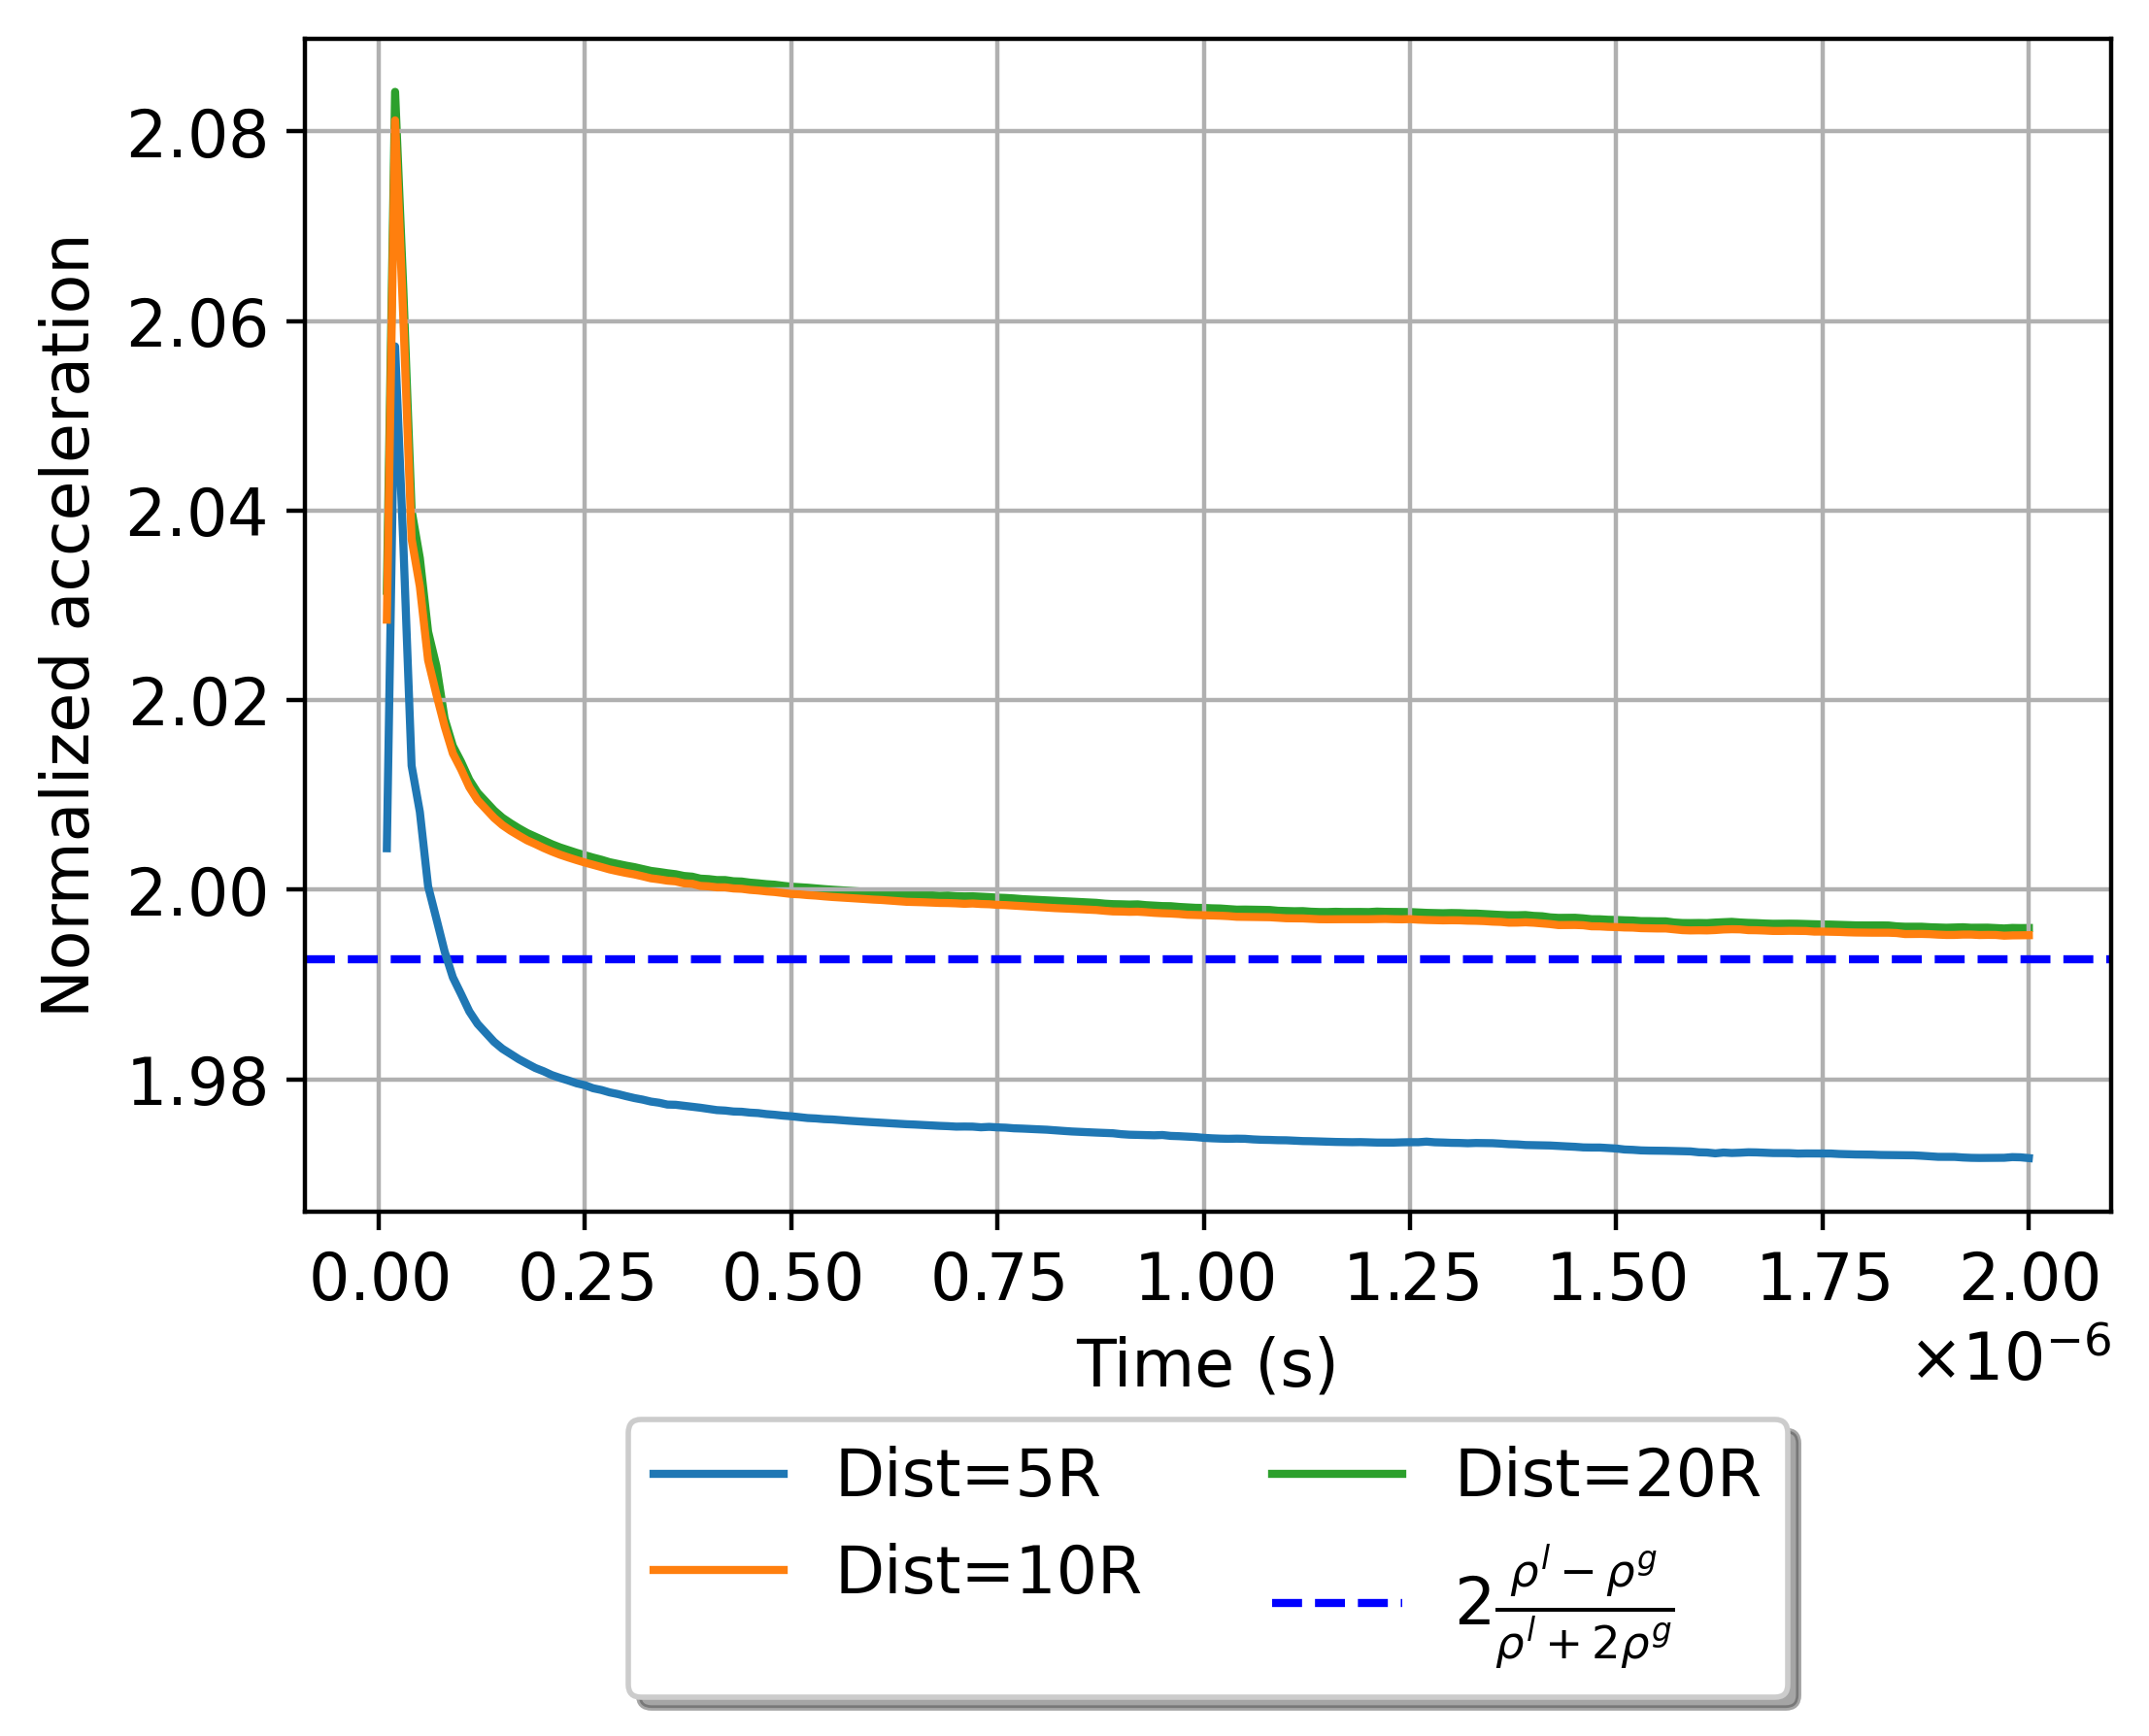

In [99]:
mid = pd.read_csv('isoAdv-MeshConvergenceTest_00002_templateCase/bubblepproc.dat', sep="\t", header=0)
smal = pd.read_csv('smallerRegion/bubblepproc.dat', sep="\t", header=0)
larg = pd.read_csv('largerRegion/bubblepproc.dat', sep="\t", header=0)

accmid = mid["z-Velocity"].diff()/mid["time"].diff()
accsmal = smal["z-Velocity"].diff()/smal["time"].diff()
acclarg = larg["z-Velocity"].diff()/larg["time"].diff()


rcParams["figure.dpi"] = 400
g = 9.80665
rhol= 997
rhog = 1.225


acc = 2*g*(rhol - rhog)/(rhol+2*rhog)

plt.plot(smal["time"], accsmal/g, label=r"Dist=5R", zorder=3)
plt.plot(mid["time"], accmid/g, label=r"Dist=10R", zorder=5)
plt.plot(larg["time"], acclarg/g, label=r"Dist=20R", zorder=1)
plt.axhline(y=acc/g, linestyle='--', color='blue', label=r"$2\frac{\rho^l-\rho^g}{\rho^l+2\rho^g}$")
#plt.xlim(0,1e-5) 
#plt.ylim(18)
plt.xlabel("Time (s)")
plt.ylabel("Normalized acceleration")
#plt.xlim(left=0, right=0.25e-6)
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)
plt.savefig('wallDistEffects.png', facecolor='w',dpi=400,bbox_inches='tight')
plt.show()

In [55]:
larg.loc[1, "z-Velocity"]

1.992258585580218e-07

# Viscosity

In [100]:
agglomerator = da.data_agglomerator("liquidViscs.parameter","bubblepproc.dat", 
                                     "isoAdv-liquidViscs_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoAdv-liquidViscs.csv")
dframe_liquidViscs = agglomerator.study_dataframe()
dframe_liquidViscs = dframe_liquidViscs.sort_index()

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[[0.00242859], [0], [0], [0], [0], [4], [15], [1e-07], [1e-12], [10], [10], [10], [10], [10], [10], [0], [1e-06], ['no'], [0.5], [1e-08], [5e-06], [1], [3], [200], [800], [-9.80665], [0.0], [0.0, 1e-06, 3e-06, 1e-05, 3e-05, 0.0001], [997], [1.5111e-05], [1.225], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['radius', 'z_centre', 'y_centre', 'x_centre', 'n_non_orth_correctors', 'n_correctors', 'n_outer_correctors', 'u_tol', 'p_tol', 'negzWIDTH', 'poszWIDTH', 'negyWIDTH', 'posyWIDTH', 'negxWIDTH', 'posxWIDTH', 'purge_write', 'write_inter

In [108]:
def plot_liquidViscs(dframe,fig_name):
    """Plots mesh convergence test."""
    rcParams["figure.dpi"] = 400
    g = 9.80665
    rhol= 997
    rhog = 1.225

    #acc = 2*g*(rhol - rhog)/(rhol+2*rhog)
    
    viscs = dframe.index.get_level_values("nu_ambient").unique()
    markers=['d','o','^','*','p','P']
    Viscs = []
    slopes = []
    
    
    for i, visc in enumerate(viscs):                
        df_subset = dframe.loc[visc]
        line, =plt.plot(df_subset["time"], df_subset["z-Velocity"].diff()/(df_subset["time"].diff()*g), marker=markers[i], markersize=5, markevery=5, 
             label=r"$\mu^l = %s\,mPa\cdot s$"%(visc*1e6))
        acc =  df_subset["z-Velocity"].diff()/(df_subset["time"].diff()*g)
        slope, intercept = np.polyfit(df_subset["time"].iloc[200:], acc.iloc[200:], 1)
        acc_fit = slope * df_subset["time"] + intercept
        #line1, =plt.plot(df_subset["time"], acc_fit, #marker=markers[i], markersize=5, markevery=5, 
         #    label=r"Slope: %s"%(slope))
        Viscs.append(visc)
        slopes.append(slope)
    plt.axhline(y=(1-0.001)/(0.5+0.001), linestyle='--', color='blue', label=r"$2\frac{\rho^l-\rho^g}{\rho^l+2\rho^g}$")
    plt.xlim(left=-0.1e-6,right=2e-6)
    plt.ylabel(r"Normalized acceleration")#"$L_{\infty}(\|\mathbf{v}_c^e - \mathbf{v}_c^n\|)$")
    plt.xlabel("Time (s)")
    plt.grid()
    plt.legend()

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)
    plt.savefig(fig_name, facecolor='w', dpi=400,bbox_inches='tight')
    return Viscs, slopes

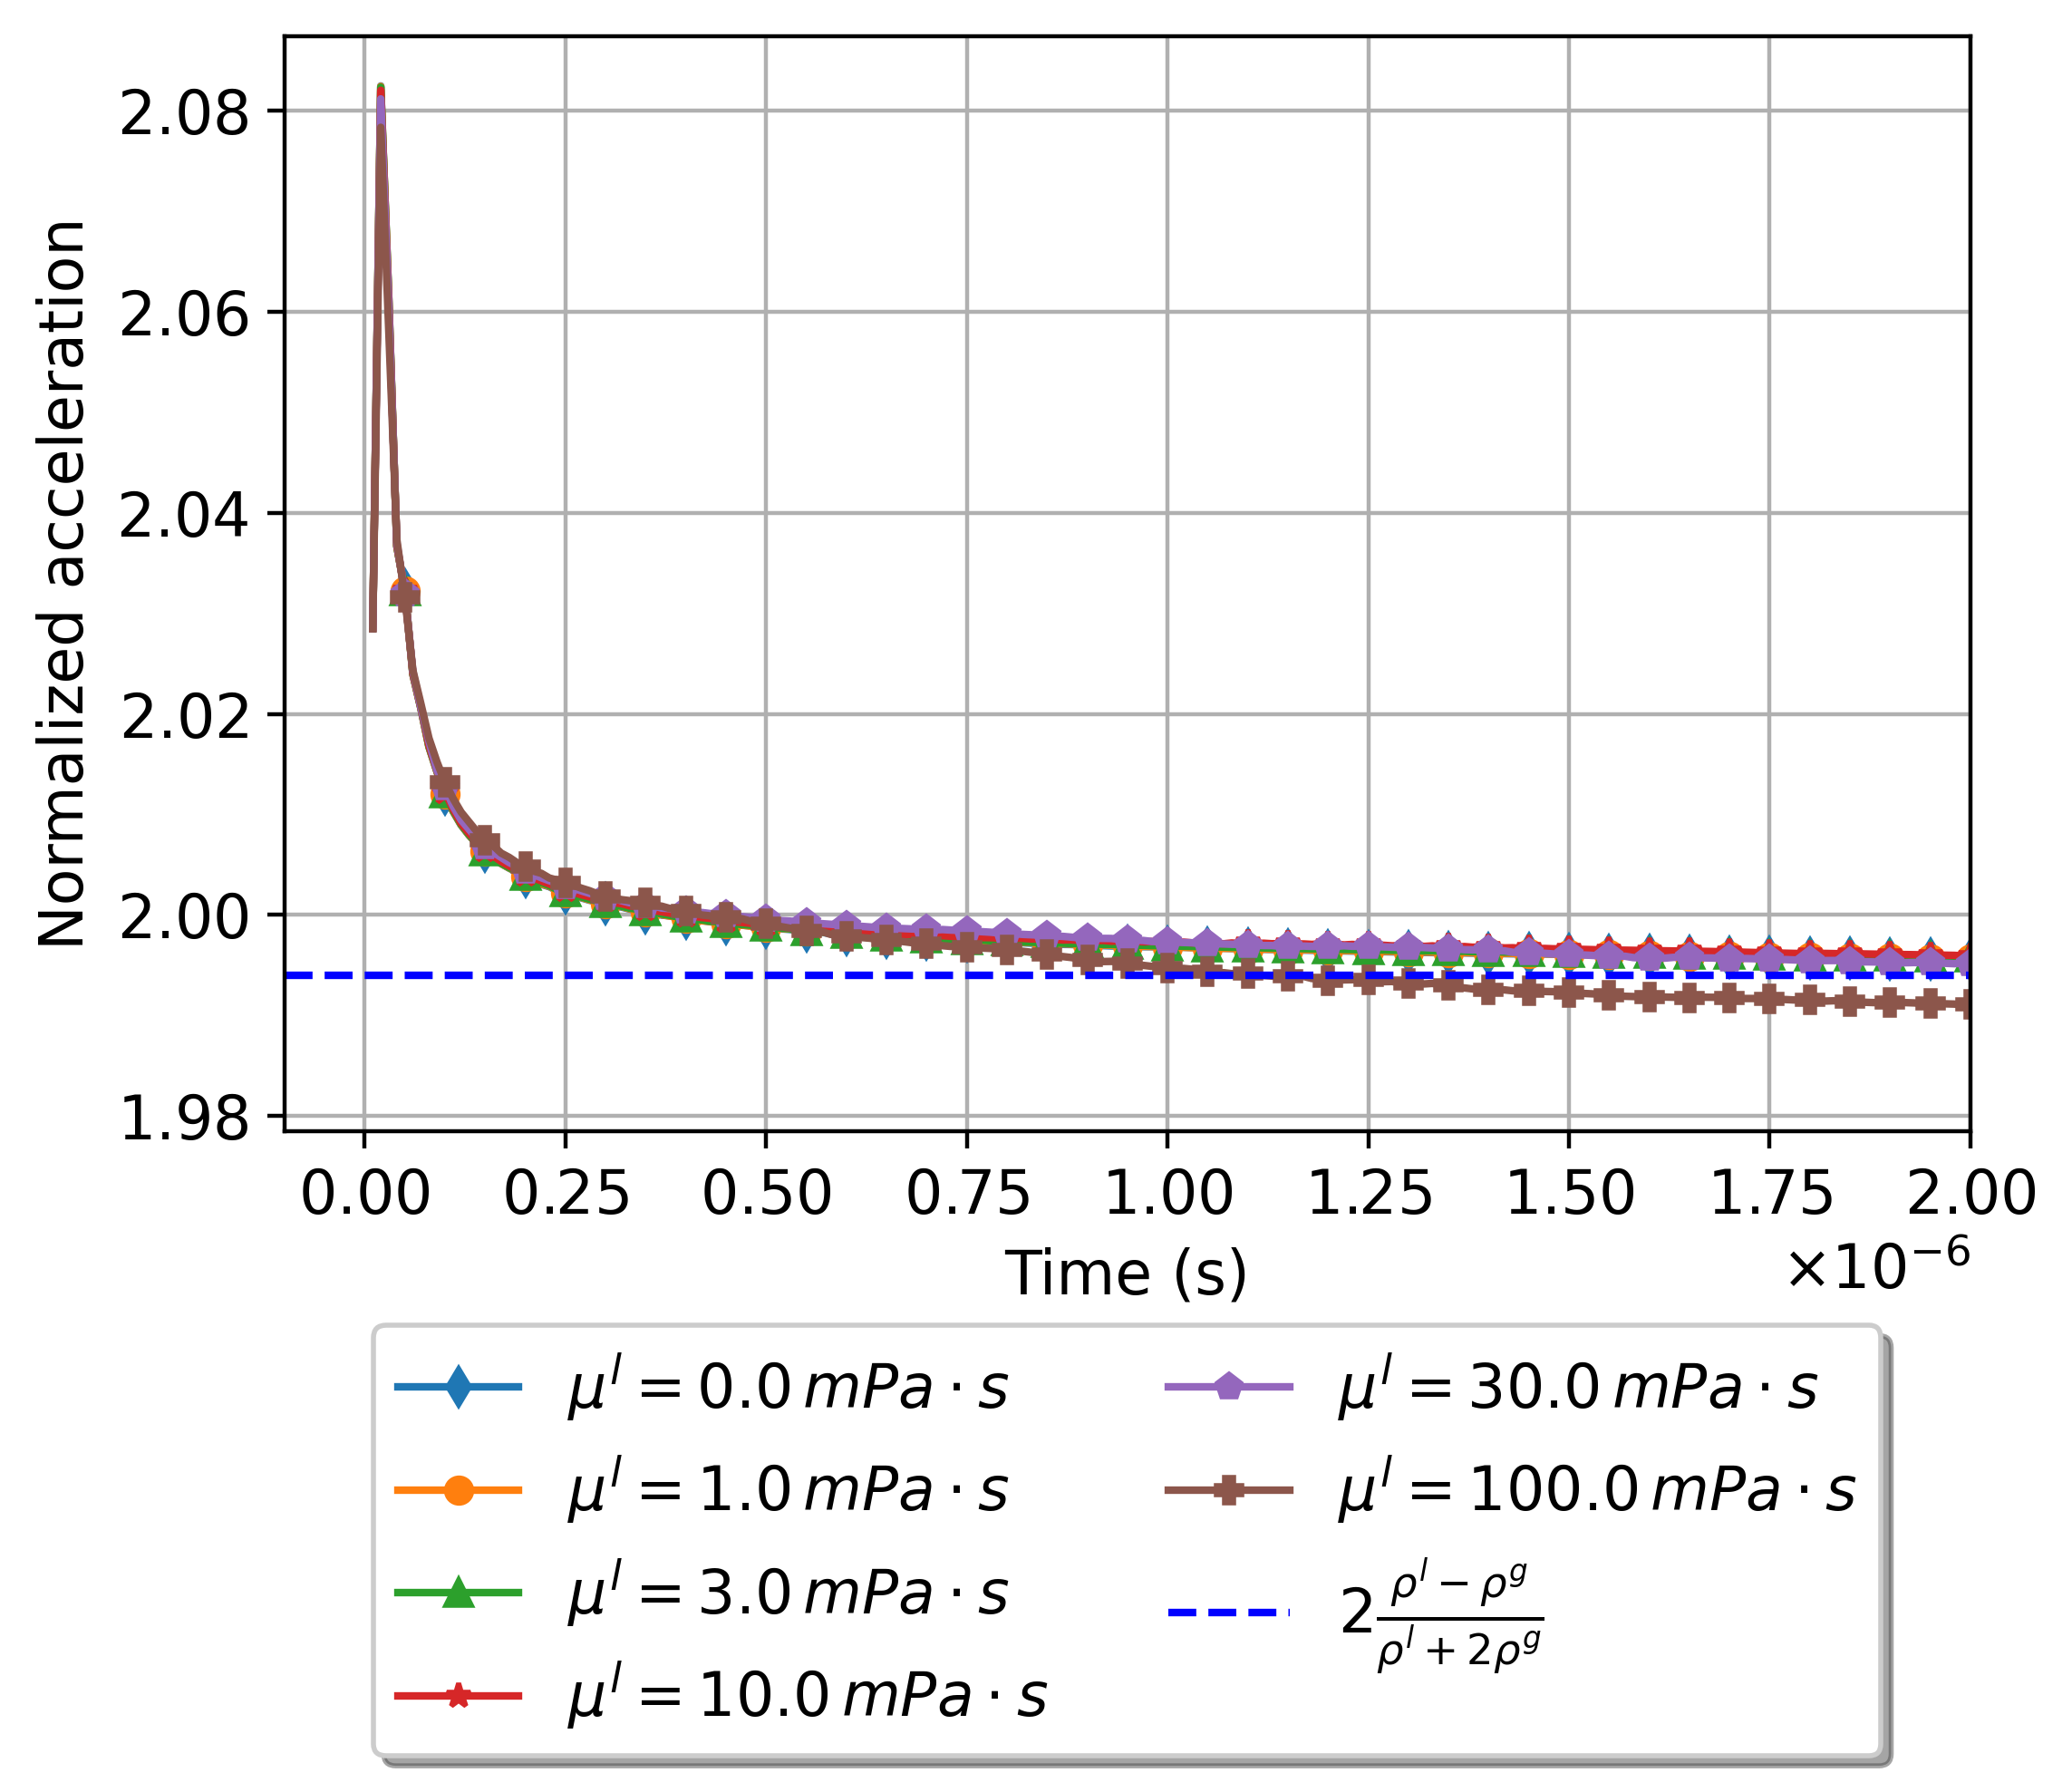

In [109]:
res=plot_liquidViscs(dframe_liquidViscs,'ViscsEffect.png')

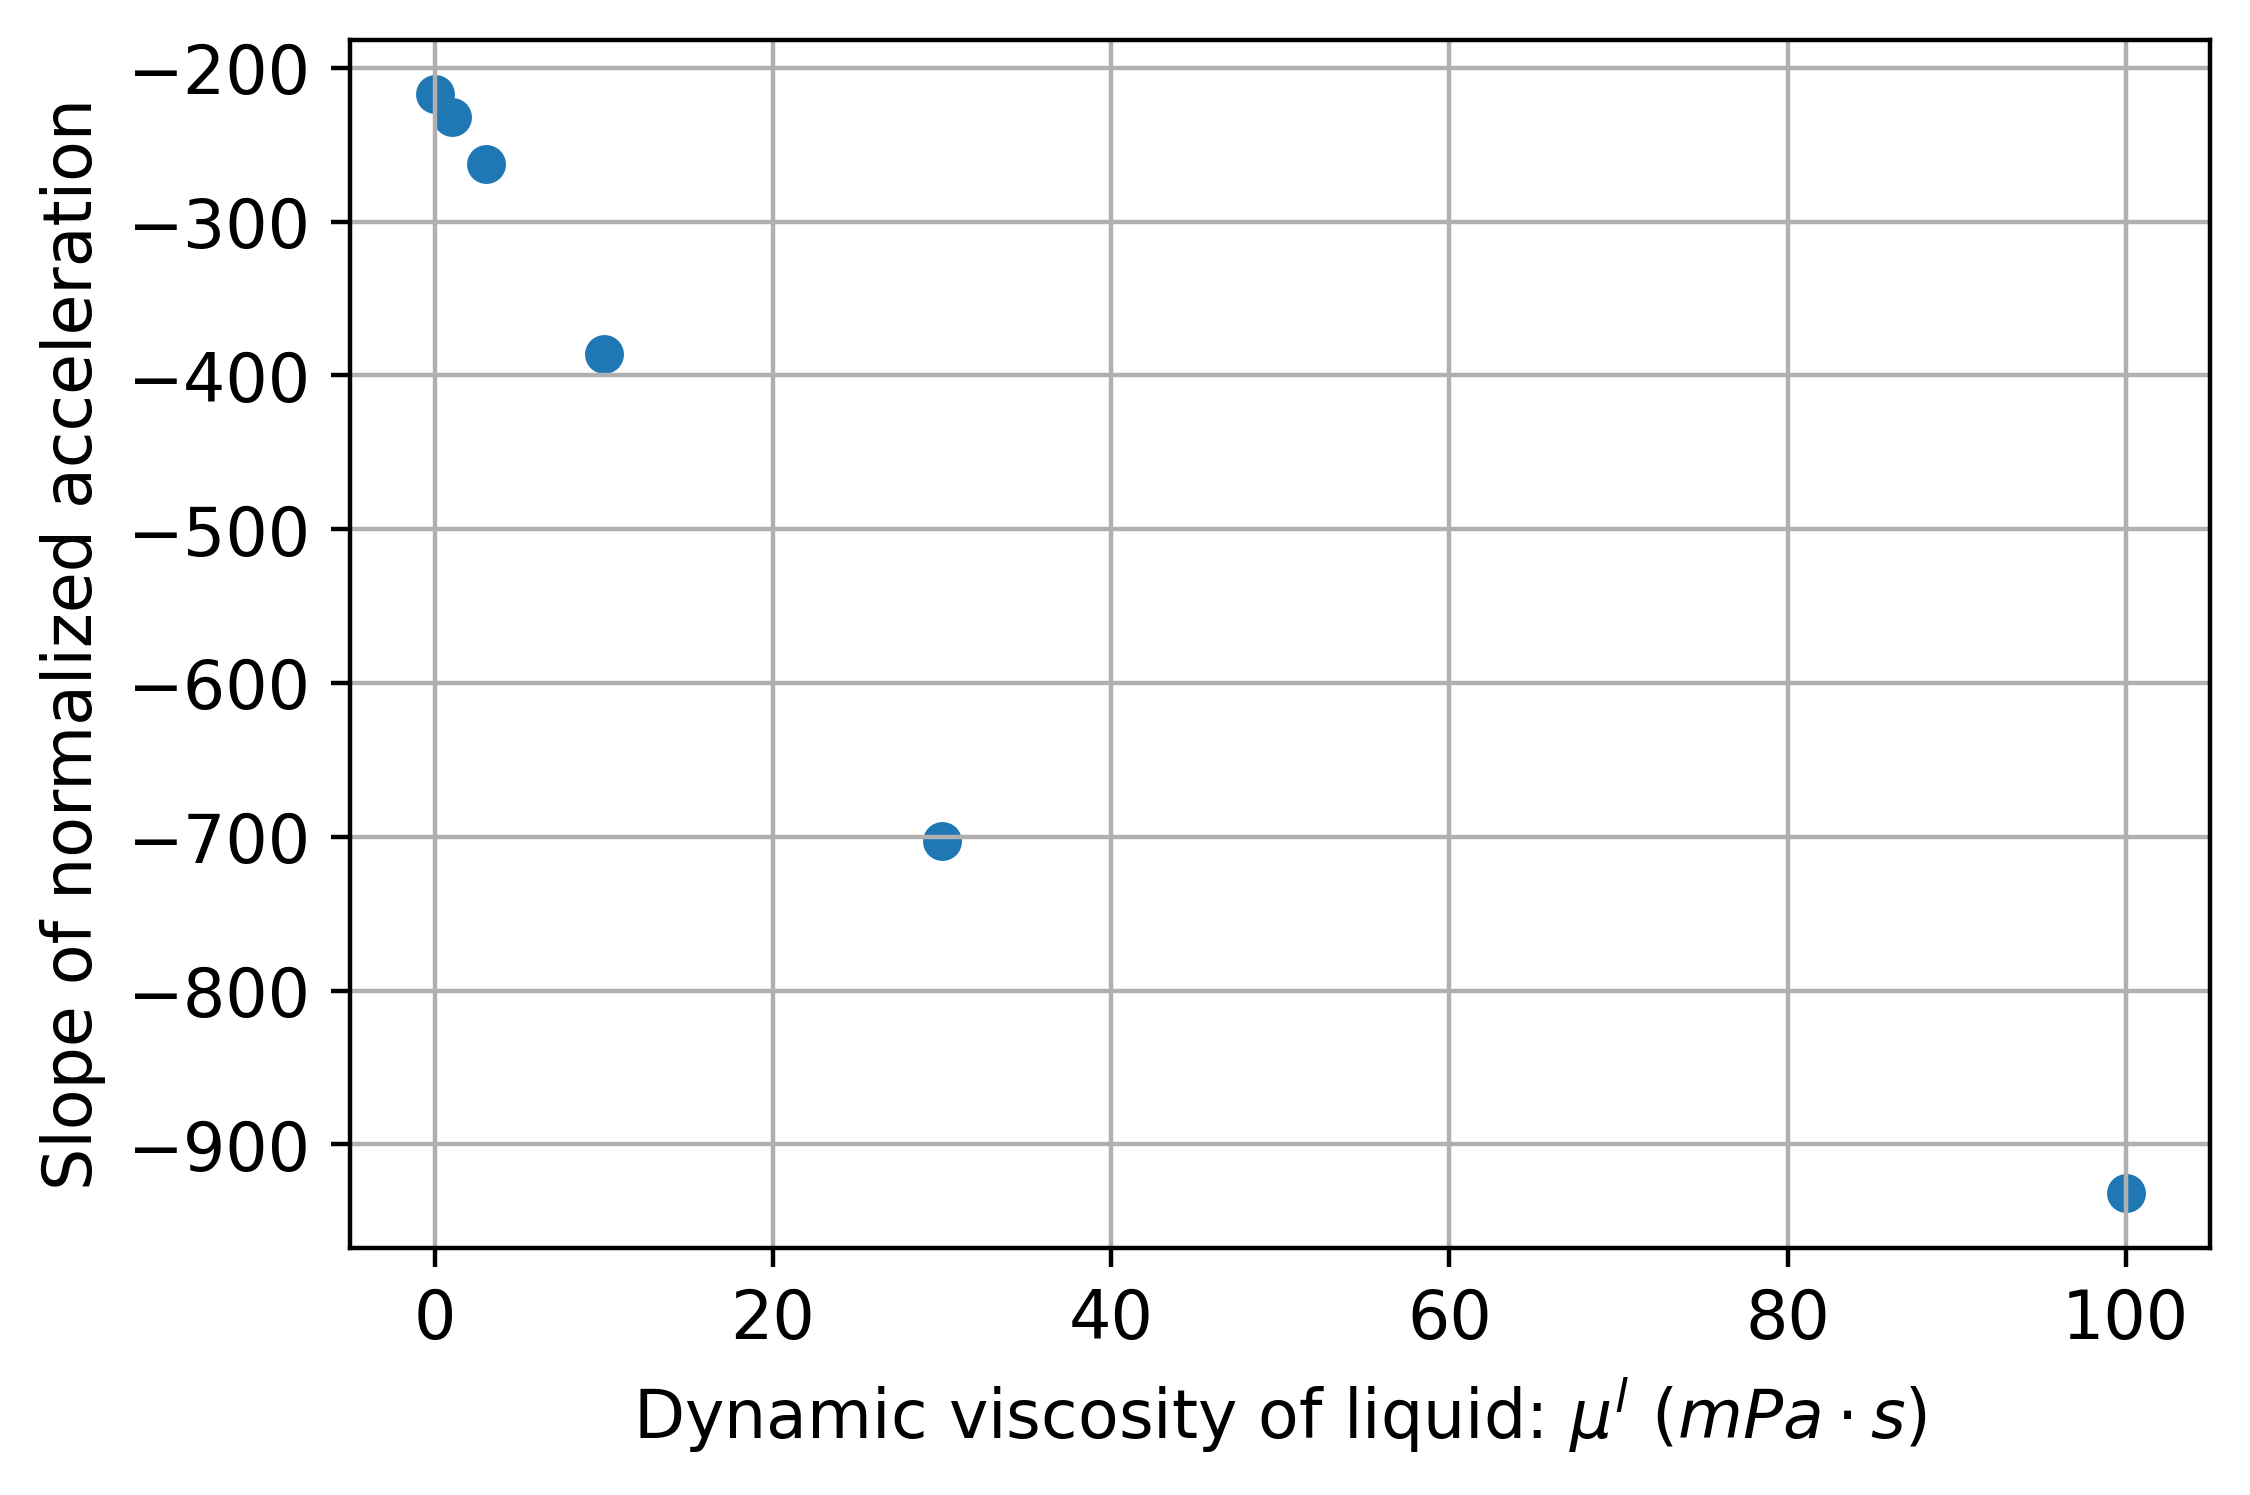

In [71]:
plt.scatter(np.array(res[0])*1e6, np.array(res[1]),zorder=1)
plt.ylabel(r"Slope of normalized acceleration")#"$L_{\infty}(\|\mathbf{v}_c^e - \mathbf{v}_c^n\|)$")
plt.xlabel(r"Dynamic viscosity of liquid: $\mu^l\ (mPa\cdot s)$")
plt.grid(zorder=0)
plt.savefig("slopeVSvisc.png", facecolor='w', dpi=400,bbox_inches='tight')

In [16]:
number = 0
formatted_number = "{:.1e}".format(number)
base, exponent = formatted_number.split("e")
latex_number = r"${} \times 10^{{{}}}$".format(base, int(exponent))
latex_number

'$0.0 \\times 10^{0}$'

# Density ratios

In [5]:
agglomerator = da.data_agglomerator("densityRatios.parameter","bubblepproc.dat", 
                                     "isoAdv-densityRatios_00000_templateCaseLambda")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoAdv-densityRatios.csv")
dframe_densityRatios = agglomerator.study_dataframe()
dframe_densityRatios = dframe_densityRatios.sort_index()

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[[0.00242859], [0], [0], [0], [0], [4], [15], [1e-07], [1e-12], [10], [10], [10], [10], [10], [10], [0], [1e-06], ['no'], [0.5], [1e-08], [5e-06], [1], [3], [200], [800], [-9.80665], [0.0], [3.009e-05], [997], [1.5111e-05], [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 1.0, 2.0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['radius', 'z_centre', 'y_centre', 'x_centre', 'n_non_orth_correctors', 'n_correctors', 'n_outer_correctors', 'u_tol', 'p_tol', 'negzWIDTH', 'poszWIDTH', 'negyWIDTH', 'posyWIDTH', 'negxWIDTH', 'posxWIDTH', 'purge_wri

In [49]:
def plot_densityRatios(dframe, fig_name ,hline=False):
    """Plots mesh convergence test."""
    rcParams["figure.dpi"] = 300
    g = 9.80665
    rhol= 997
    rhog = 1.225

    #acc = 2*g*(rhol - rhog)/(rhol+2*rhog)
    
    ratios = dframe.index.get_level_values("gl_ratios").unique()
    
    
    for i, ratio in enumerate(ratios):                
        df_subset = dframe.loc[ratio]
        line, =plt.plot(df_subset["time"], df_subset["z-Velocity"].diff()/(df_subset["time"].diff()*g), 
             label=r"$\lambda_{%s}= 10 ^{%s}$" % (i+1, (int(np.log10(ratio)))))
        if (hline):
            plt.axhline(y=(1-ratio)/(0.5+ratio), linestyle='--', color=line.get_color(), label="$\\frac{{1-\\lambda_{%d}}}{{0.5+\\lambda_{%d}}}$" % (i+1, i+1))#f"$\frac{{1-\lambda_{%d}}}{{0.5+\lambda_{%d}}}$ % (i+1, i+1)") #r"$\frac{1-10^{%s}}{0.5+10^{%s}}$" % ((int(np.log10(ratio))),(int(np.log10(ratio)))))
    plt.xlim(right=2e-6)
    plt.ylabel(r"Normalized acceleration")#"$L_{\infty}(\|\mathbf{v}_c^e - \mathbf{v}_c^n\|)$")
    plt.xlabel("Time in s")
    plt.grid()
    plt.legend()

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)
    plt.savefig(fig_name, facecolor='w', dpi=400,bbox_inches='tight')

In [50]:
dframe1= dframe_densityRatios.loc[(dframe_densityRatios.index.get_level_values('gl_ratios') == 0.001) | (dframe_densityRatios.index.get_level_values('gl_ratios') == 0.1)]
dframe2= dframe_densityRatios.loc[(dframe_densityRatios.index.get_level_values('gl_ratios') <= 0.1)]

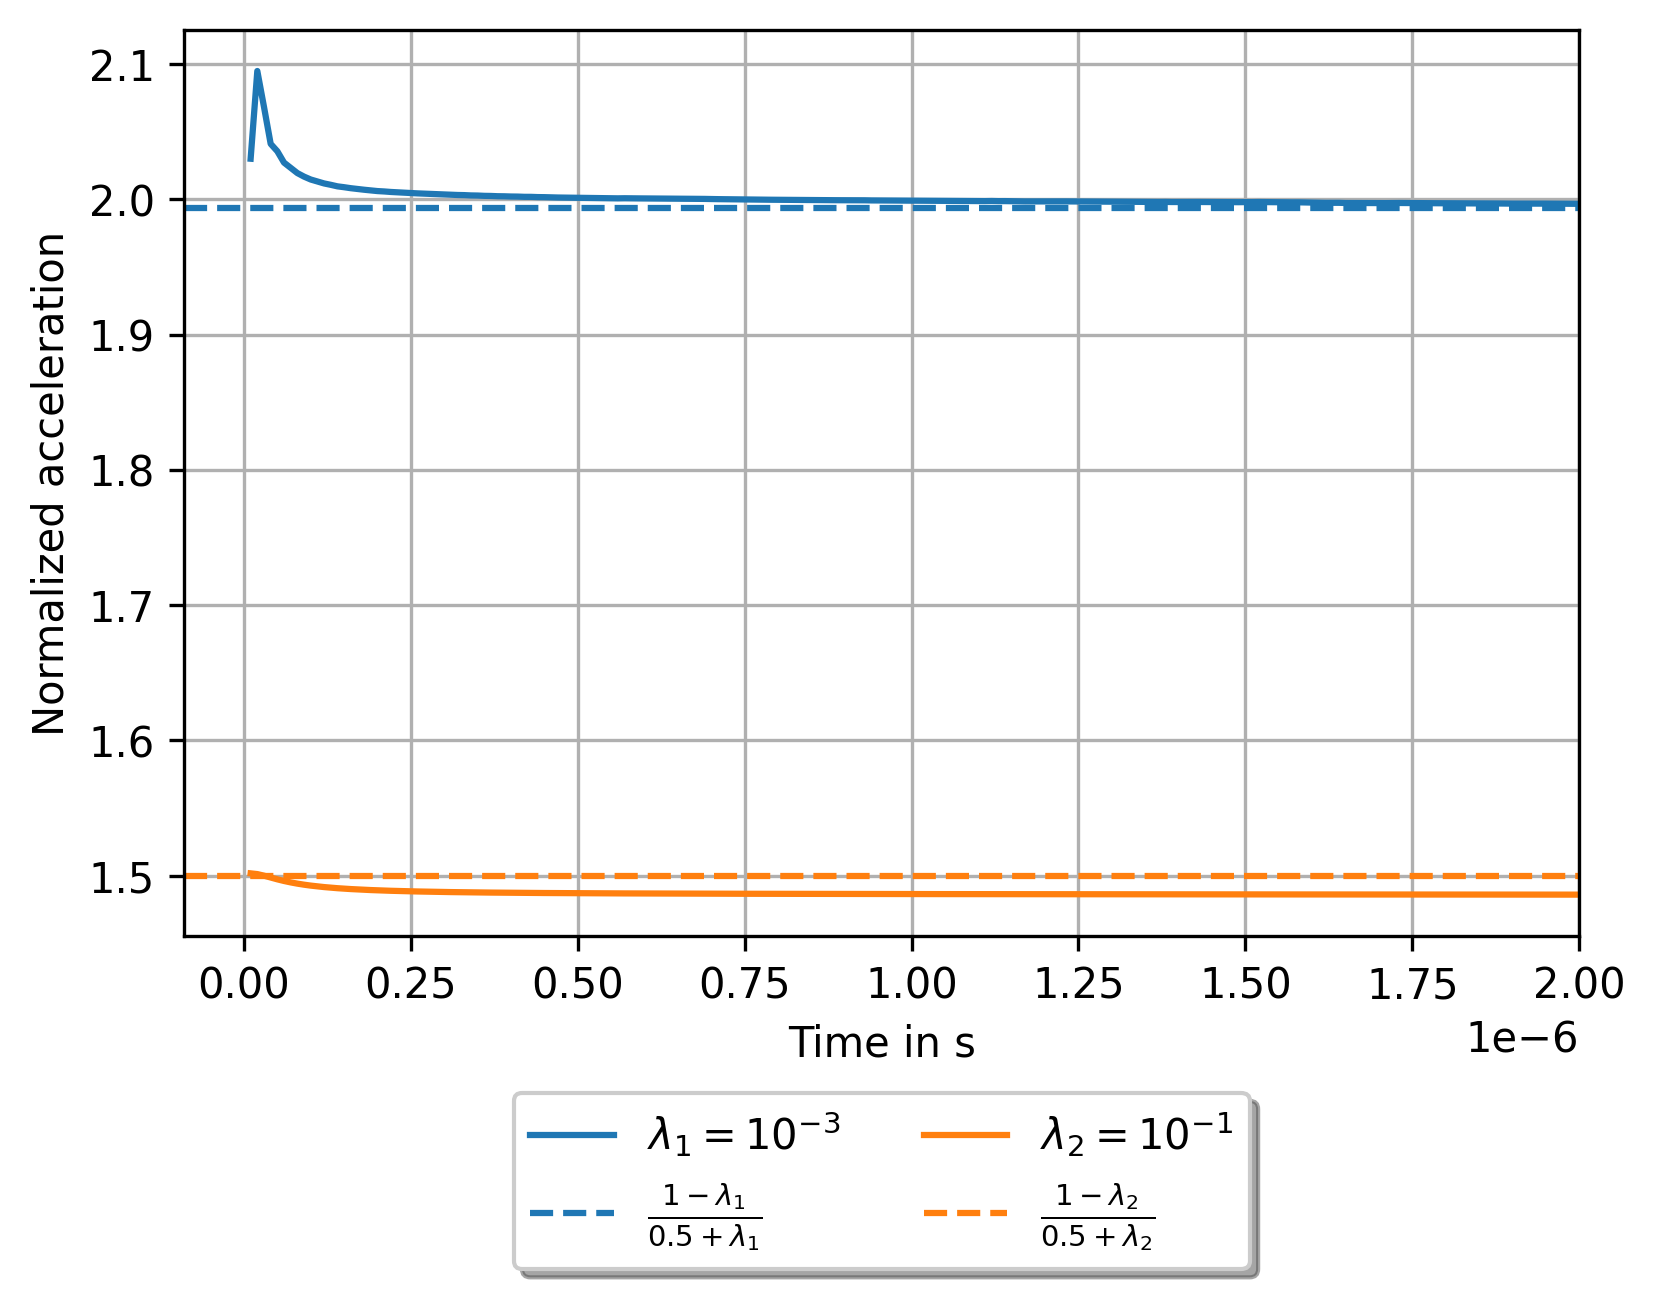

In [51]:
plot_densityRatios(dframe1, '2lambdas.png', True)

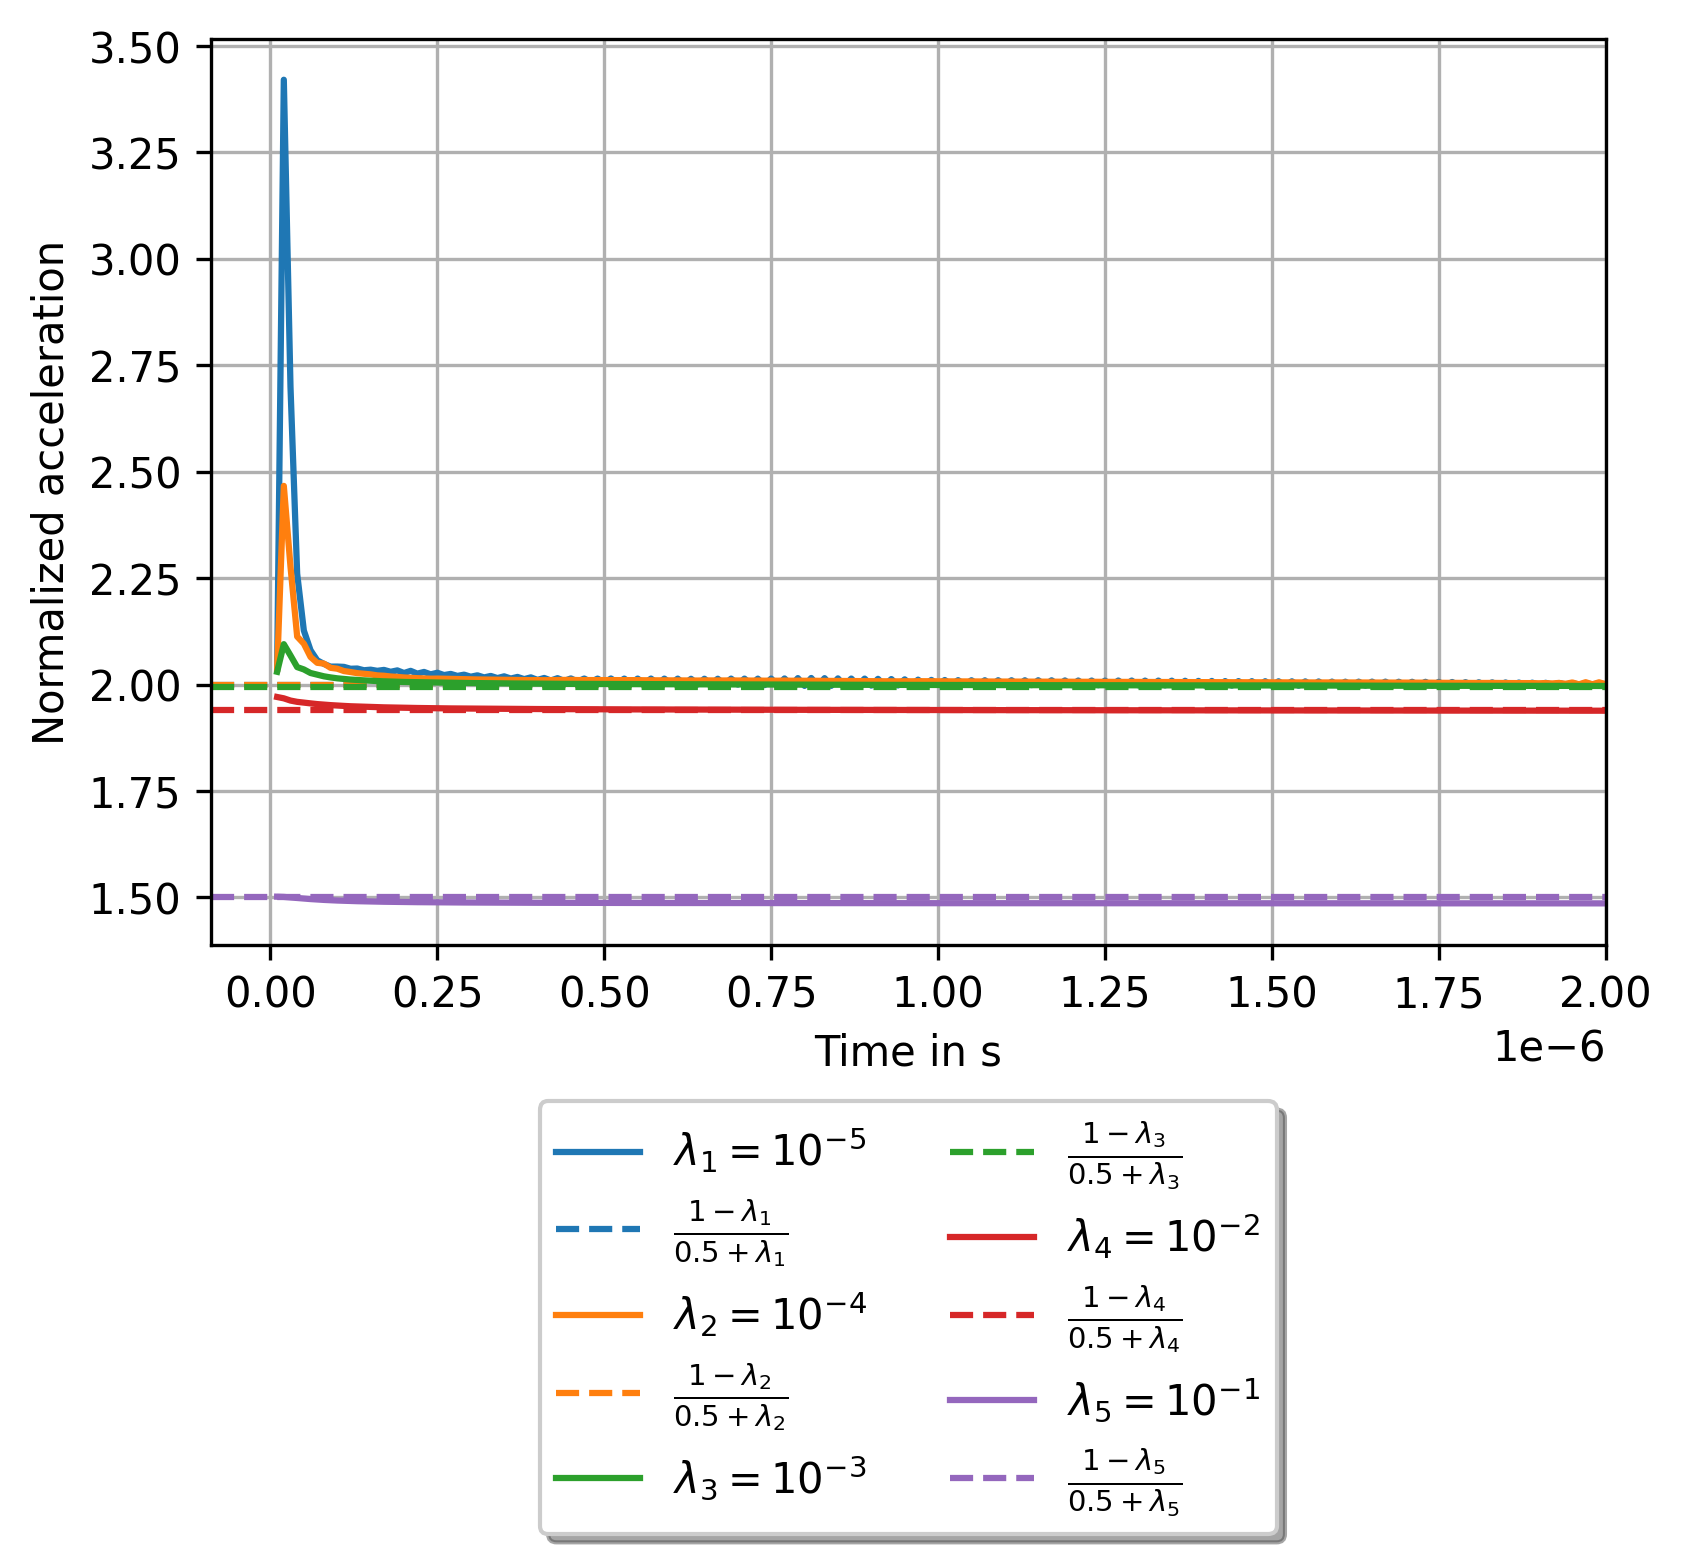

In [52]:
plot_densityRatios(dframe2,'fullLambdas.png', True)

In [53]:
dframe3= dframe_densityRatios.loc[(dframe_densityRatios.index.get_level_values('gl_ratios') > 0.1)]

def plot_higherDensityRatios(dframe, fig_name ,hline=False):
    """Plots mesh convergence test."""
    rcParams["figure.dpi"] = 300
    g = 9.80665
    rhol= 997
    rhog = 1.225

    #acc = 2*g*(rhol - rhog)/(rhol+2*rhog)
    
    ratios = dframe.index.get_level_values("gl_ratios").unique()
    
    
    for i, ratio in enumerate(ratios):                
        df_subset = dframe.loc[ratio]
        line, =plt.plot(df_subset["time"], df_subset["z-Velocity"].diff()/(df_subset["time"].diff()*g), 
             label=r"$\lambda_{%s}= %s$" % (i+1, ratio))
        if (hline):
            plt.axhline(y=(1-ratio)/(0.5+ratio), linestyle='--', color=line.get_color(), label="$\\frac{{1-\\lambda_{%d}}}{{0.5+\\lambda_{%d}}}$" % (i+1, i+1))#f"$\frac{{1-\lambda_{%d}}}{{0.5+\lambda_{%d}}}$ % (i+1, i+1)") #r"$\frac{1-10^{%s}}{0.5+10^{%s}}$" % ((int(np.log10(ratio))),(int(np.log10(ratio)))))
    plt.xlim(right=2e-6)
    plt.ylabel(r"Normalized acceleration")#"$L_{\infty}(\|\mathbf{v}_c^e - \mathbf{v}_c^n\|)$")
    plt.xlabel("Time in s")
    plt.grid()
    plt.legend()

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)
    plt.savefig(fig_name, facecolor='w', dpi=400,bbox_inches='tight')

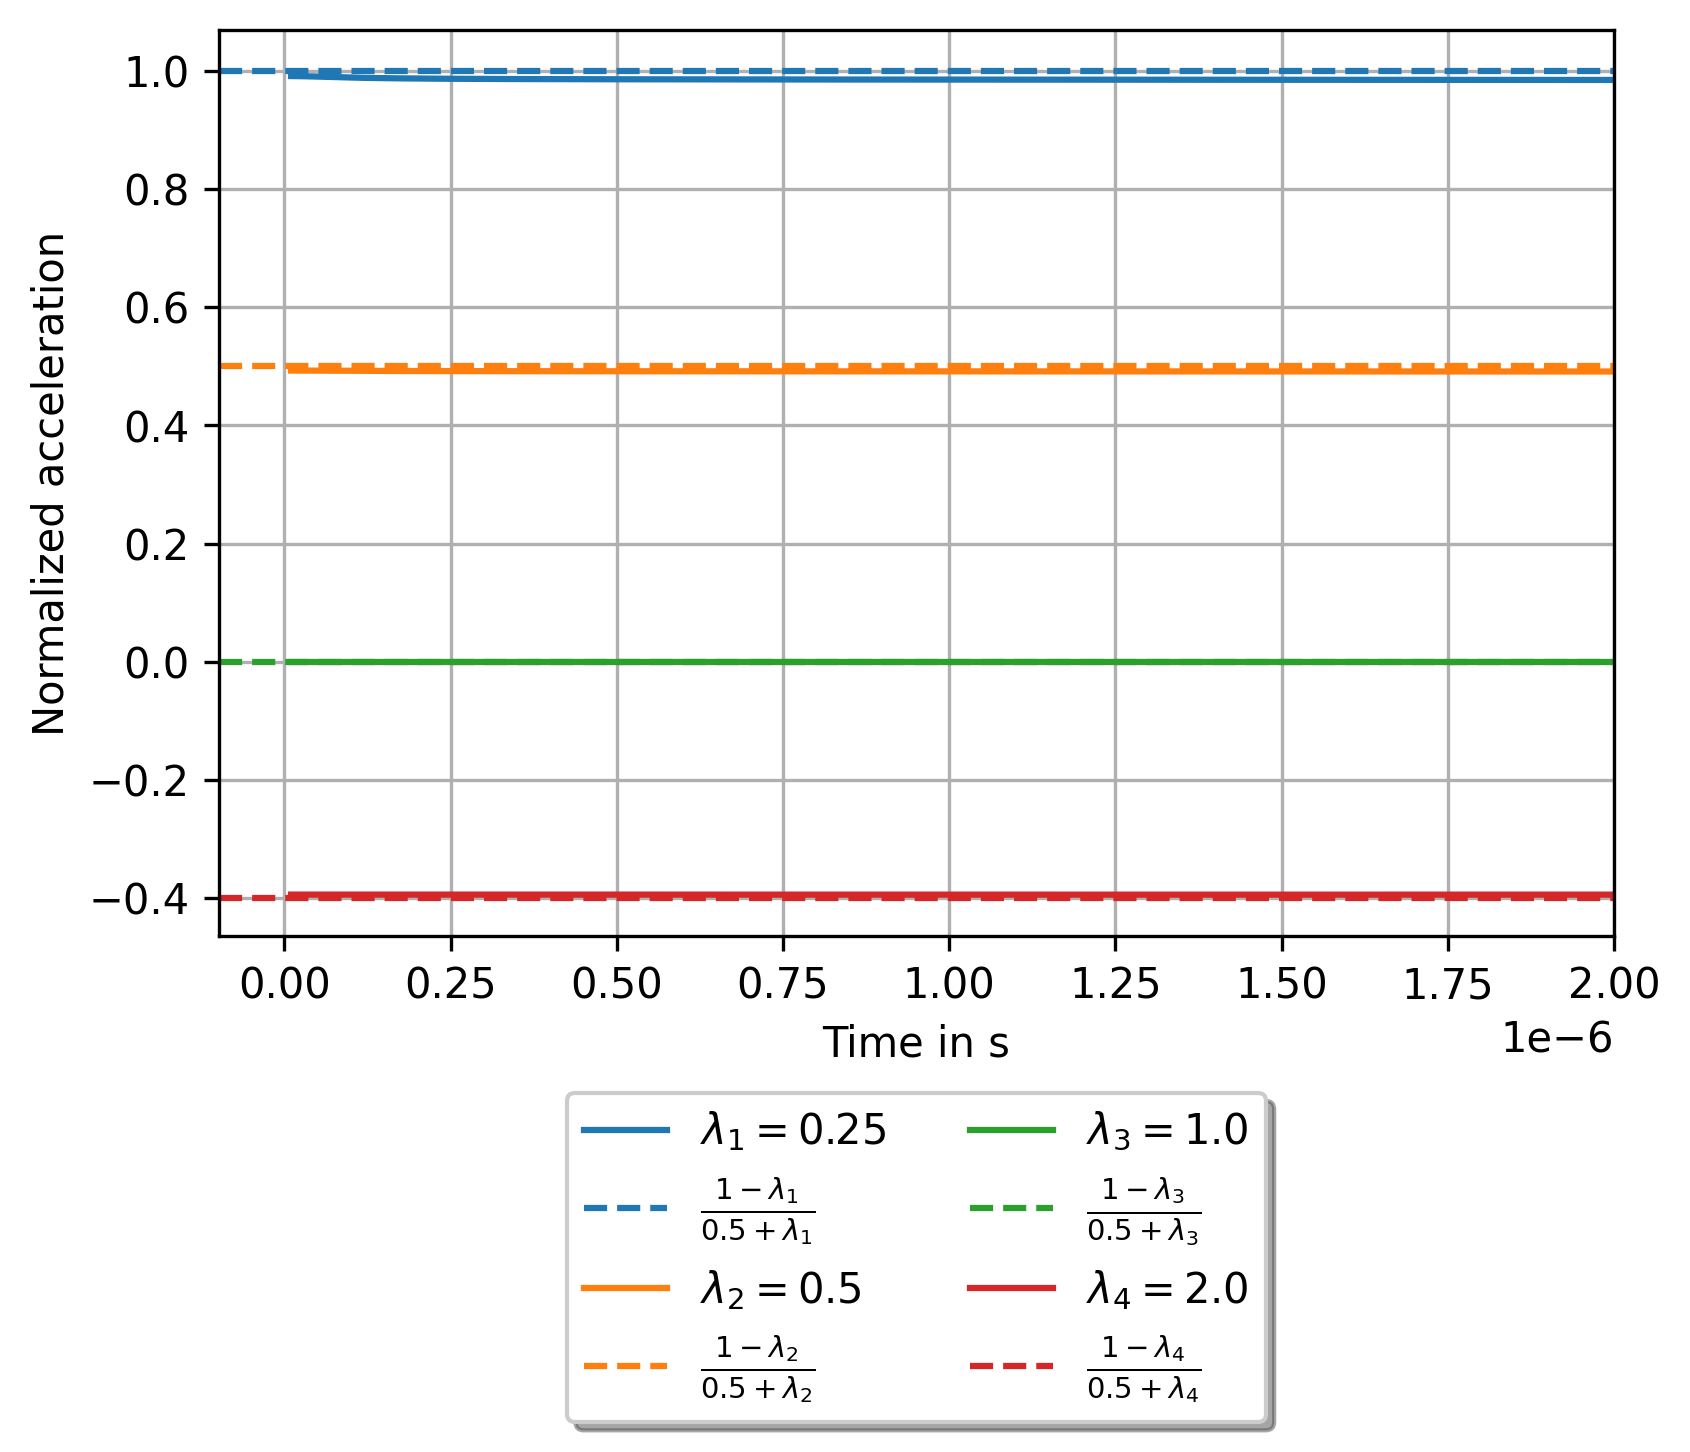

In [54]:
plot_higherDensityRatios(dframe3, 'higherDensityRatios.png' ,True)

In [1]:
def plot_scatteredDensityRatios(dframe, fig_name):
    """Plots mesh convergence test."""
    rcParams["figure.dpi"] = 300
    g = 9.80665
    rhol= 997
    rhog = 1.225

    #acc = 2*g*(rhol - rhog)/(rhol+2*rhog)
    
    ratios = dframe.index.get_level_values("gl_ratios").unique()
    accE_06=[]
    lambda_values = np.linspace(5e-6,2.5,1000) #pressureNum["Points:2"].values
    #y_values = piecewise_function(0.0001215, 0.0001215, z_values)
    acc_values = (1-lambda_values)/(0.5+lambda_values)
    
    for ratio in ratios:                
        df_subset = dframe.loc[ratio]
        normAcc = df_subset["z-Velocity"].diff()/(df_subset["time"].diff()*g)
        accE_06.append(normAcc.iloc[101])
    plt.scatter(ratios, accE_06, label="Numerical results")
    plt.plot(lambda_values, acc_values, label=r"$\frac{1-\lambda}{0.5+\lambda}$")
    #plt.xlim(right=2e-6)
    plt.ylabel(r"Normalized acceleration")#"$L_{\infty}(\|\mathbf{v}_c^e - \mathbf{v}_c^n\|)$")
    plt.xlabel(r"Density ratio: $\lambda=\frac{\rho^g}{\rho^l}$")
    plt.xscale('log')
    #plt.yscale('log')
    plt.grid(zorder=0)
    plt.rc('axes', axisbelow=True)
    # plt.legend()

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.19),
          fancybox=True, shadow=True, ncol=2)
    plt.savefig(fig_name, facecolor='w', dpi=400,bbox_inches='tight')

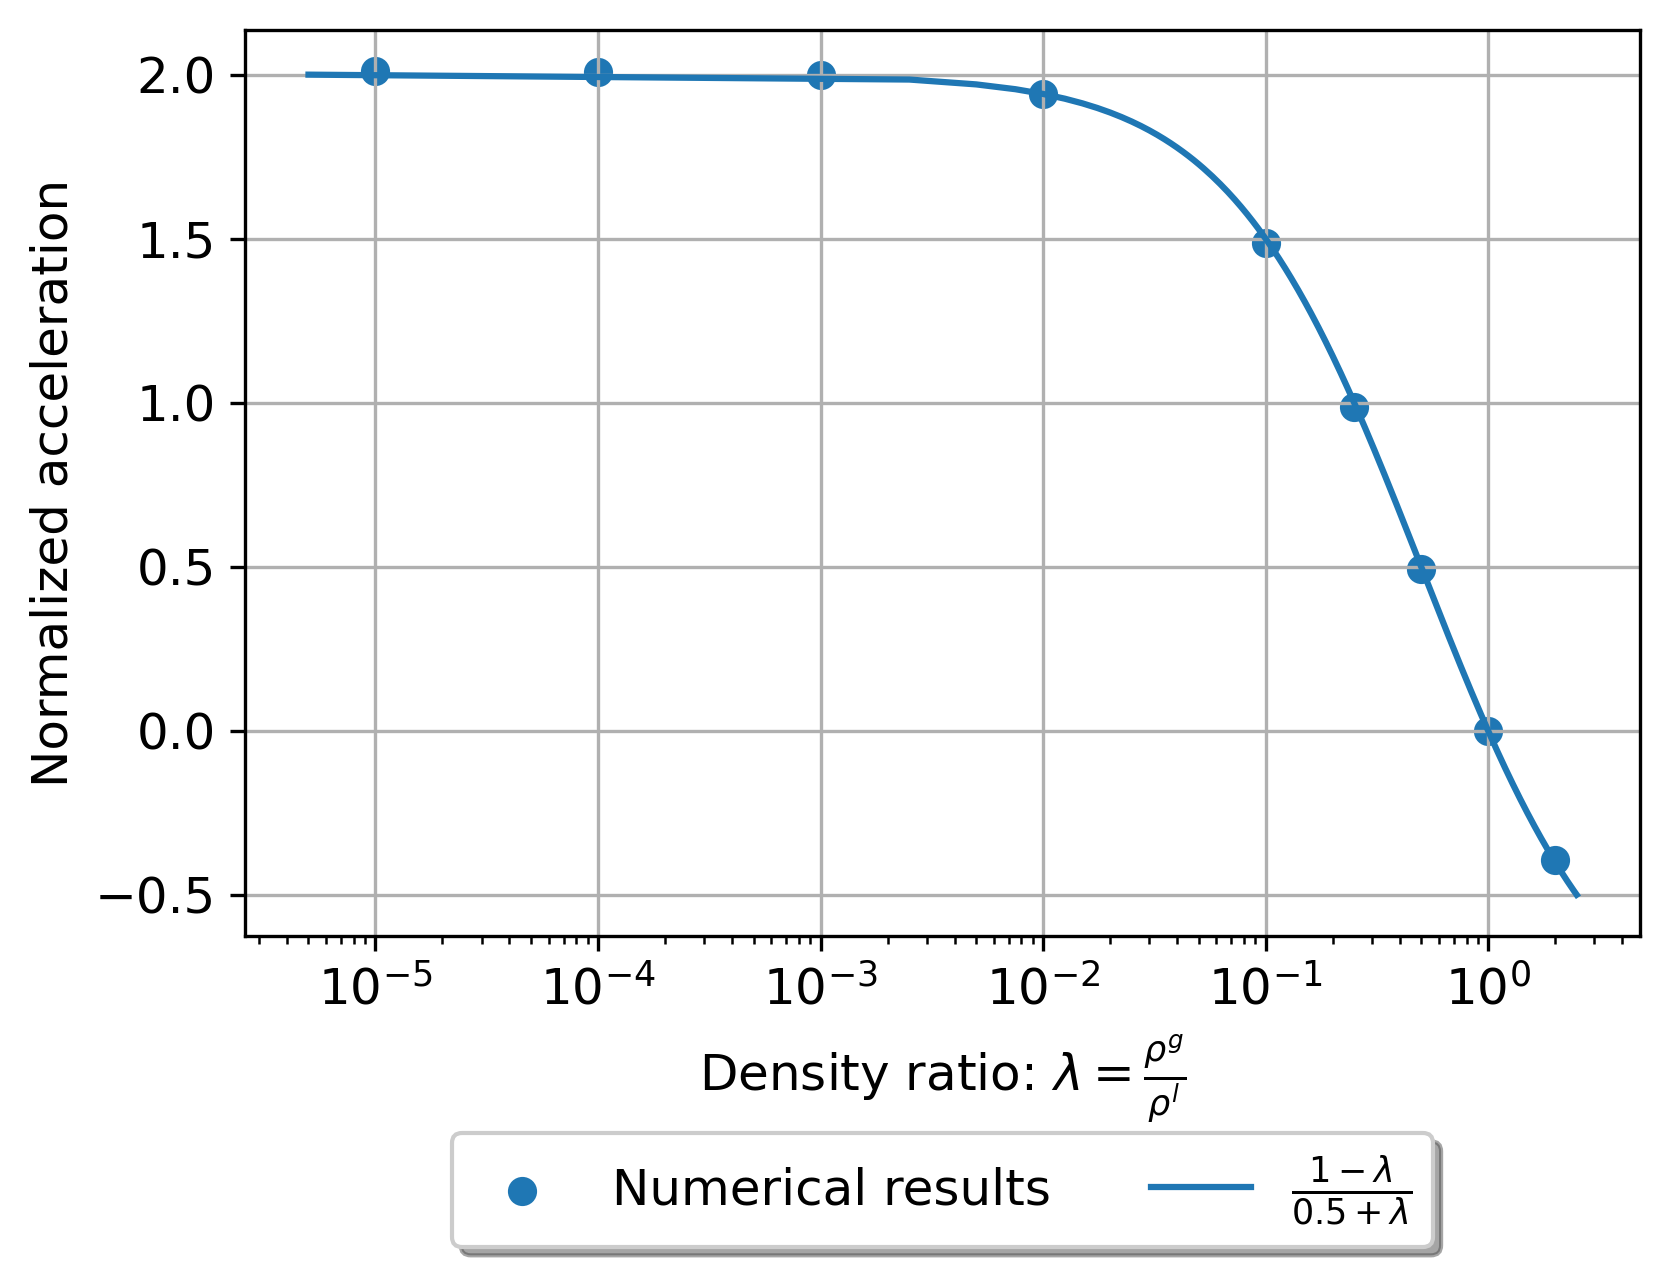

In [6]:
plot_scatteredDensityRatios(dframe_densityRatios, 'scatteredDensityRatios.png')

# Density pairings

In [110]:
agglomerator = da.data_agglomerator("densityPairings.parameter","bubblepproc.dat", 
                                     "isoAdv-densityPairings_00000_templateCaseLambda")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoAdv-densityPairings.csv")
dframe_densityPairings = agglomerator.study_dataframe()
dframe_densityPairings = dframe_densityPairings.sort_index()

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[[0.00242859], [0], [0], [0], [0], [4], [15], [1e-07], [1e-12], [10], [10], [10], [10], [10], [10], [0], [6e-06], ['no'], [0.5], [1e-08], [5e-06], [1], [3], [200], [800], [-9.80665], [0.0], [3.009e-05], [10000.0, 100000.0, 1000000.0, 10000000.0], [1.5111e-05], [0.001], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['radius', 'z_centre', 'y_centre', 'x_centre', 'n_non_orth_correctors', 'n_correctors', 'n_outer_correctors', 'u_tol', 'p_tol', 'negzWIDTH', 'poszWIDTH', 'negyWIDTH', 'posyWIDTH', 'negxWIDTH', 'posxWIDTH', 'purge_write', 'writ

In [111]:
def plot_densityPairings(dframe,fig_name):
    """Plots mesh convergence test."""
    rcParams["figure.dpi"] = 400
    g = 9.80665
    rhol= 997
    rhog = 1.225

    #acc = 2*g*(rhol - rhog)/(rhol+2*rhog)
    
    rhos = dframe.index.get_level_values("rho_ambient").unique()
    markers=['','o','^','*']
    
    
    for i, rho in enumerate(rhos):                
        df_subset = dframe.loc[rho]
        line, =plt.plot(df_subset["time"], df_subset["z-Velocity"].diff()/(df_subset["time"].diff()*g), marker=markers[i], 
             label=r"$\rho^l= 10^{%s}\,kg/m^3$" % (int(np.log10(rho))))    
    plt.axhline(y=(1-0.001)/(0.5+0.001), linestyle='--', color='blue', label=r"$2\frac{\rho^l-\rho^g}{\rho^l+2\rho^g}$")
    plt.xlim(right=2e-6)
    plt.ylabel(r"Normalized acceleration")#"$L_{\infty}(\|\mathbf{v}_c^e - \mathbf{v}_c^n\|)$")
    plt.xlabel("Time (s)")
    plt.grid()
    plt.legend()

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)
    plt.savefig(fig_name, facecolor='w', dpi=400,bbox_inches='tight')

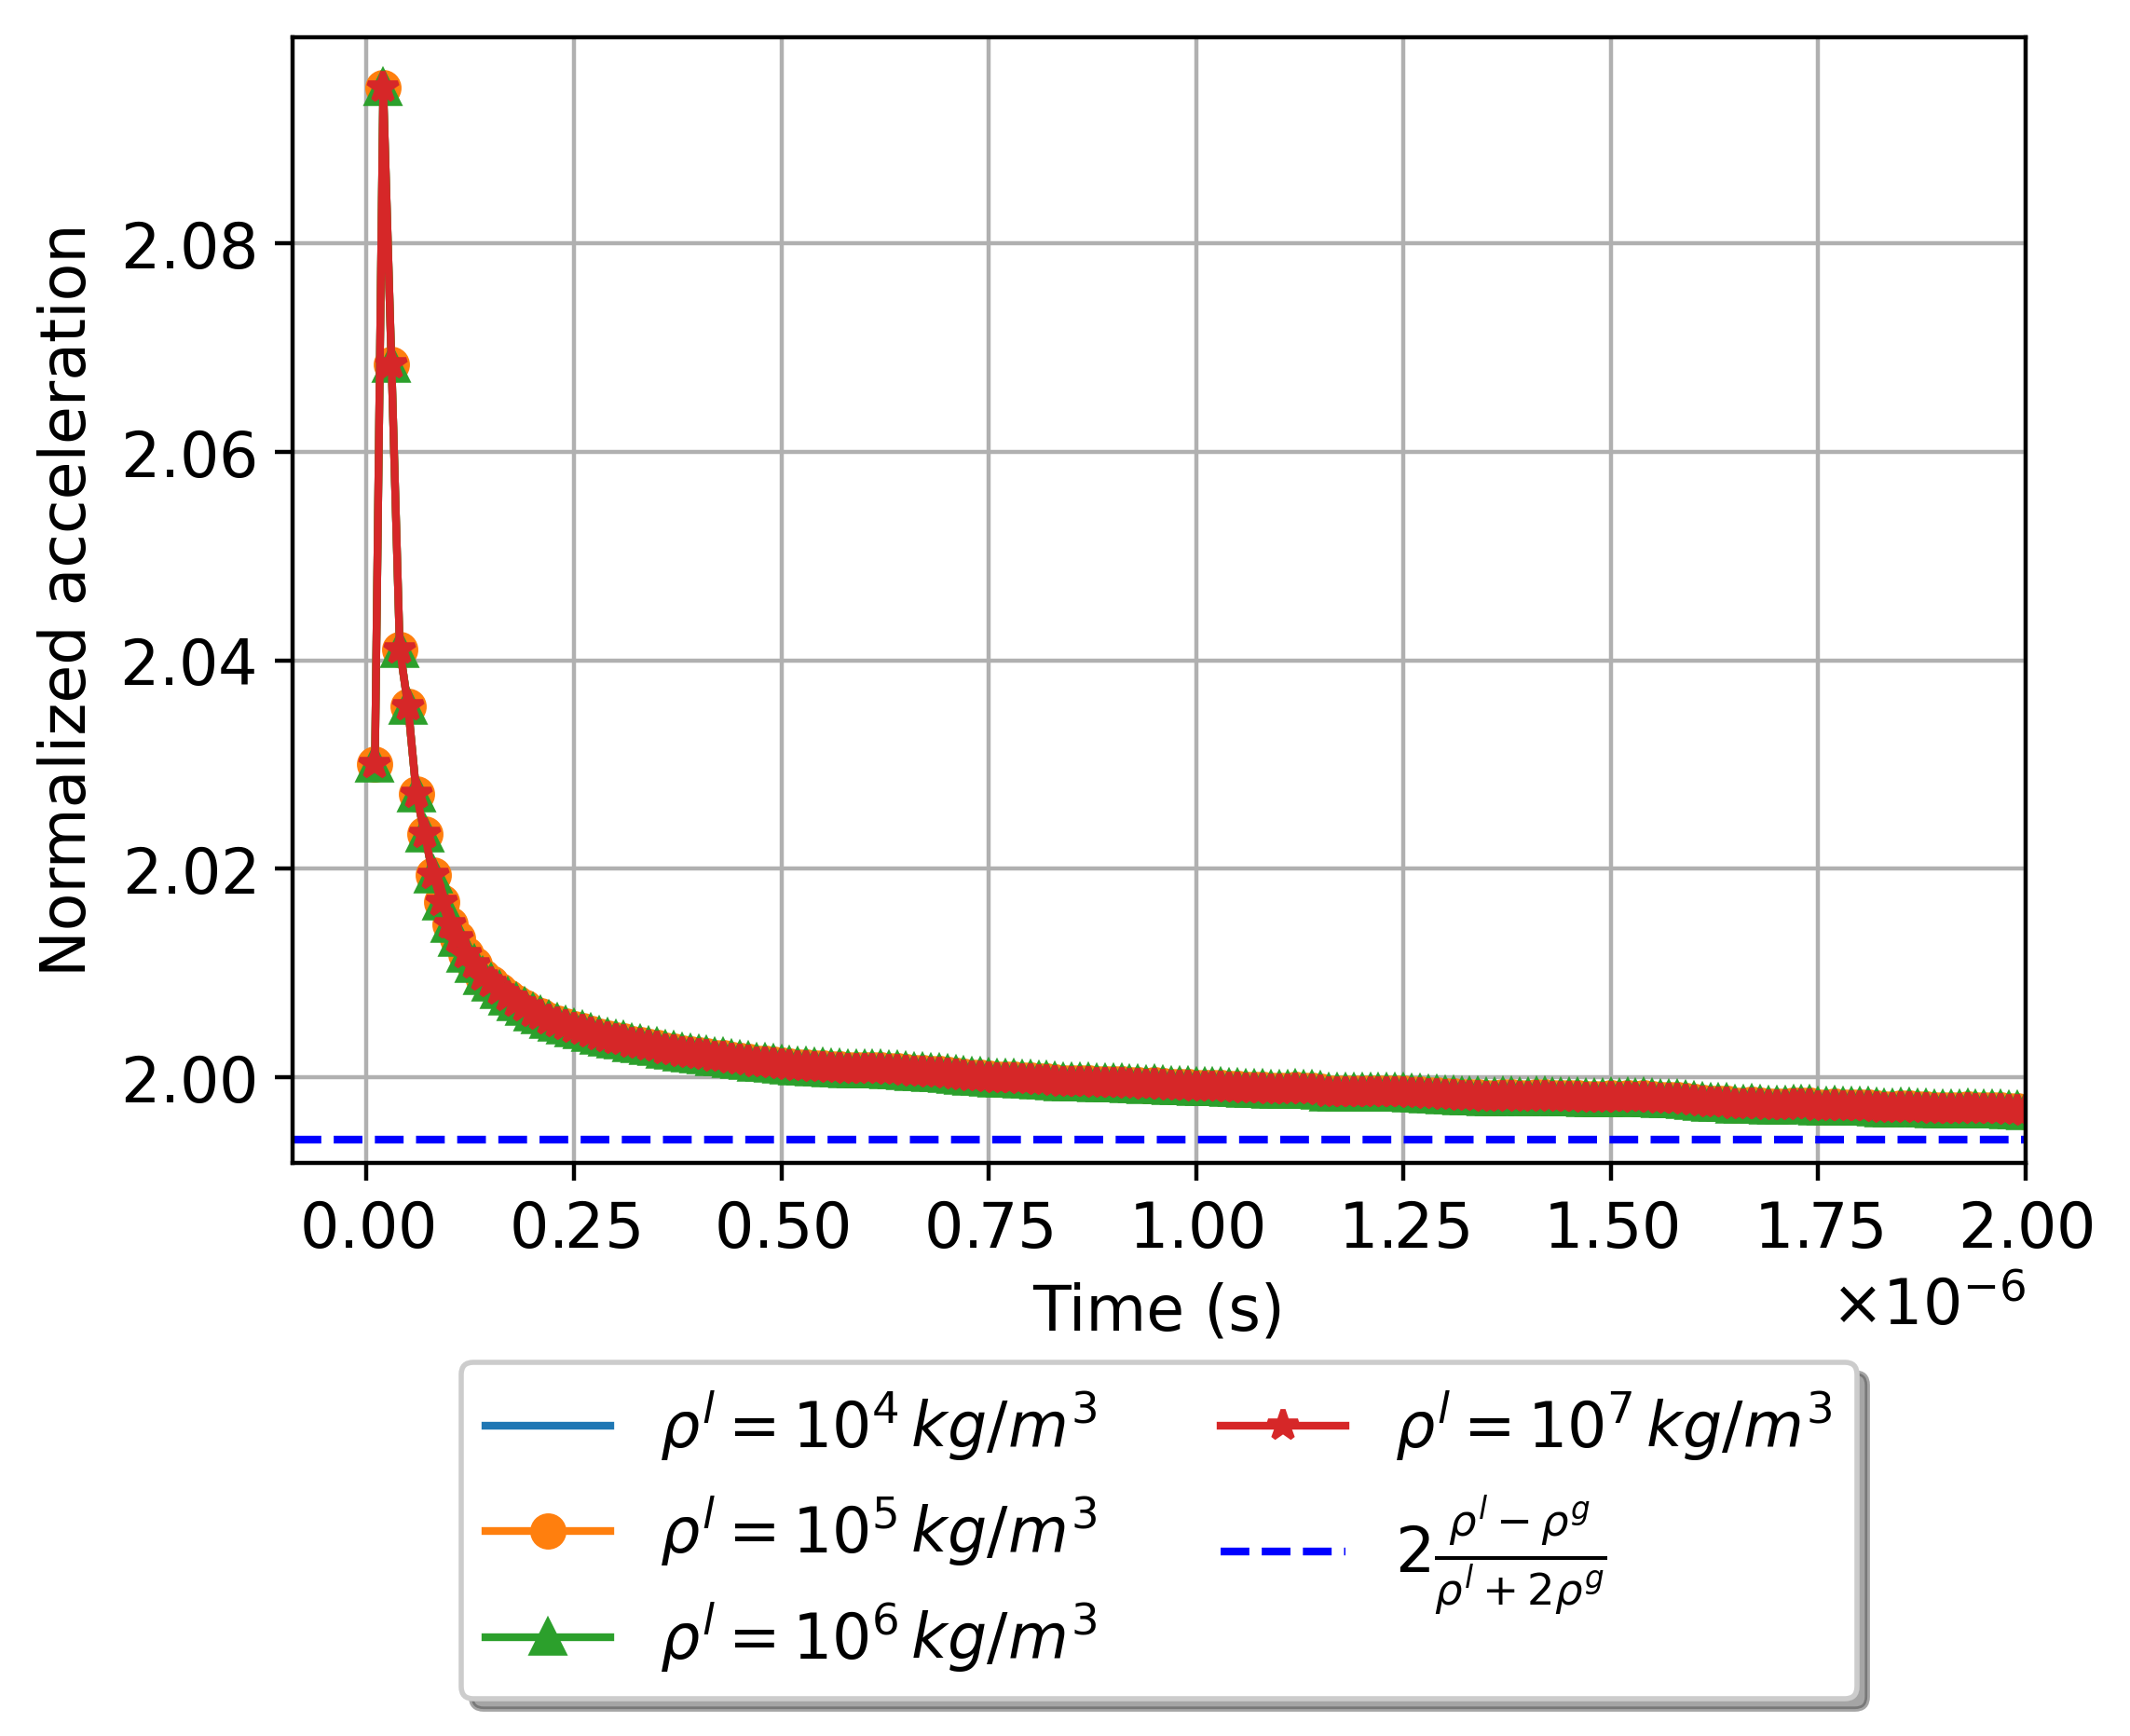

In [112]:
plot_densityPairings(dframe_densityPairings, 'densityParings.png')